# MD211 SC vs NoSC Tomo

In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

In [3]:
def round_sig(x, sig=3):
        return round(x, sig-int(floor(log10(abs(x))))-1)

def replace_point_with_p(input_str):
        return input_str.replace(".", "p")
    
def is_non_zero_file(fpath):  
        print '\n\t\t\tis_non_zero_file:: Checking file ', fpath
        print '\n\t\t\tis_non_zero_file:: File exists = ', os.path.isfile(fpath)
        print '\n\t\t\tis_non_zero_file:: Size > 3 bytes = ', os.path.getsize(fpath)
        return os.path.isfile(fpath) and os.path.getsize(fpath) > 3

In [4]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

In [6]:
dd1 = dict() # 0 emit LI
dd2 = dict() # full emit LI
dd3 = dict() # 0 emit HI
dd4 = dict() # full emit HI

dd1 = add_input_file(dd1, '00_00/output/output.mat', '1.3 eVs')
dd1 = add_input_file(dd1, '00_01/output/output.mat', '1.6 eVs')
dd1 = add_input_file(dd1, '00_02/output/output.mat', '1.9 eVs')
dd1 = add_input_file(dd1, '00_03/output/output.mat', '2.3 eVs')
dd1 = add_input_file(dd1, '00_04/output/output.mat', '2.6 eVs')

dd2 = add_input_file(dd2, '../01_Initial_Setup/00_00/output/output.mat', '1.3 eVs')
dd2 = add_input_file(dd2, '../01_Initial_Setup/00_01/output/output.mat', '1.6 eVs')
dd2 = add_input_file(dd2, '../01_Initial_Setup/00_02/output/output.mat', '1.9 eVs')
dd2 = add_input_file(dd2, '../01_Initial_Setup/00_03/output/output.mat', '2.3 eVs')
dd2 = add_input_file(dd2, '../01_Initial_Setup/00_04/output/output.mat', '2.6 eVs')

dd3 = add_input_file(dd3, '00_10/output/output.mat', '1.3 eVs')
dd3 = add_input_file(dd3, '00_11/output/output.mat', '1.6 eVs')
dd3 = add_input_file(dd3, '00_12/output/output.mat', '1.9 eVs')
dd3 = add_input_file(dd3, '00_13/output/output.mat', '2.3 eVs')
dd3 = add_input_file(dd3, '00_14/output/output.mat', '2.6 eVs')

dd4 = add_input_file(dd4, '../01_Initial_Setup/00_10/output/output.mat', '1.3 eVs')
dd4 = add_input_file(dd4, '../01_Initial_Setup/00_11/output/output.mat', '1.6 eVs')
dd4 = add_input_file(dd4, '../01_Initial_Setup/00_12/output/output.mat', '1.9 eVs')
dd4 = add_input_file(dd4, '../01_Initial_Setup/00_13/output/output.mat', '2.3 eVs')
dd4 = add_input_file(dd4, '../01_Initial_Setup/00_14/output/output.mat', '2.6 eVs')

	Added output data from  00_00/output/output.mat 	 dictionary key:  1.3 eVs
	Added output data from  00_01/output/output.mat 	 dictionary key:  1.6 eVs
	Added output data from  00_02/output/output.mat 	 dictionary key:  1.9 eVs
	Added output data from  00_03/output/output.mat 	 dictionary key:  2.3 eVs
	Added output data from  00_04/output/output.mat 	 dictionary key:  2.6 eVs
	Added output data from  ../01_Initial_Setup/00_00/output/output.mat 	 dictionary key:  1.3 eVs
	Added output data from  ../01_Initial_Setup/00_01/output/output.mat 	 dictionary key:  1.6 eVs
	Added output data from  ../01_Initial_Setup/00_02/output/output.mat 	 dictionary key:  1.9 eVs
	Added output data from  ../01_Initial_Setup/00_03/output/output.mat 	 dictionary key:  2.3 eVs
	Added output data from  ../01_Initial_Setup/00_04/output/output.mat 	 dictionary key:  2.6 eVs
	Added output data from  00_10/output/output.mat 	 dictionary key:  1.3 eVs
	Added output data from  00_11/output/output.mat 	 dictionary ke

In [7]:
dd1['1.3 eVs'].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'turn_time',
 'n_mp',
 'min_xp',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

In [8]:
sc = 'SbS'
legend_label = r'$\epsilon_{z}$'    
main_label = 'MD211_Long_test_SC'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 30
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
#betagamma = 2.492104532 * 0.9159915293879255
save_folder = 'Plots'
title_2 = '0 Emittance'
title_1 = 'Full Emittance'
case_label_1 = r'$I = 1.6 \cdot 10^{12}$'
case_label_2 = r'$I = 2.0 \cdot 10^{12}$'

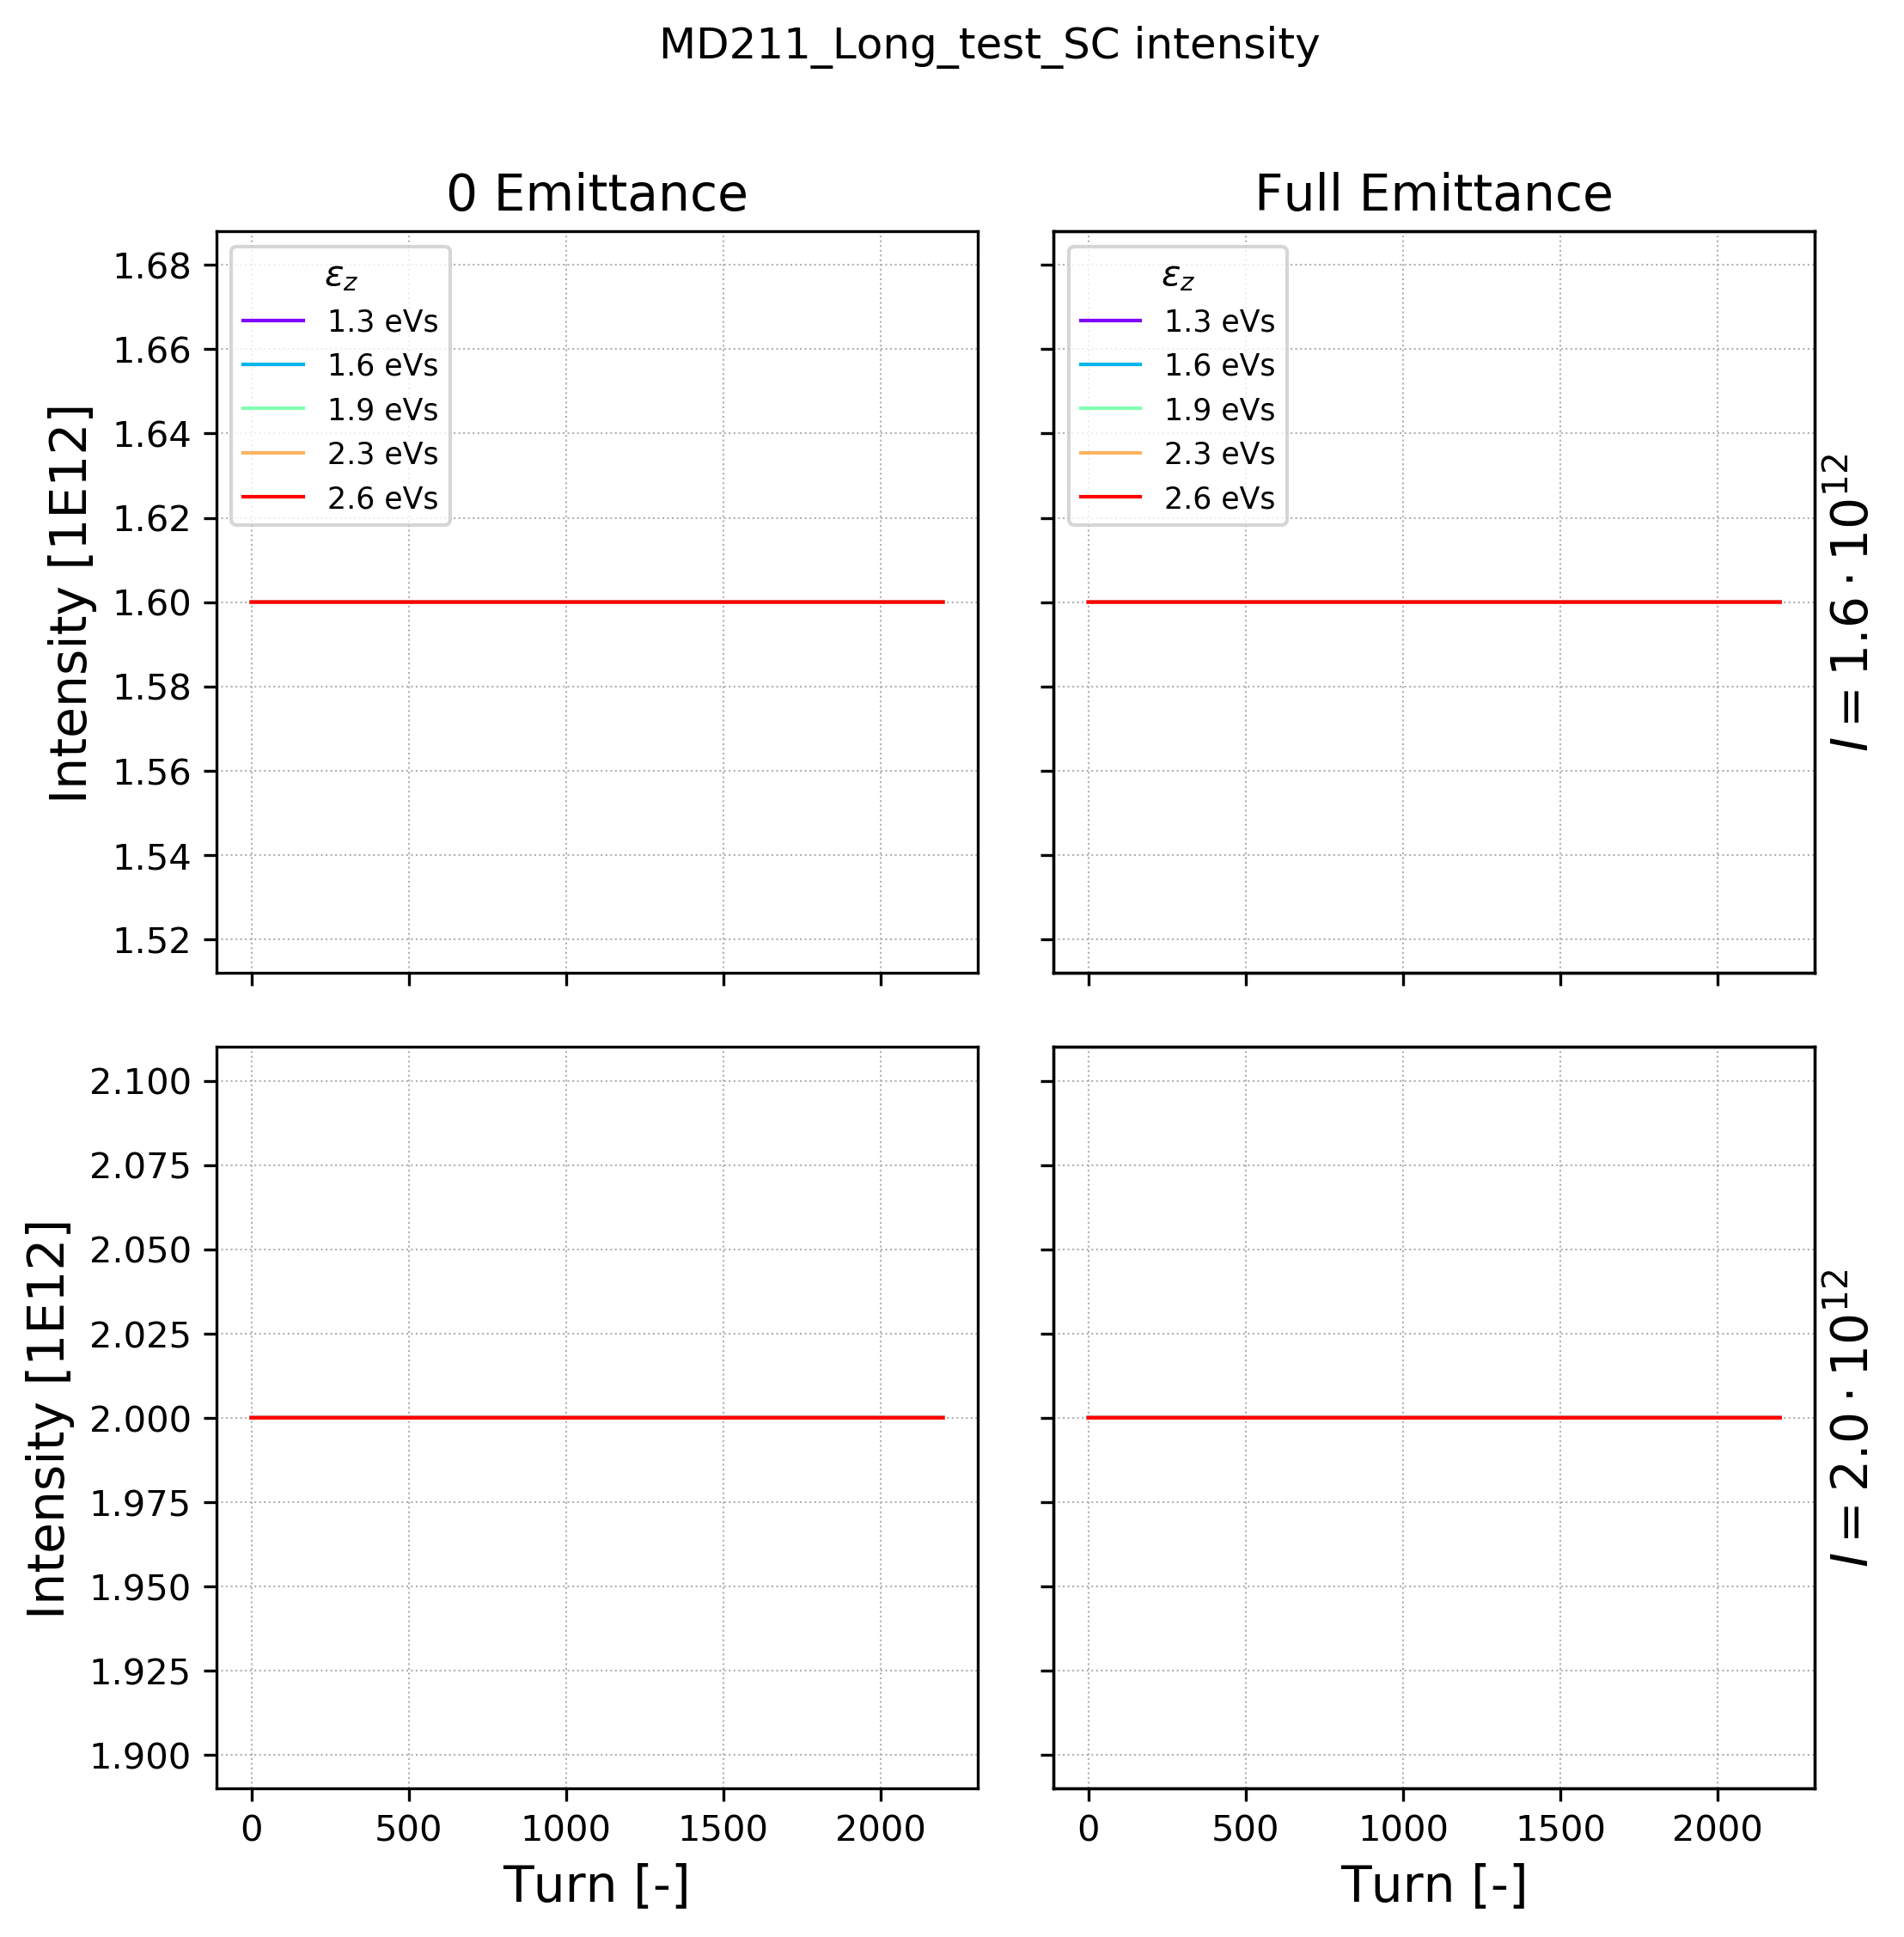

In [9]:
parameter = 'intensity'
multi1 = 1E-12

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Intensity [1E12]');
ax3.set_ylabel('Intensity [1E12]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

#ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

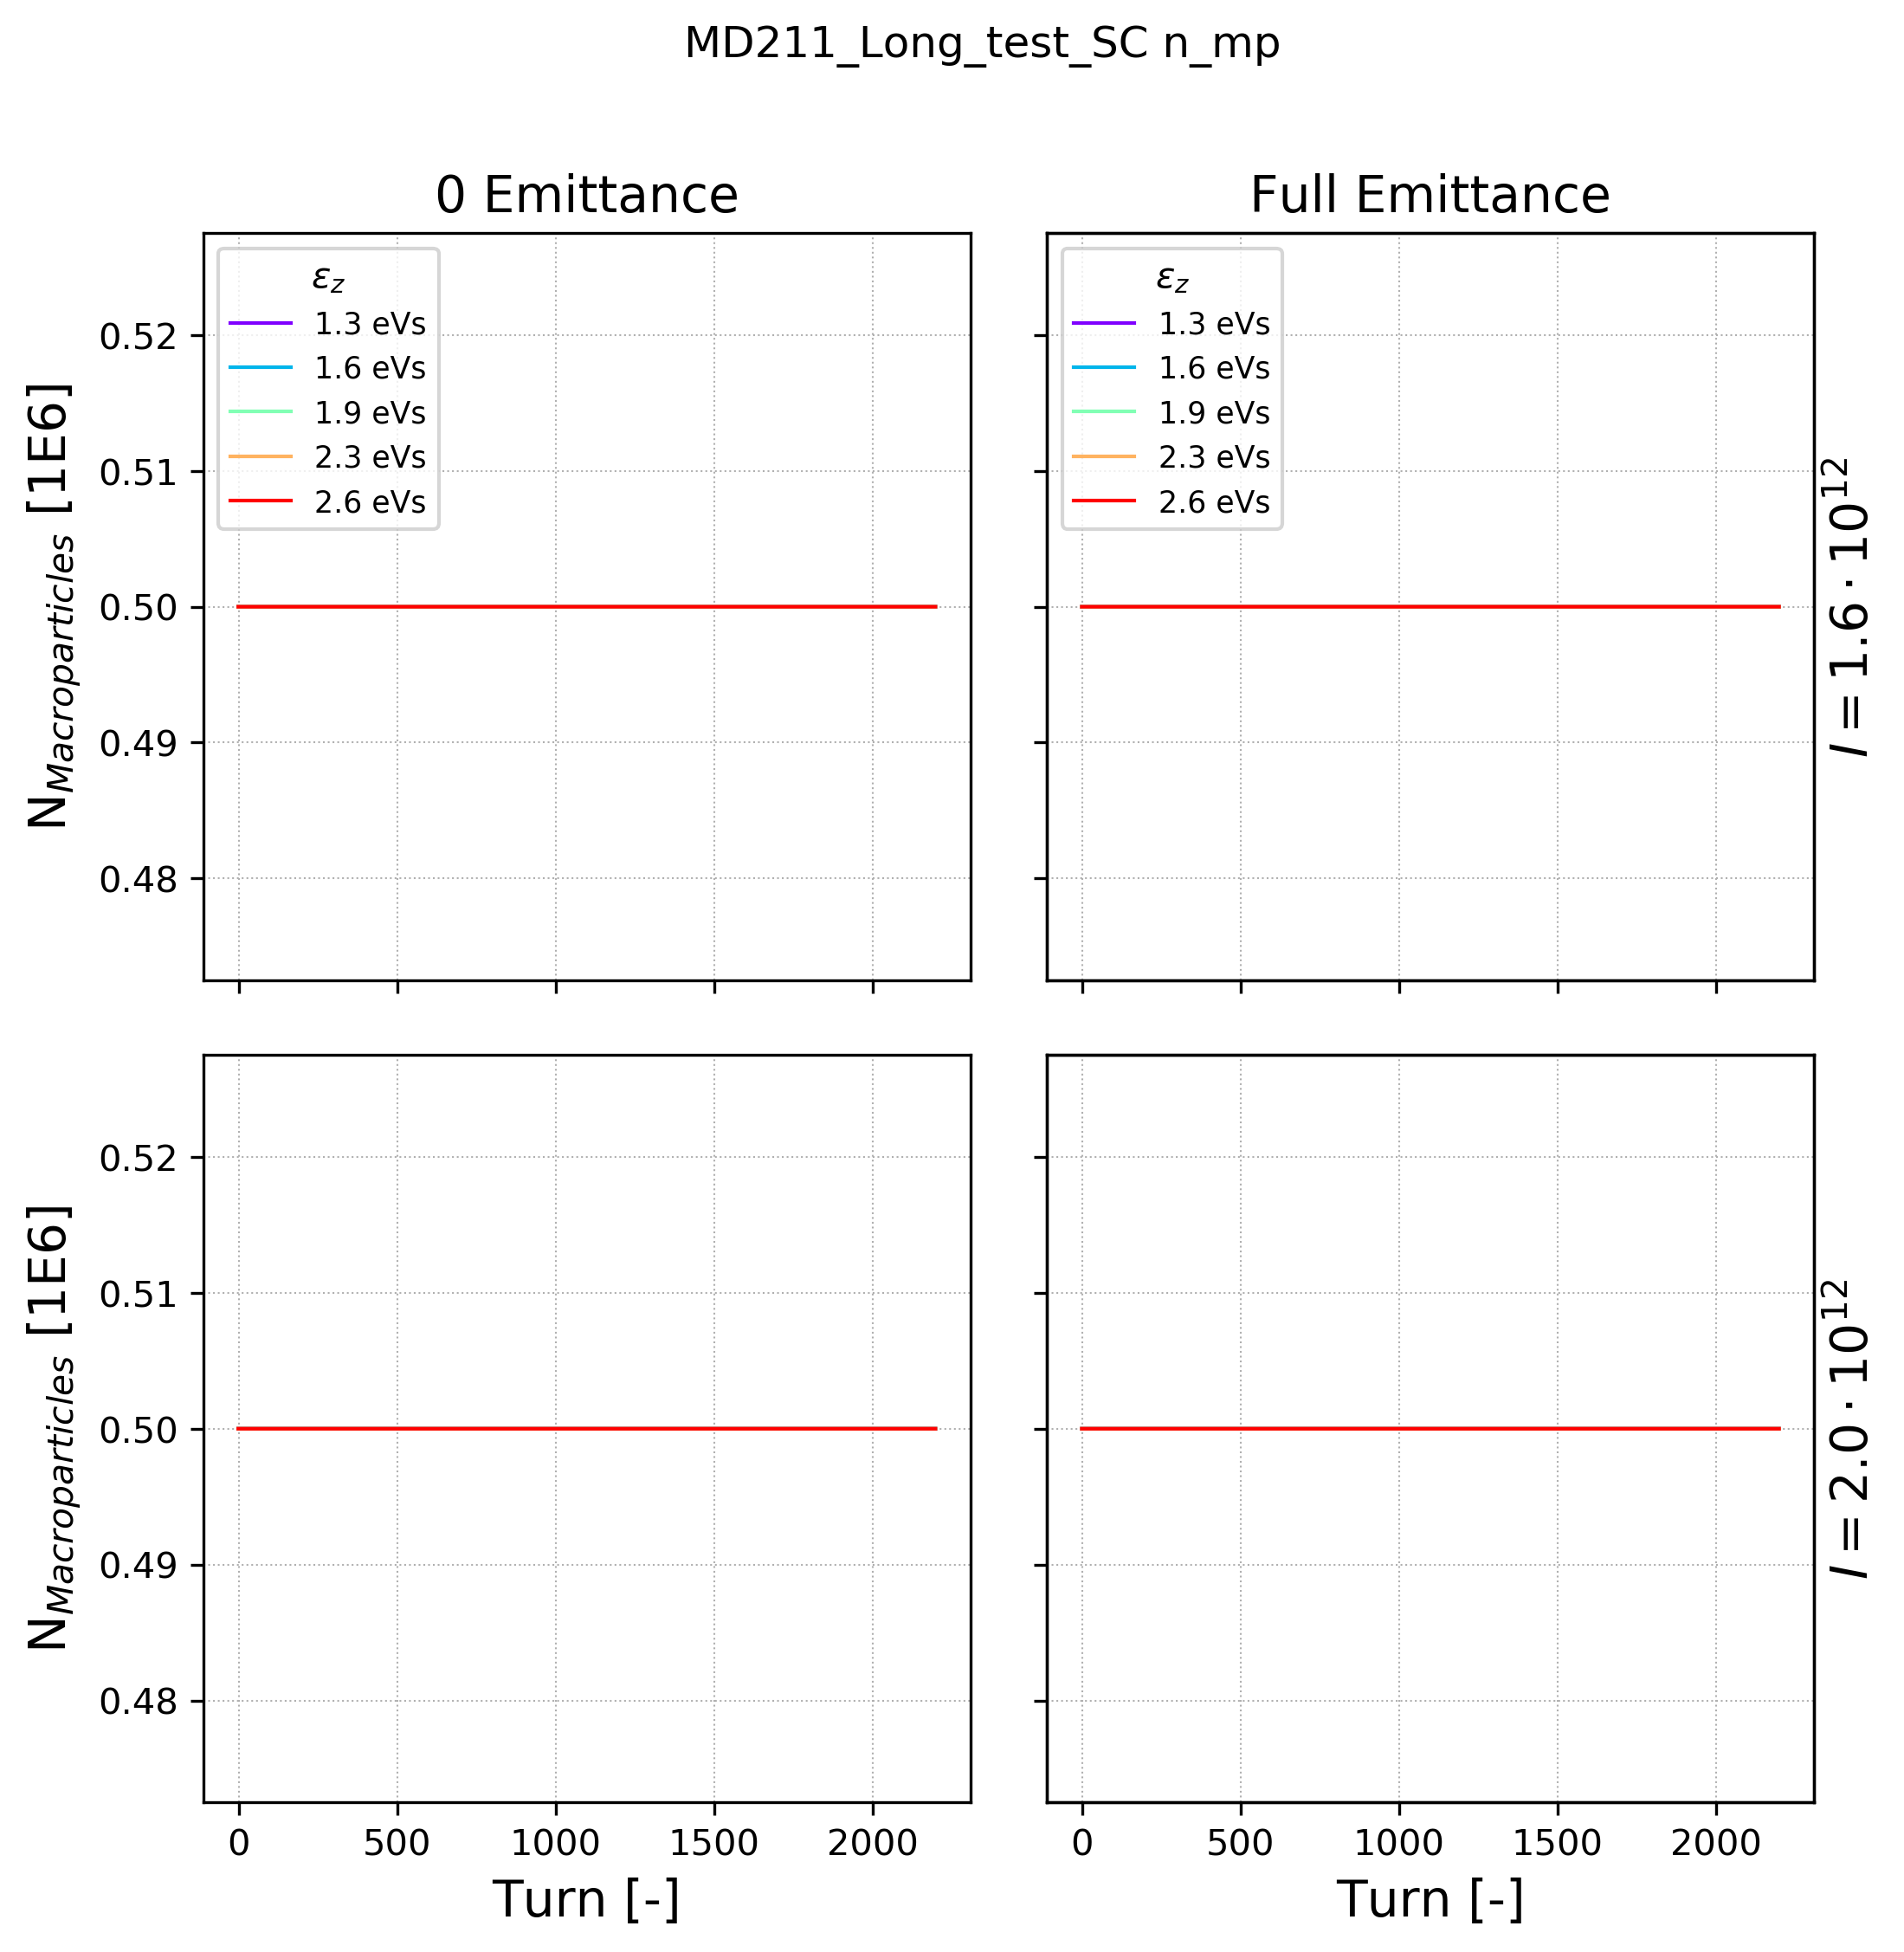

In [10]:
parameter = 'n_mp'
multi1 = 1E-6

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'N$_{Macroparticles}$ [1E6]');
ax3.set_ylabel(r'N$_{Macroparticles}$ [1E6]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

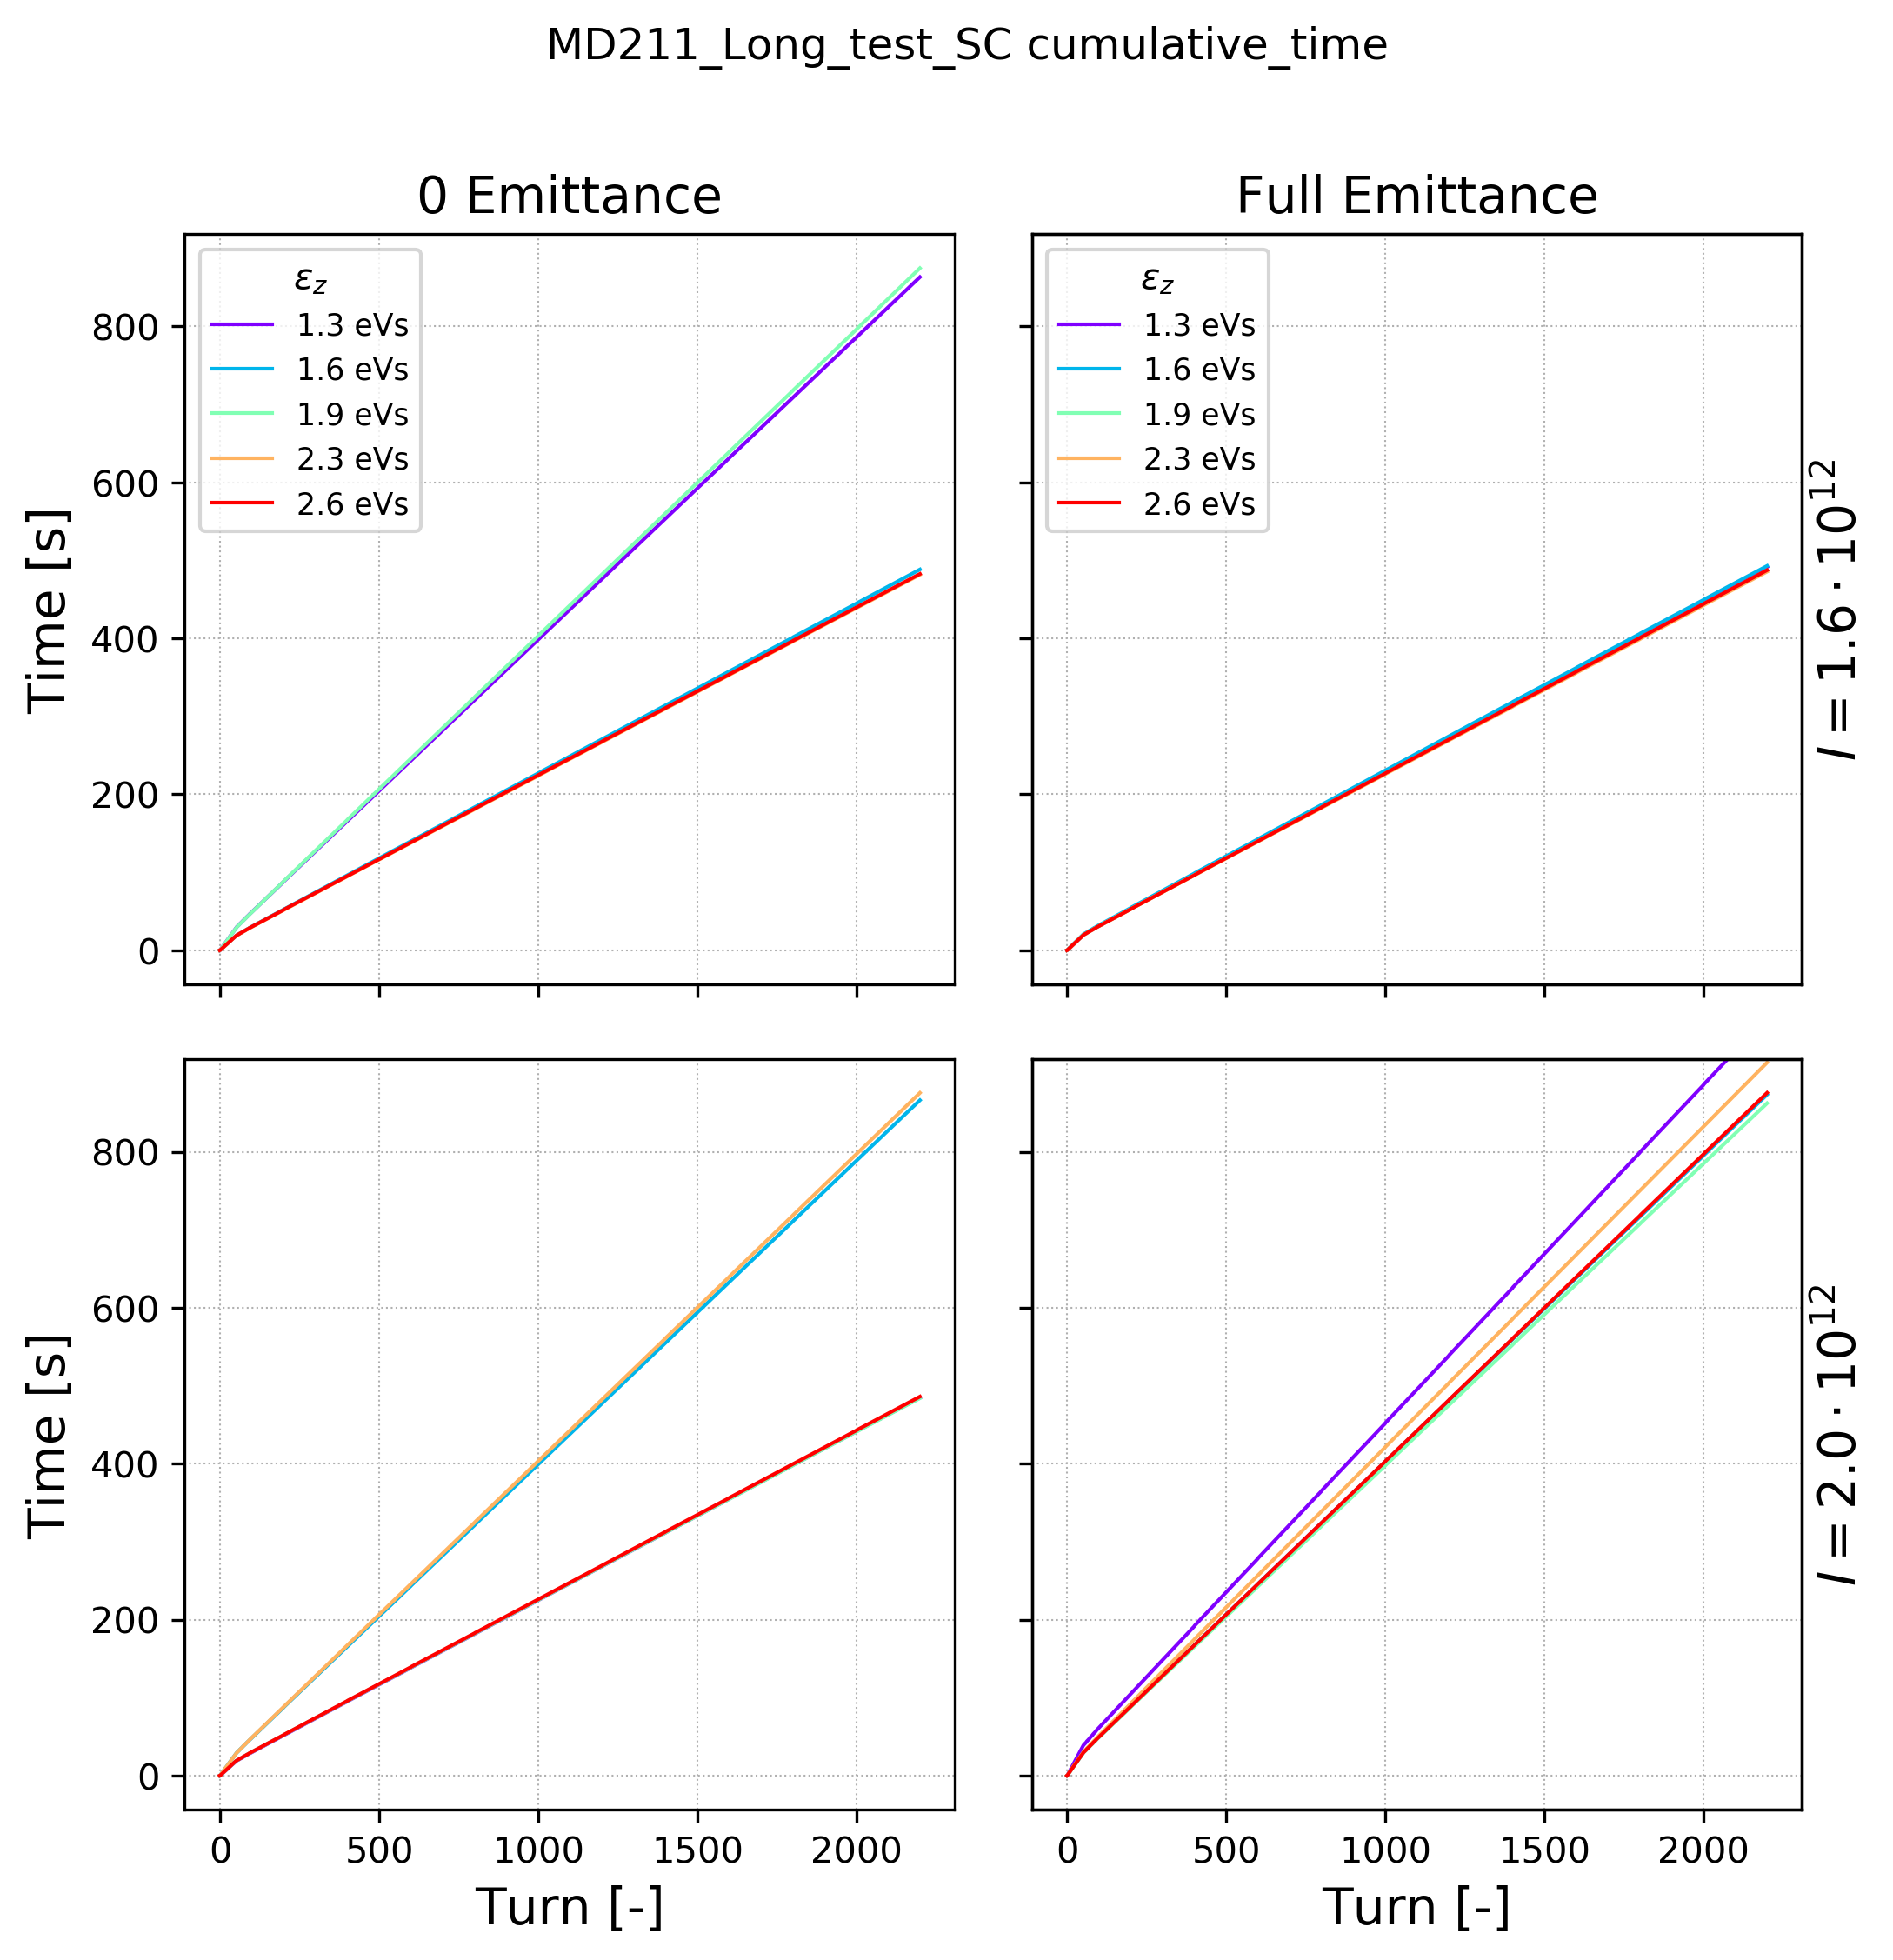

In [11]:
parameter = 'cumulative_time'
multi1 = 1./60.

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Time [s]');
ax3.set_ylabel('Time [s]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

0 Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  turn_duration  =  23.2  range =  24.6  =  106.0 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  turn_duration  =  13.0  range =  14.0  =  107.0 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  turn_duration  =  23.5  range =  24.8  =  105.0 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  turn_duration  =  12.8  range =  14.0  =  109.0 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  turn_duration  =  12.9  range =  13.7  =  106.0 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  turn_duration  =  13.1  range =  15.0  =  114.0 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  turn_duration  =  13.0  range =  15.3  =  118.0 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  turn_duration  =  13.0  range =  14.4  =  111.0 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  turn_duration  =  12.9  range =  14.8  =  115.0 %
Full Emittance   $I = 1.6

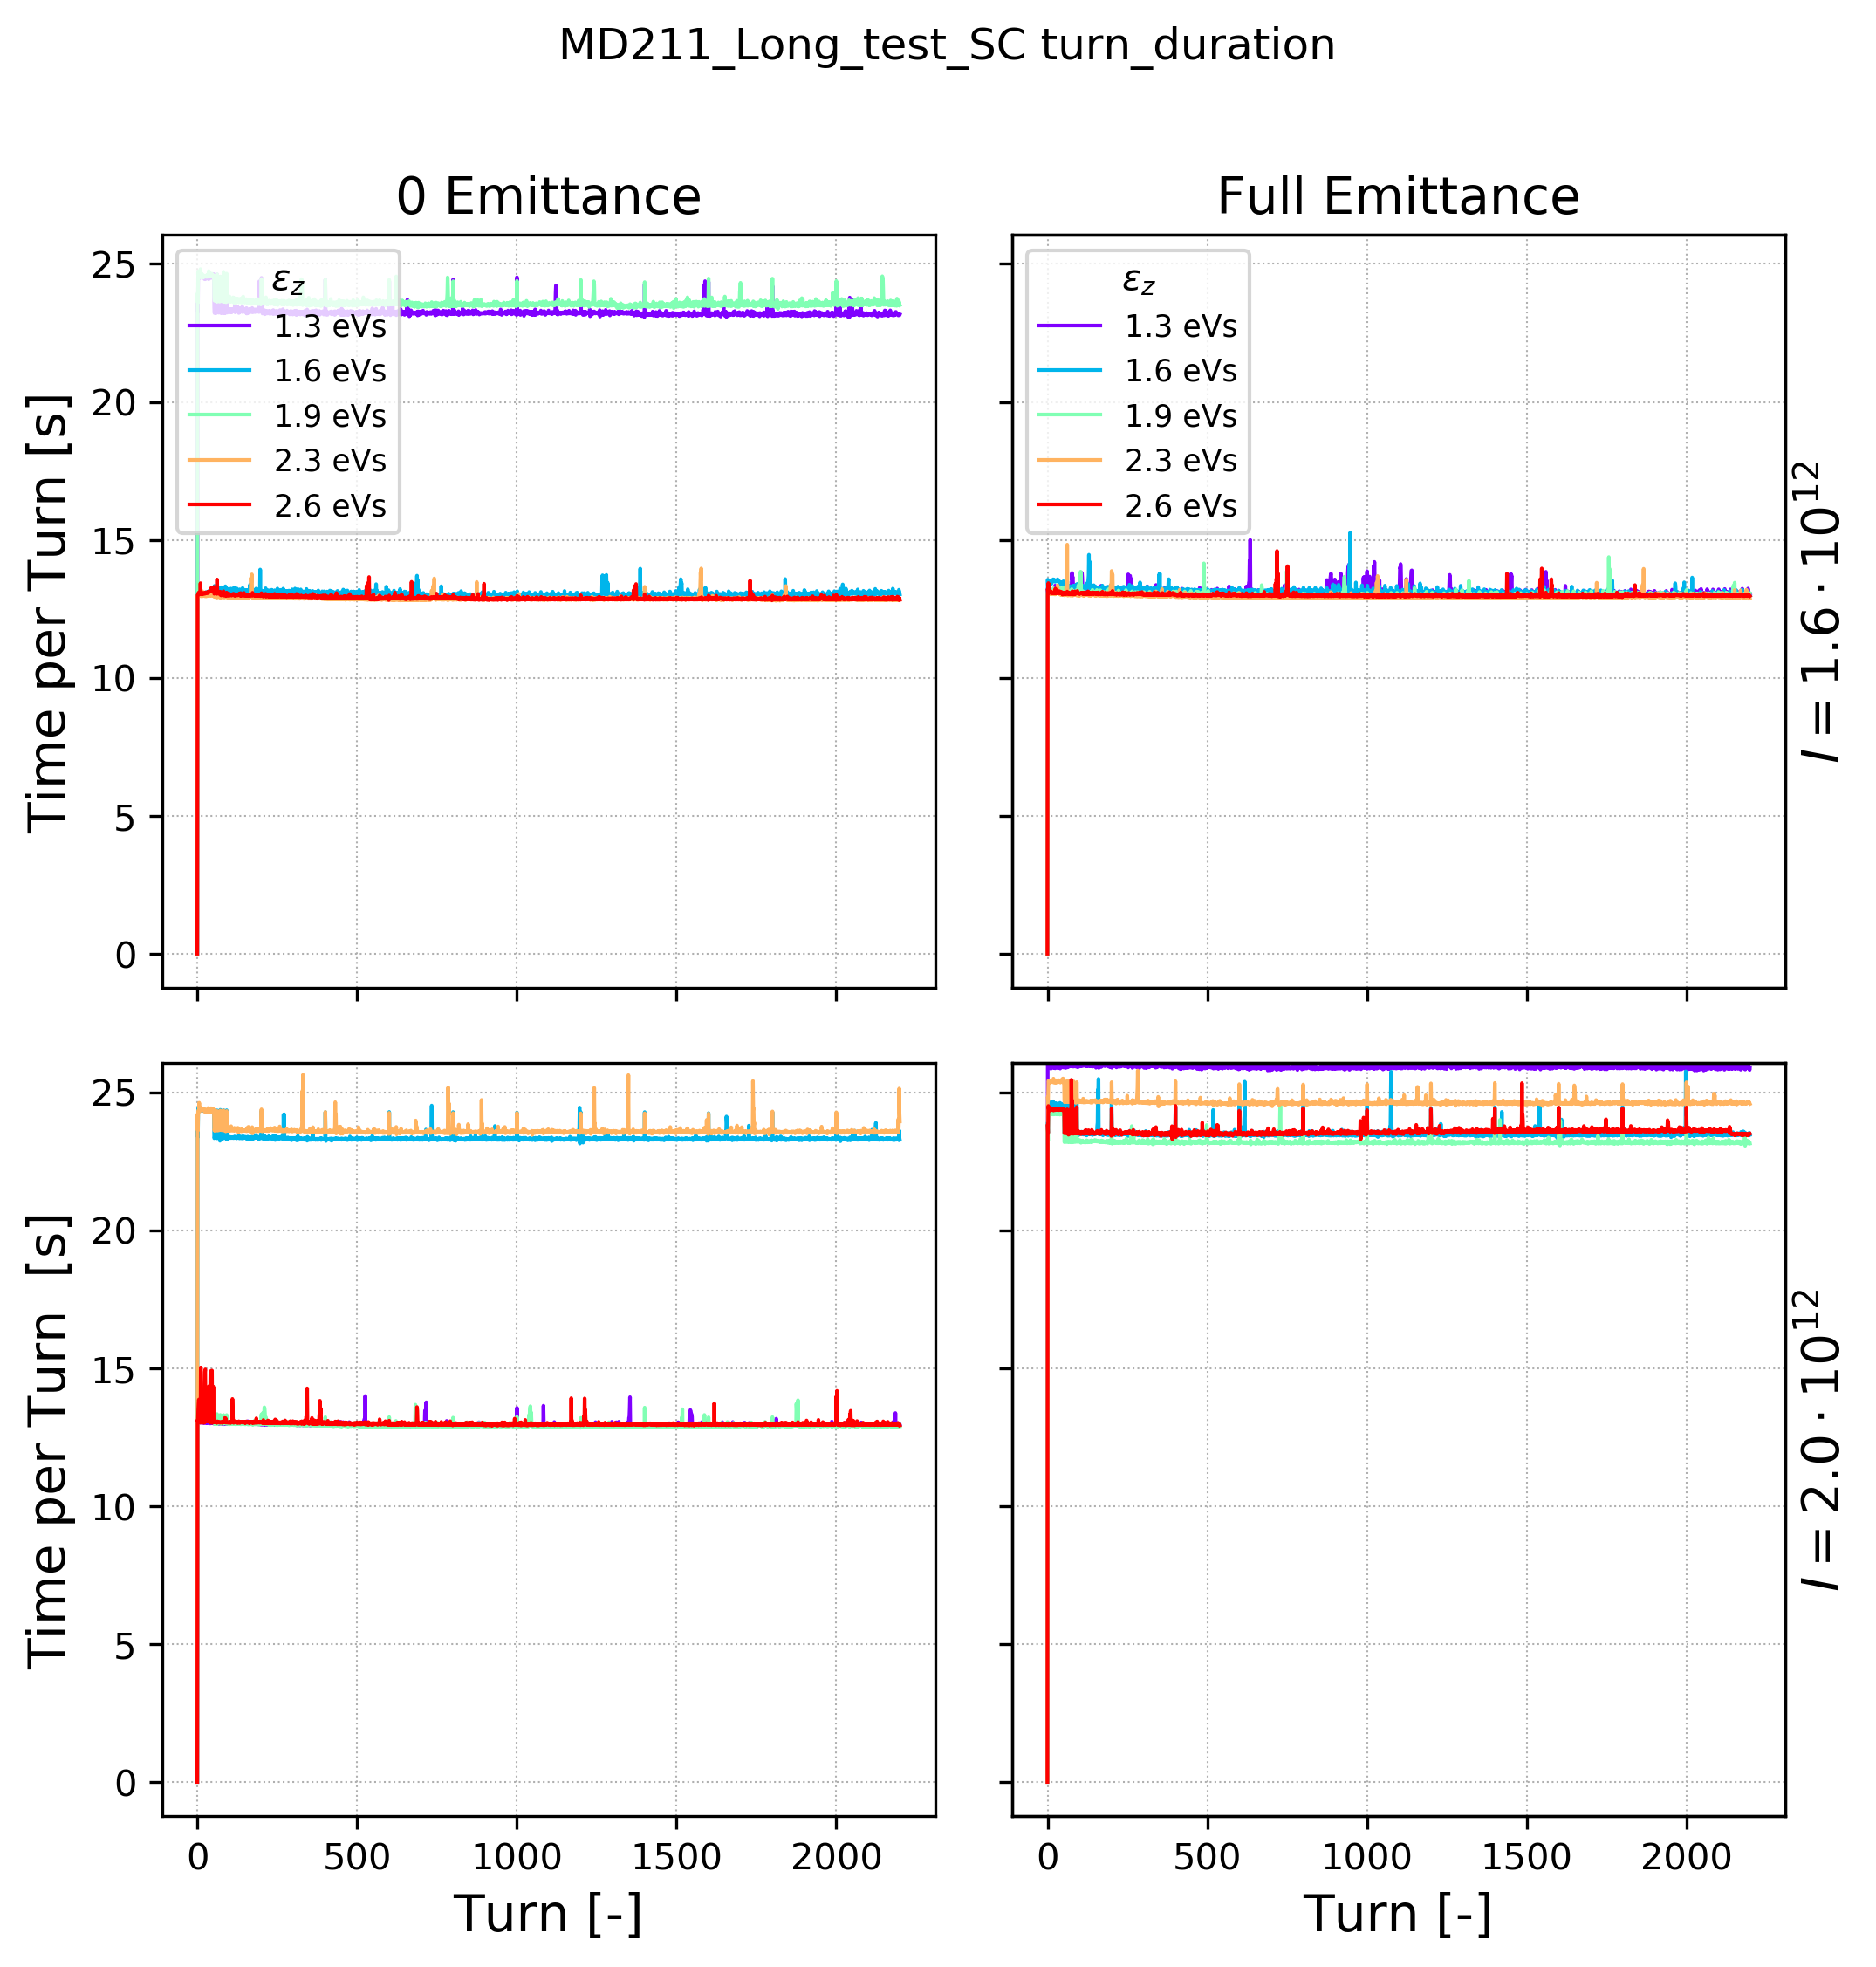

In [12]:
parameter = 'turn_duration'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Time per Turn [s]');
ax3.set_ylabel('Time per Turn  [s]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))


c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

0 Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_x  =  2.5  range =  0.125  =  4.98 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_x  =  3.07  range =  0.171  =  5.57 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_x  =  3.91  range =  0.195  =  4.98 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_x  =  4.78  range =  0.252  =  5.27 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  sig_x  =  5.47  range =  0.317  =  5.8 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_x  =  4.97  range =  0.0815  =  1.64 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_x  =  5.27  range =  0.104  =  1.97 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_x  =  5.81  range =  0.139  =  2.39 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_x  =  6.44  range =  0.192  =  2.98 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  sig_x  =  6.93  range =  0.245  =  3.5

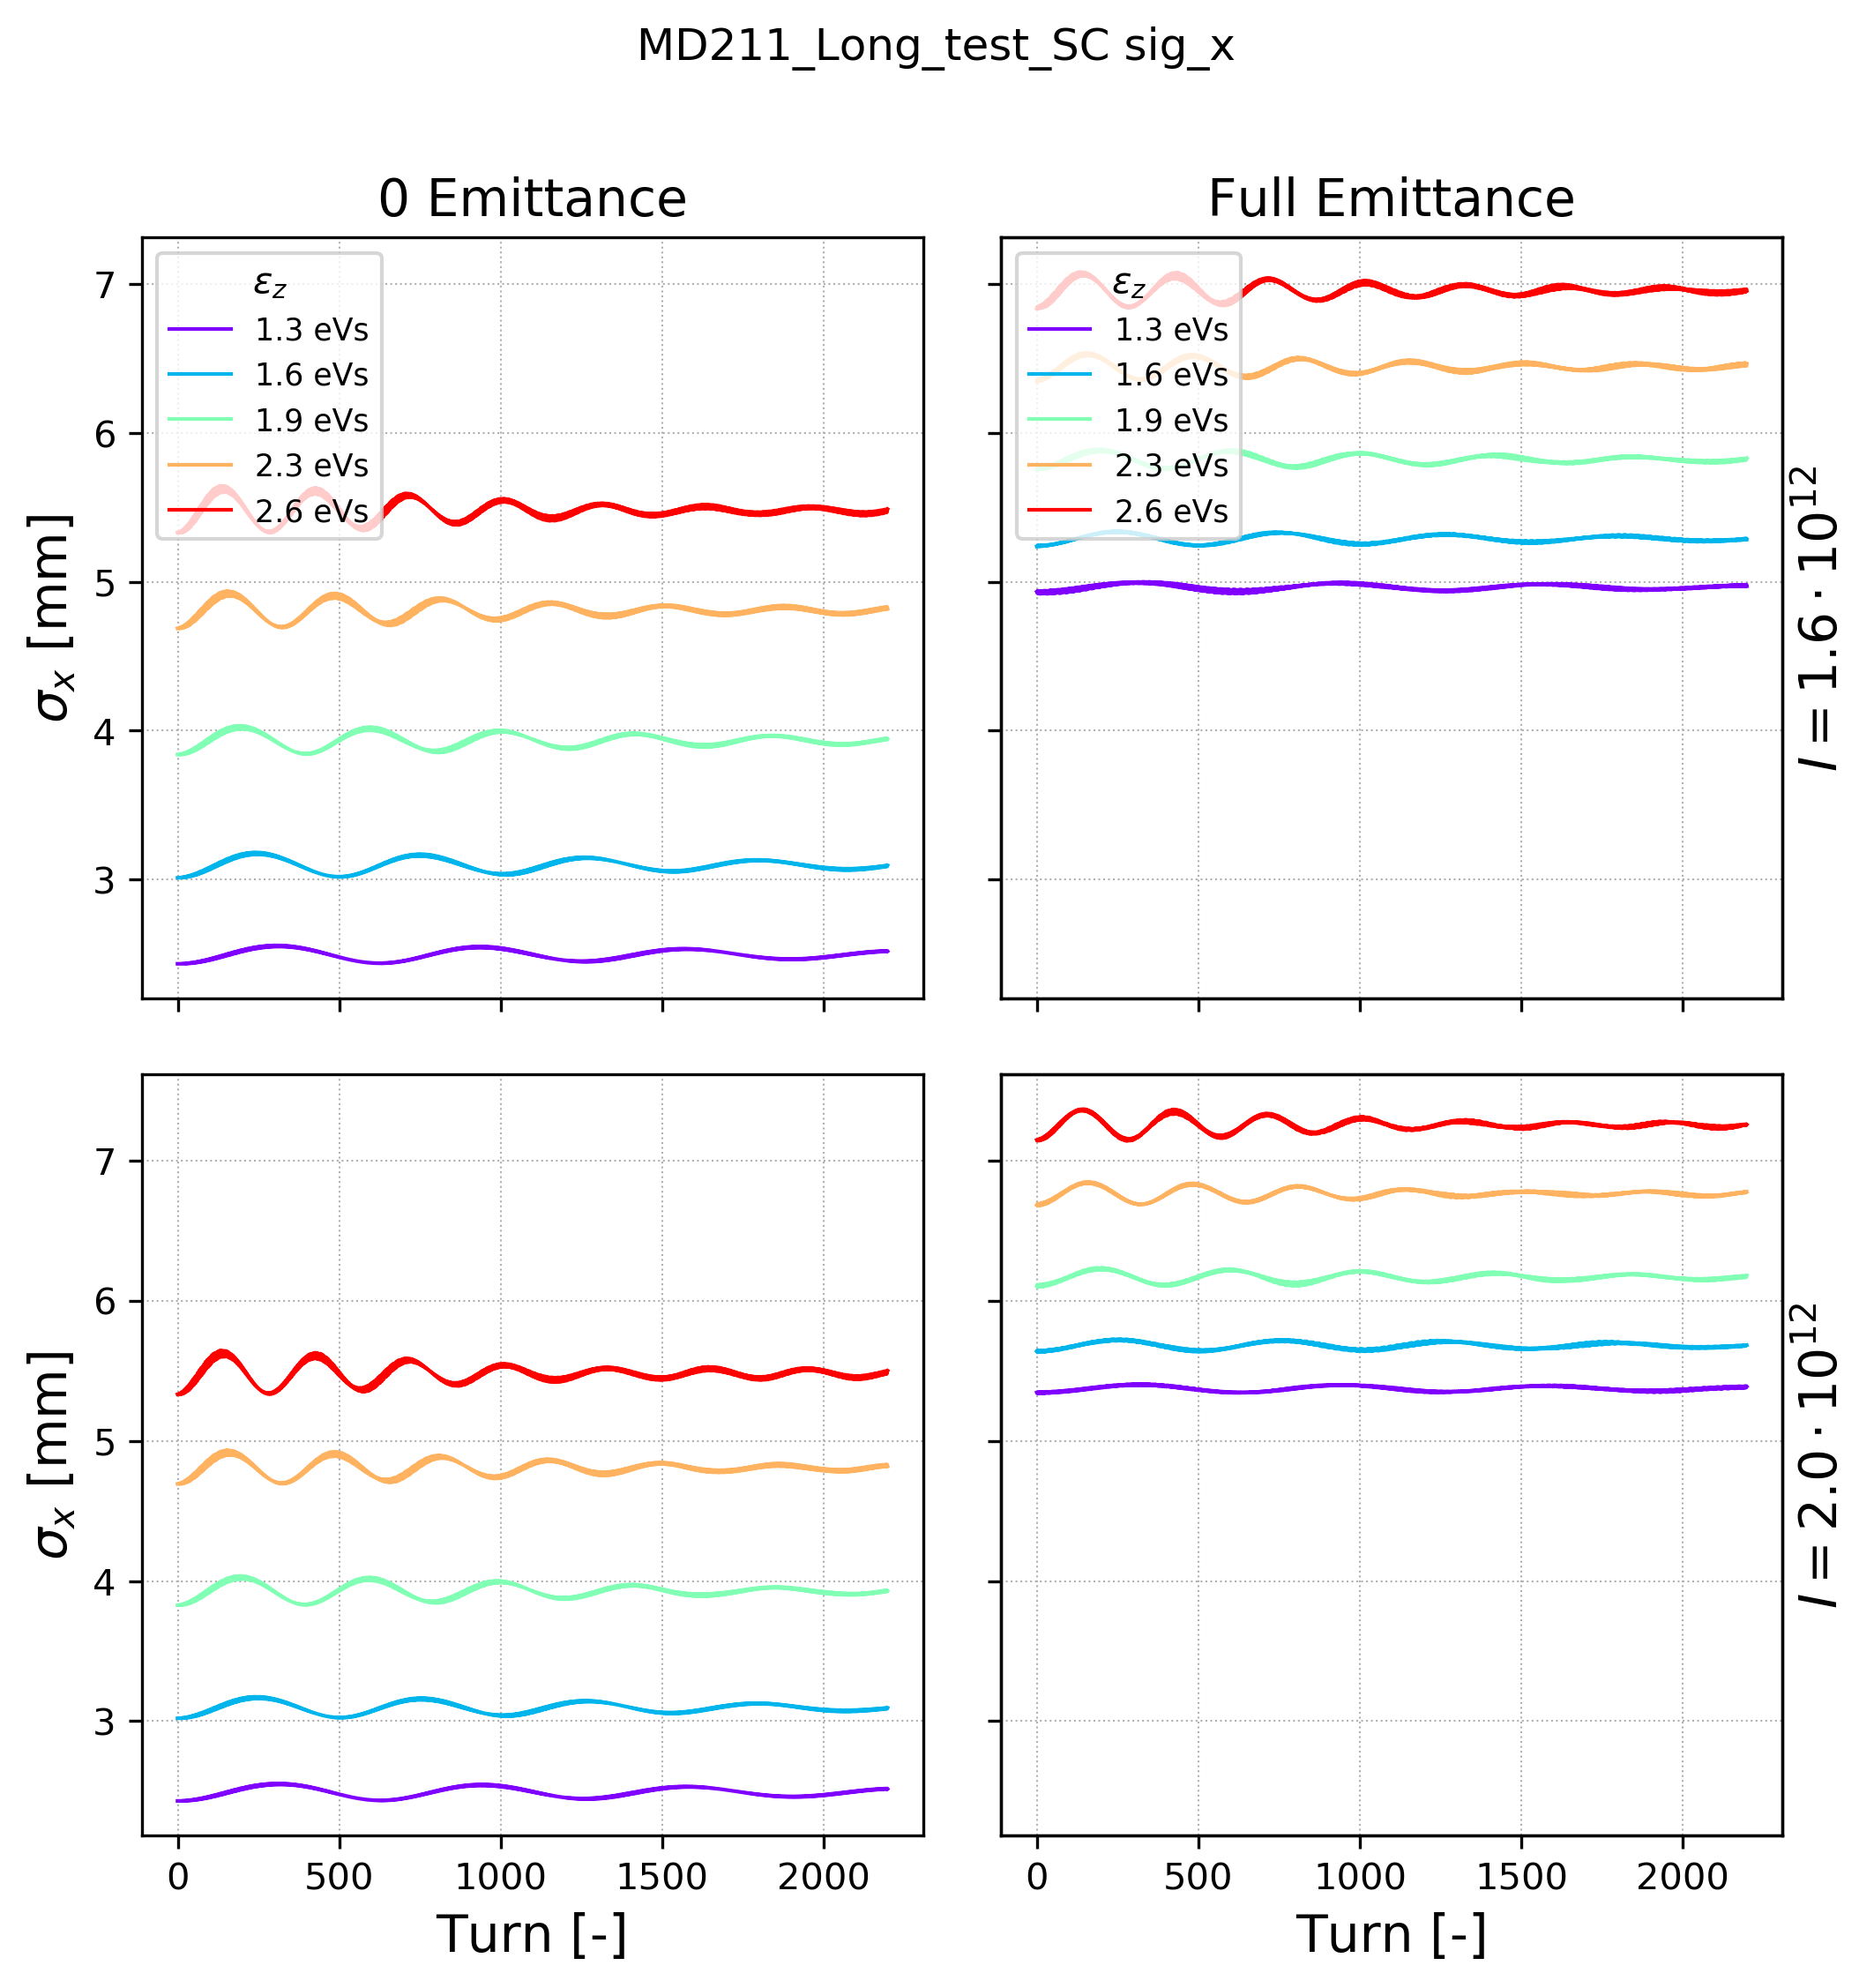

In [13]:
parameter = 'sig_x'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax3.set_ylabel(r'$\sigma_x$ [mm]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

#ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

 Full Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_y  =  3.07  range =  0.0149  =  0.485 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_y  =  3.06  range =  0.0145  =  0.473 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_y  =  3.06  range =  0.0119  =  0.389 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_y  =  3.07  range =  0.0133  =  0.435 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  sig_y  =  3.07  range =  0.0135  =  0.44 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.3 eVs Average  sig_y  =  3.51  range =  0.0156  =  0.444 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.6 eVs Average  sig_y  =  3.51  range =  0.0176  =  0.5 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.9 eVs Average  sig_y  =  3.51  range =  0.0172  =  0.49 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   2.3 eVs Average  sig_y  =  3.51  range =  0.017  =  0.484 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   2.6 eVs Average  sig_y  =

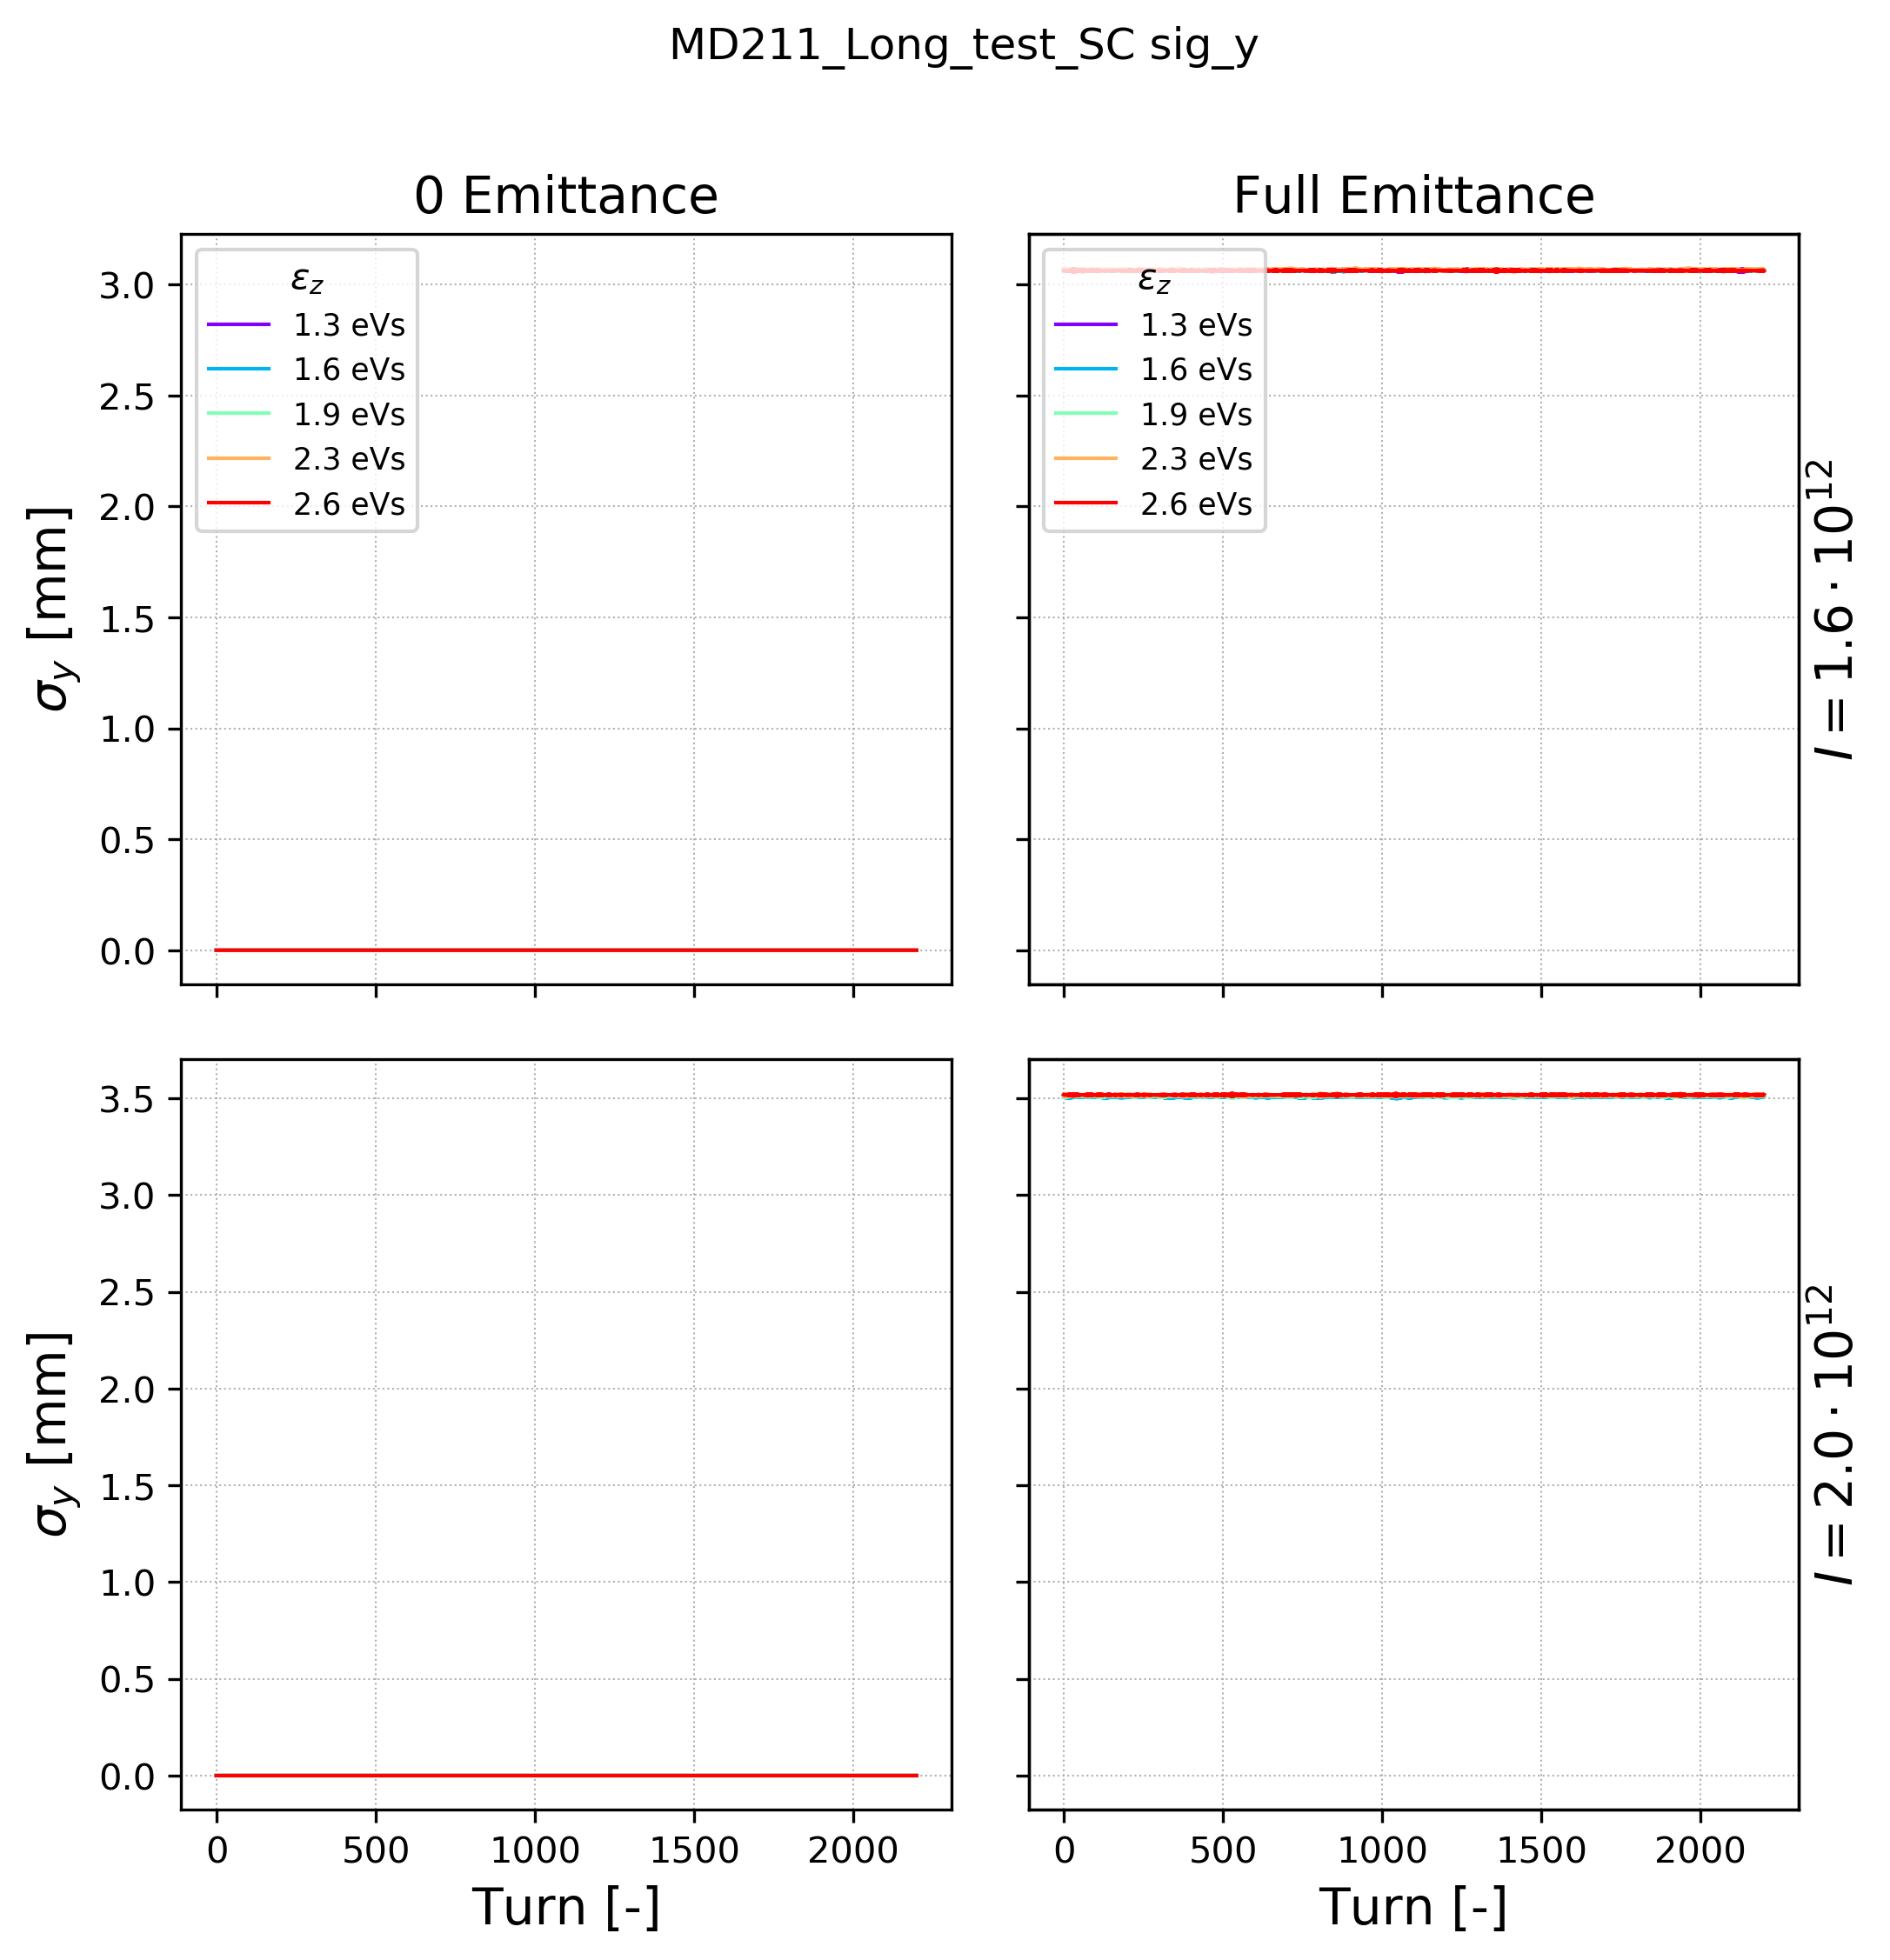

In [25]:
parameter = 'sig_y'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax3.set_ylabel(r'$\sigma_y$ [mm]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        #print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        #str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        #print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        #str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

#ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

#    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

Full Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  beta_x  =  22.5  range =  0.148  =  0.66 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  beta_x  =  22.4  range =  0.123  =  0.55 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  beta_x  =  22.5  range =  0.151  =  0.673 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  beta_x  =  22.47  range =  0.161  =  0.715 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  beta_x  =  22.45  range =  0.167  =  0.746 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.3 eVs Average  beta_x  =  22.5  range =  0.124  =  0.551 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.6 eVs Average  beta_x  =  22.45  range =  0.188  =  0.839 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.9 eVs Average  beta_x  =  22.44  range =  0.134  =  0.597 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   2.3 eVs Average  beta_x  =  22.47  range =  0.142  =  0.63 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   2.6 eVs Average  be

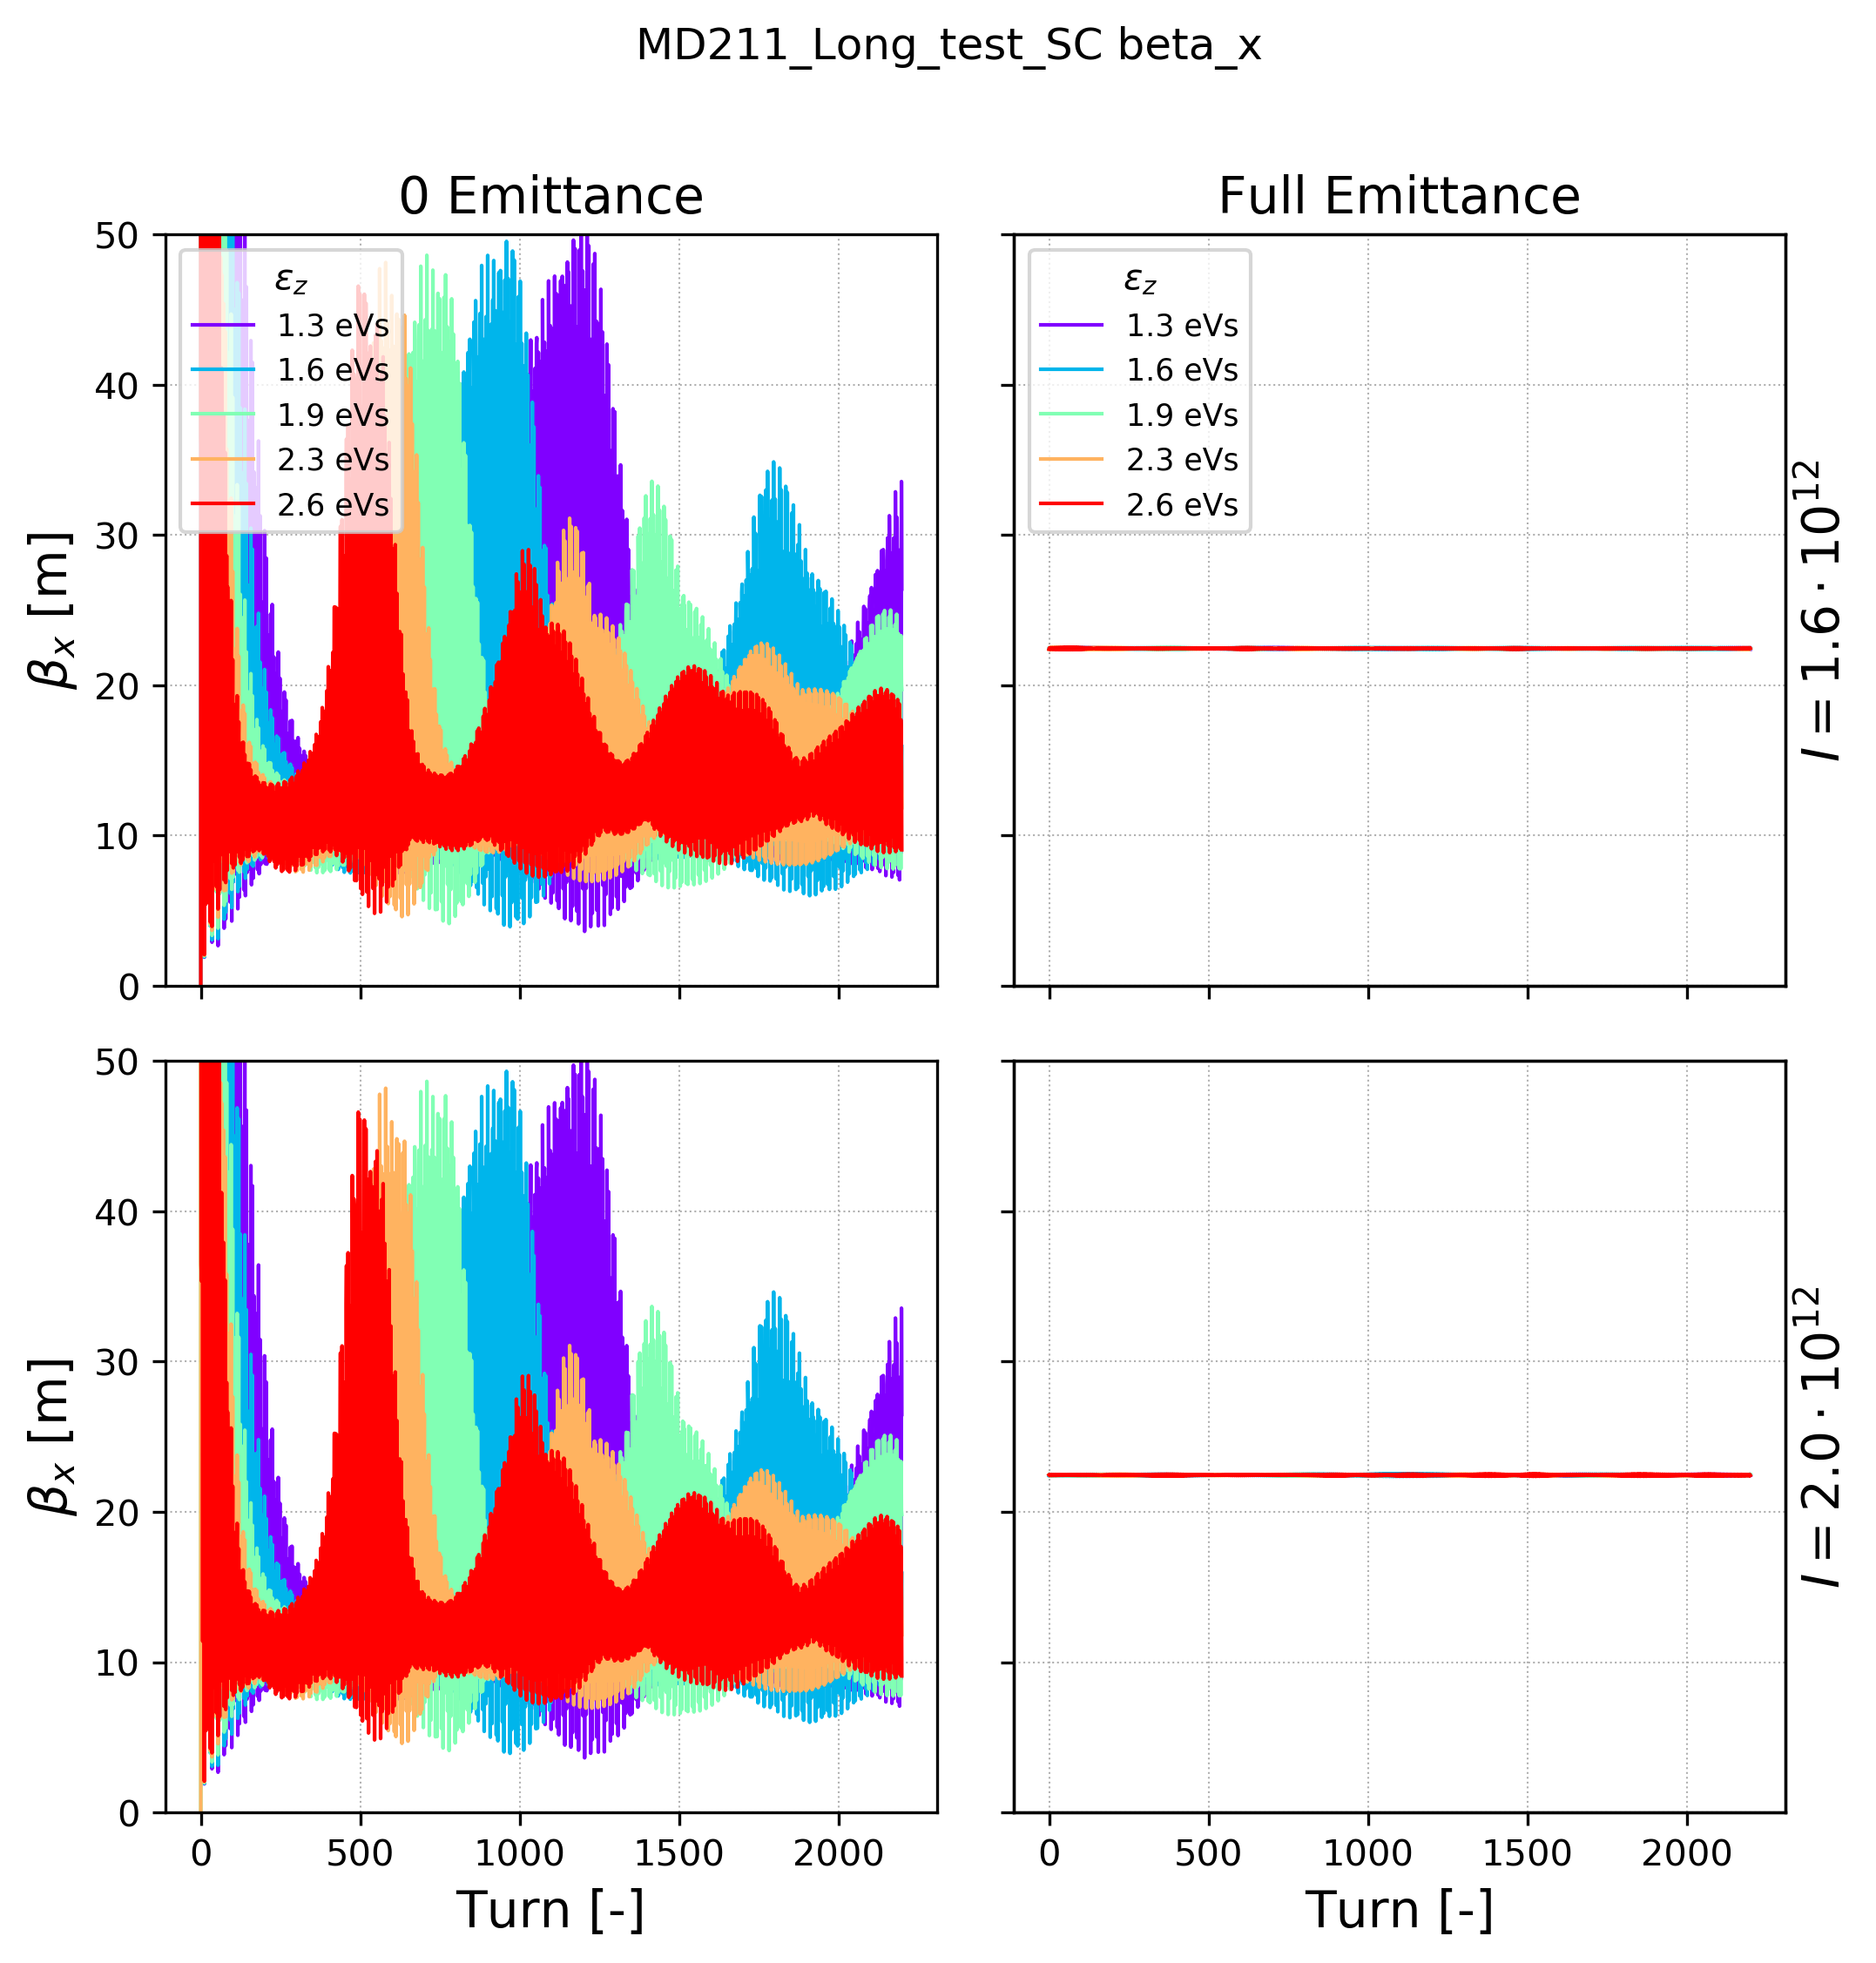

In [50]:
parameter = 'beta_x'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\beta_x$ [m]');
ax3.set_ylabel(r'$\beta_x$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        #print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        #str(round_sig(av_,4)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_,4)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        #print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        #str(round_sig(av_,4)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_,4)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax1.set_ylim(0, 50)
ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

In [46]:
dd1['1.3 eVs']['beta_y'][0]

array([nan, nan, nan, ..., nan, nan, nan])

Full Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  beta_y  =  11.7  range =  0.114  =  0.971 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  beta_y  =  11.7  range =  0.111  =  0.947 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  beta_y  =  11.7  range =  0.091  =  0.778 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  beta_y  =  11.7  range =  0.102  =  0.871 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  beta_y  =  11.7  range =  0.103  =  0.879 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.3 eVs Average  beta_y  =  11.7  range =  0.104  =  0.889 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.6 eVs Average  beta_y  =  11.7  range =  0.117  =  1.0 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.9 eVs Average  beta_y  =  11.7  range =  0.115  =  0.979 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   2.3 eVs Average  beta_y  =  11.7  range =  0.113  =  0.969 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   2.6 eVs Average  beta_y

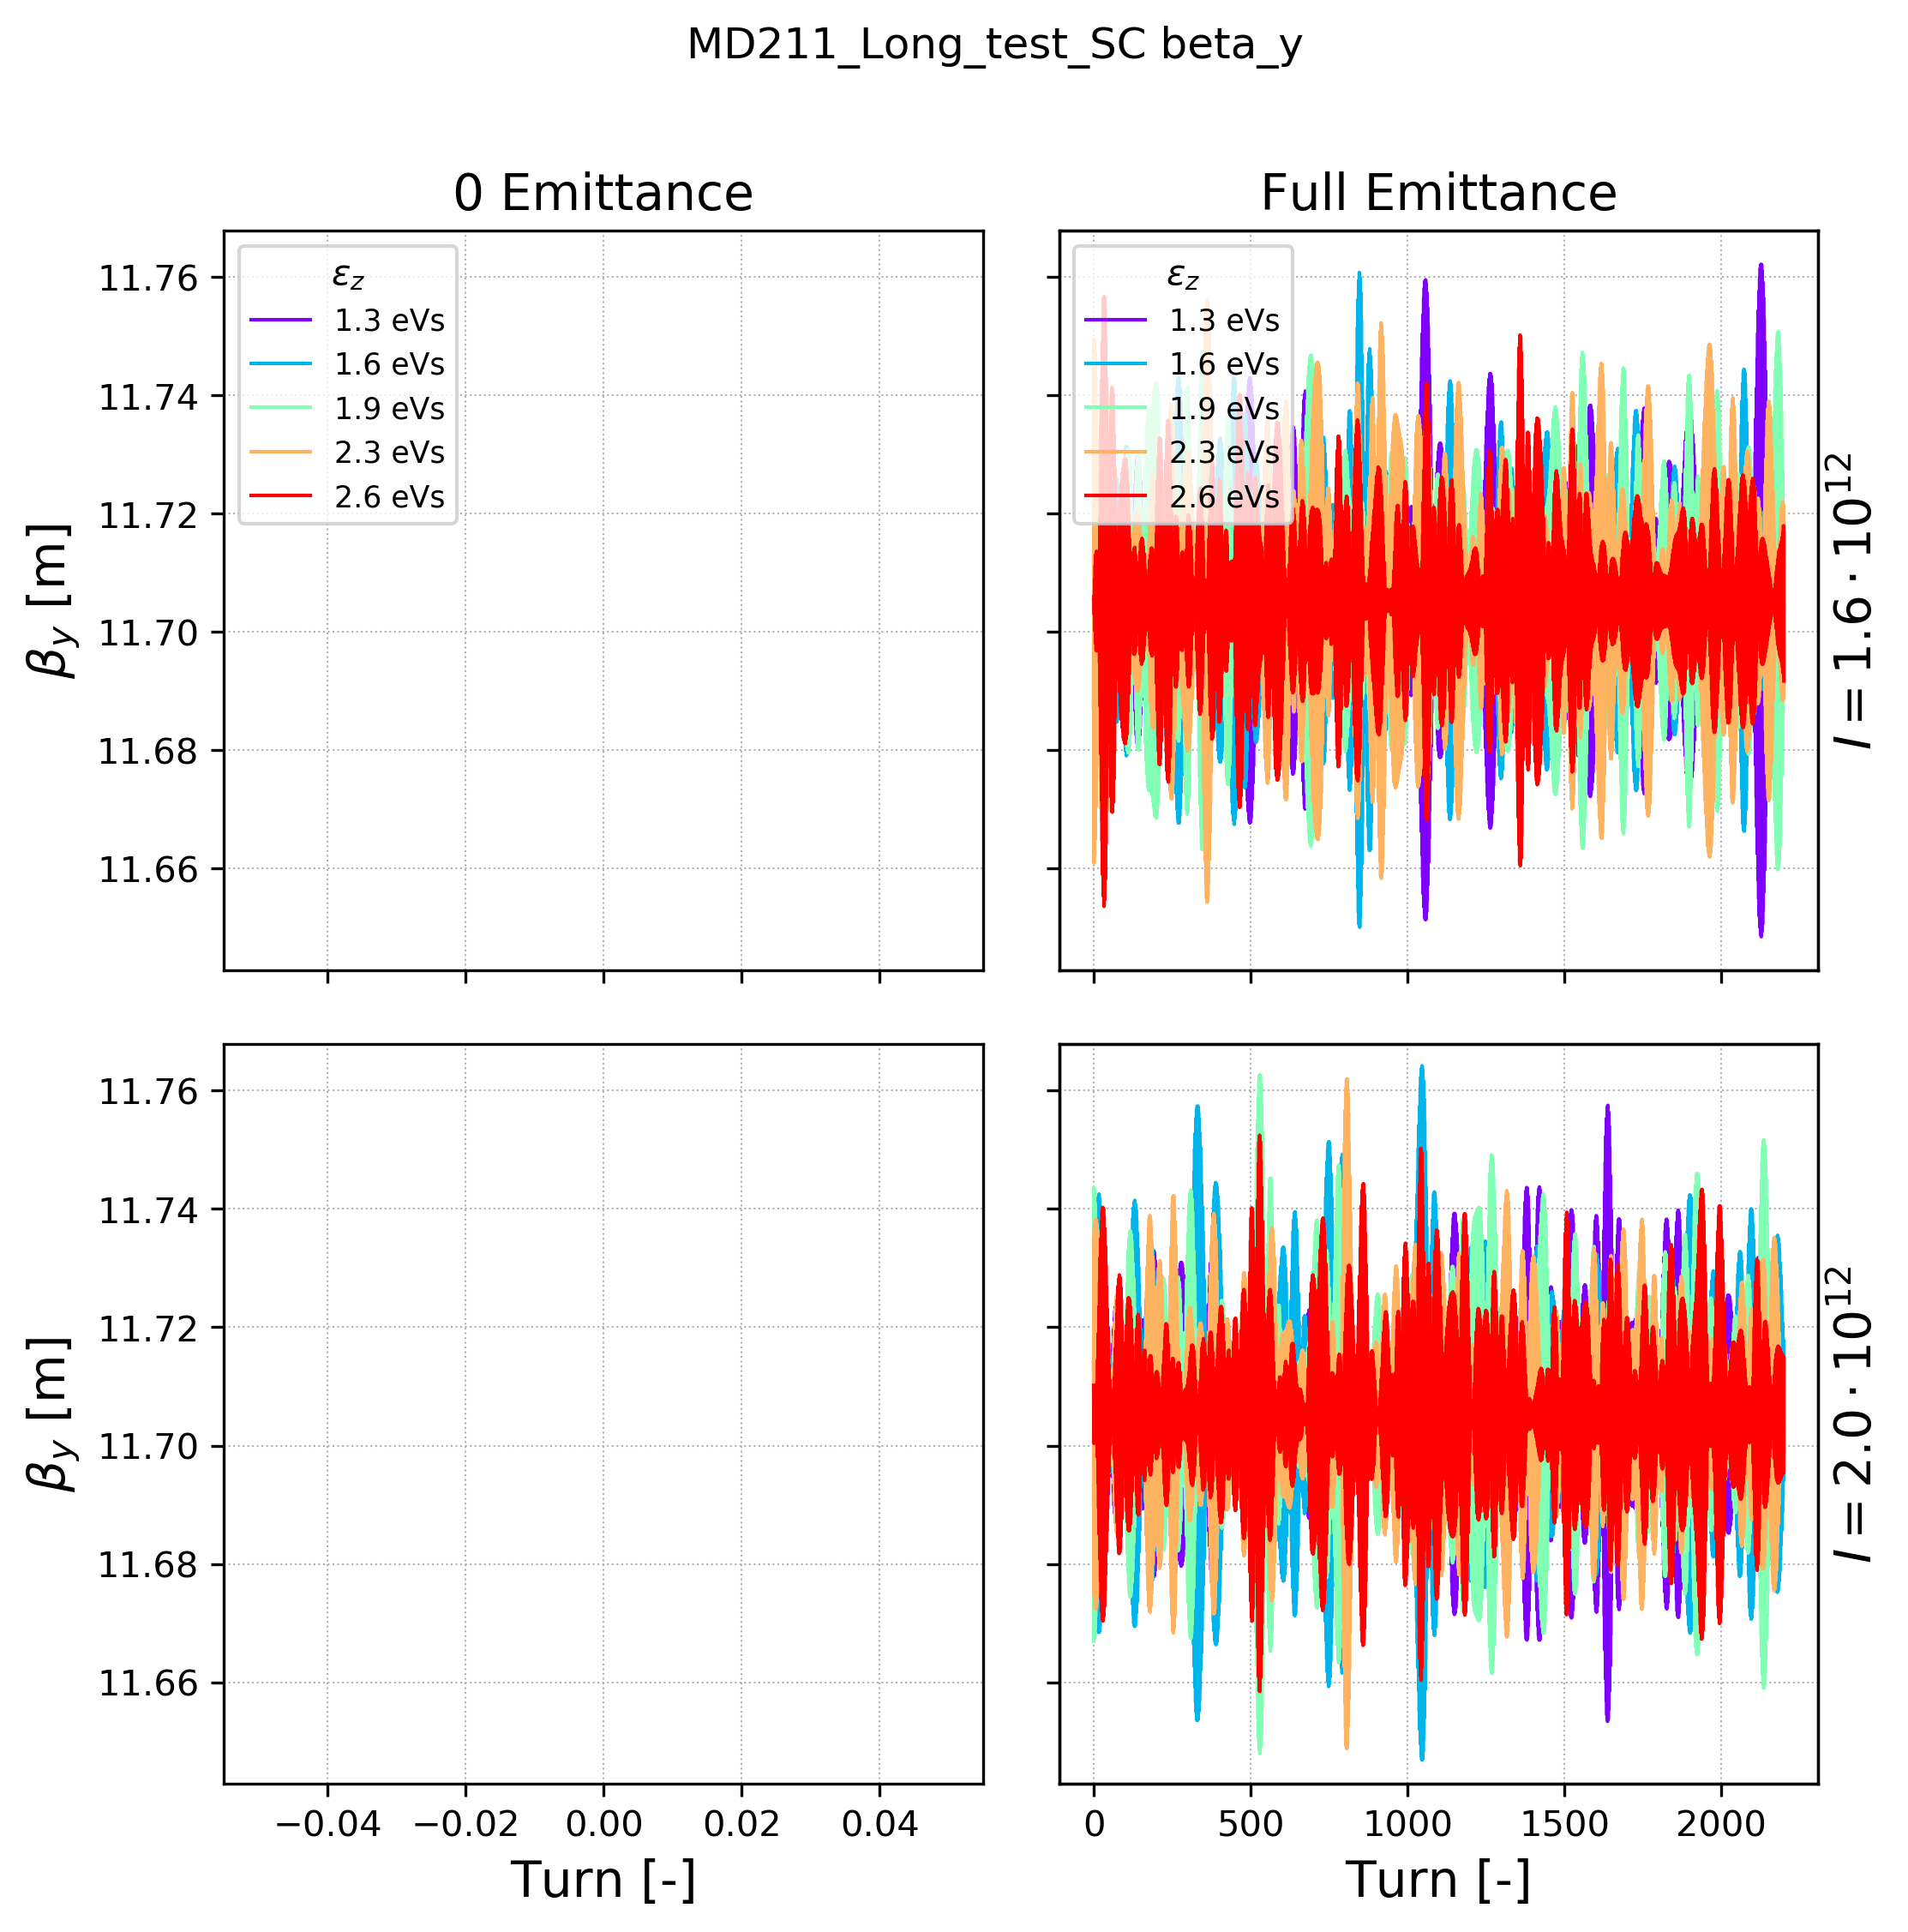

In [47]:
parameter = 'beta_y'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\beta_y$ [m]');
ax3.set_ylabel(r'$\beta_y$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        #print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        #str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        #print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        #str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

0 Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  D_x  =  3.12  range =  0.0157  =  0.503 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  D_x  =  3.13  range =  0.0195  =  0.623 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  D_x  =  3.12  range =  0.0244  =  0.783 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  D_x  =  3.12  range =  0.0299  =  0.96 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  D_x  =  3.13  range =  0.0342  =  1.09 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  D_x  =  3.13  range =  0.0676  =  2.16 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  D_x  =  3.13  range =  0.0236  =  0.755 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  D_x  =  3.13  range =  0.0285  =  0.912 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  D_x  =  3.13  range =  0.0216  =  0.69 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  D_x  =  3.11  range =  0.036  =  1.16 %
0

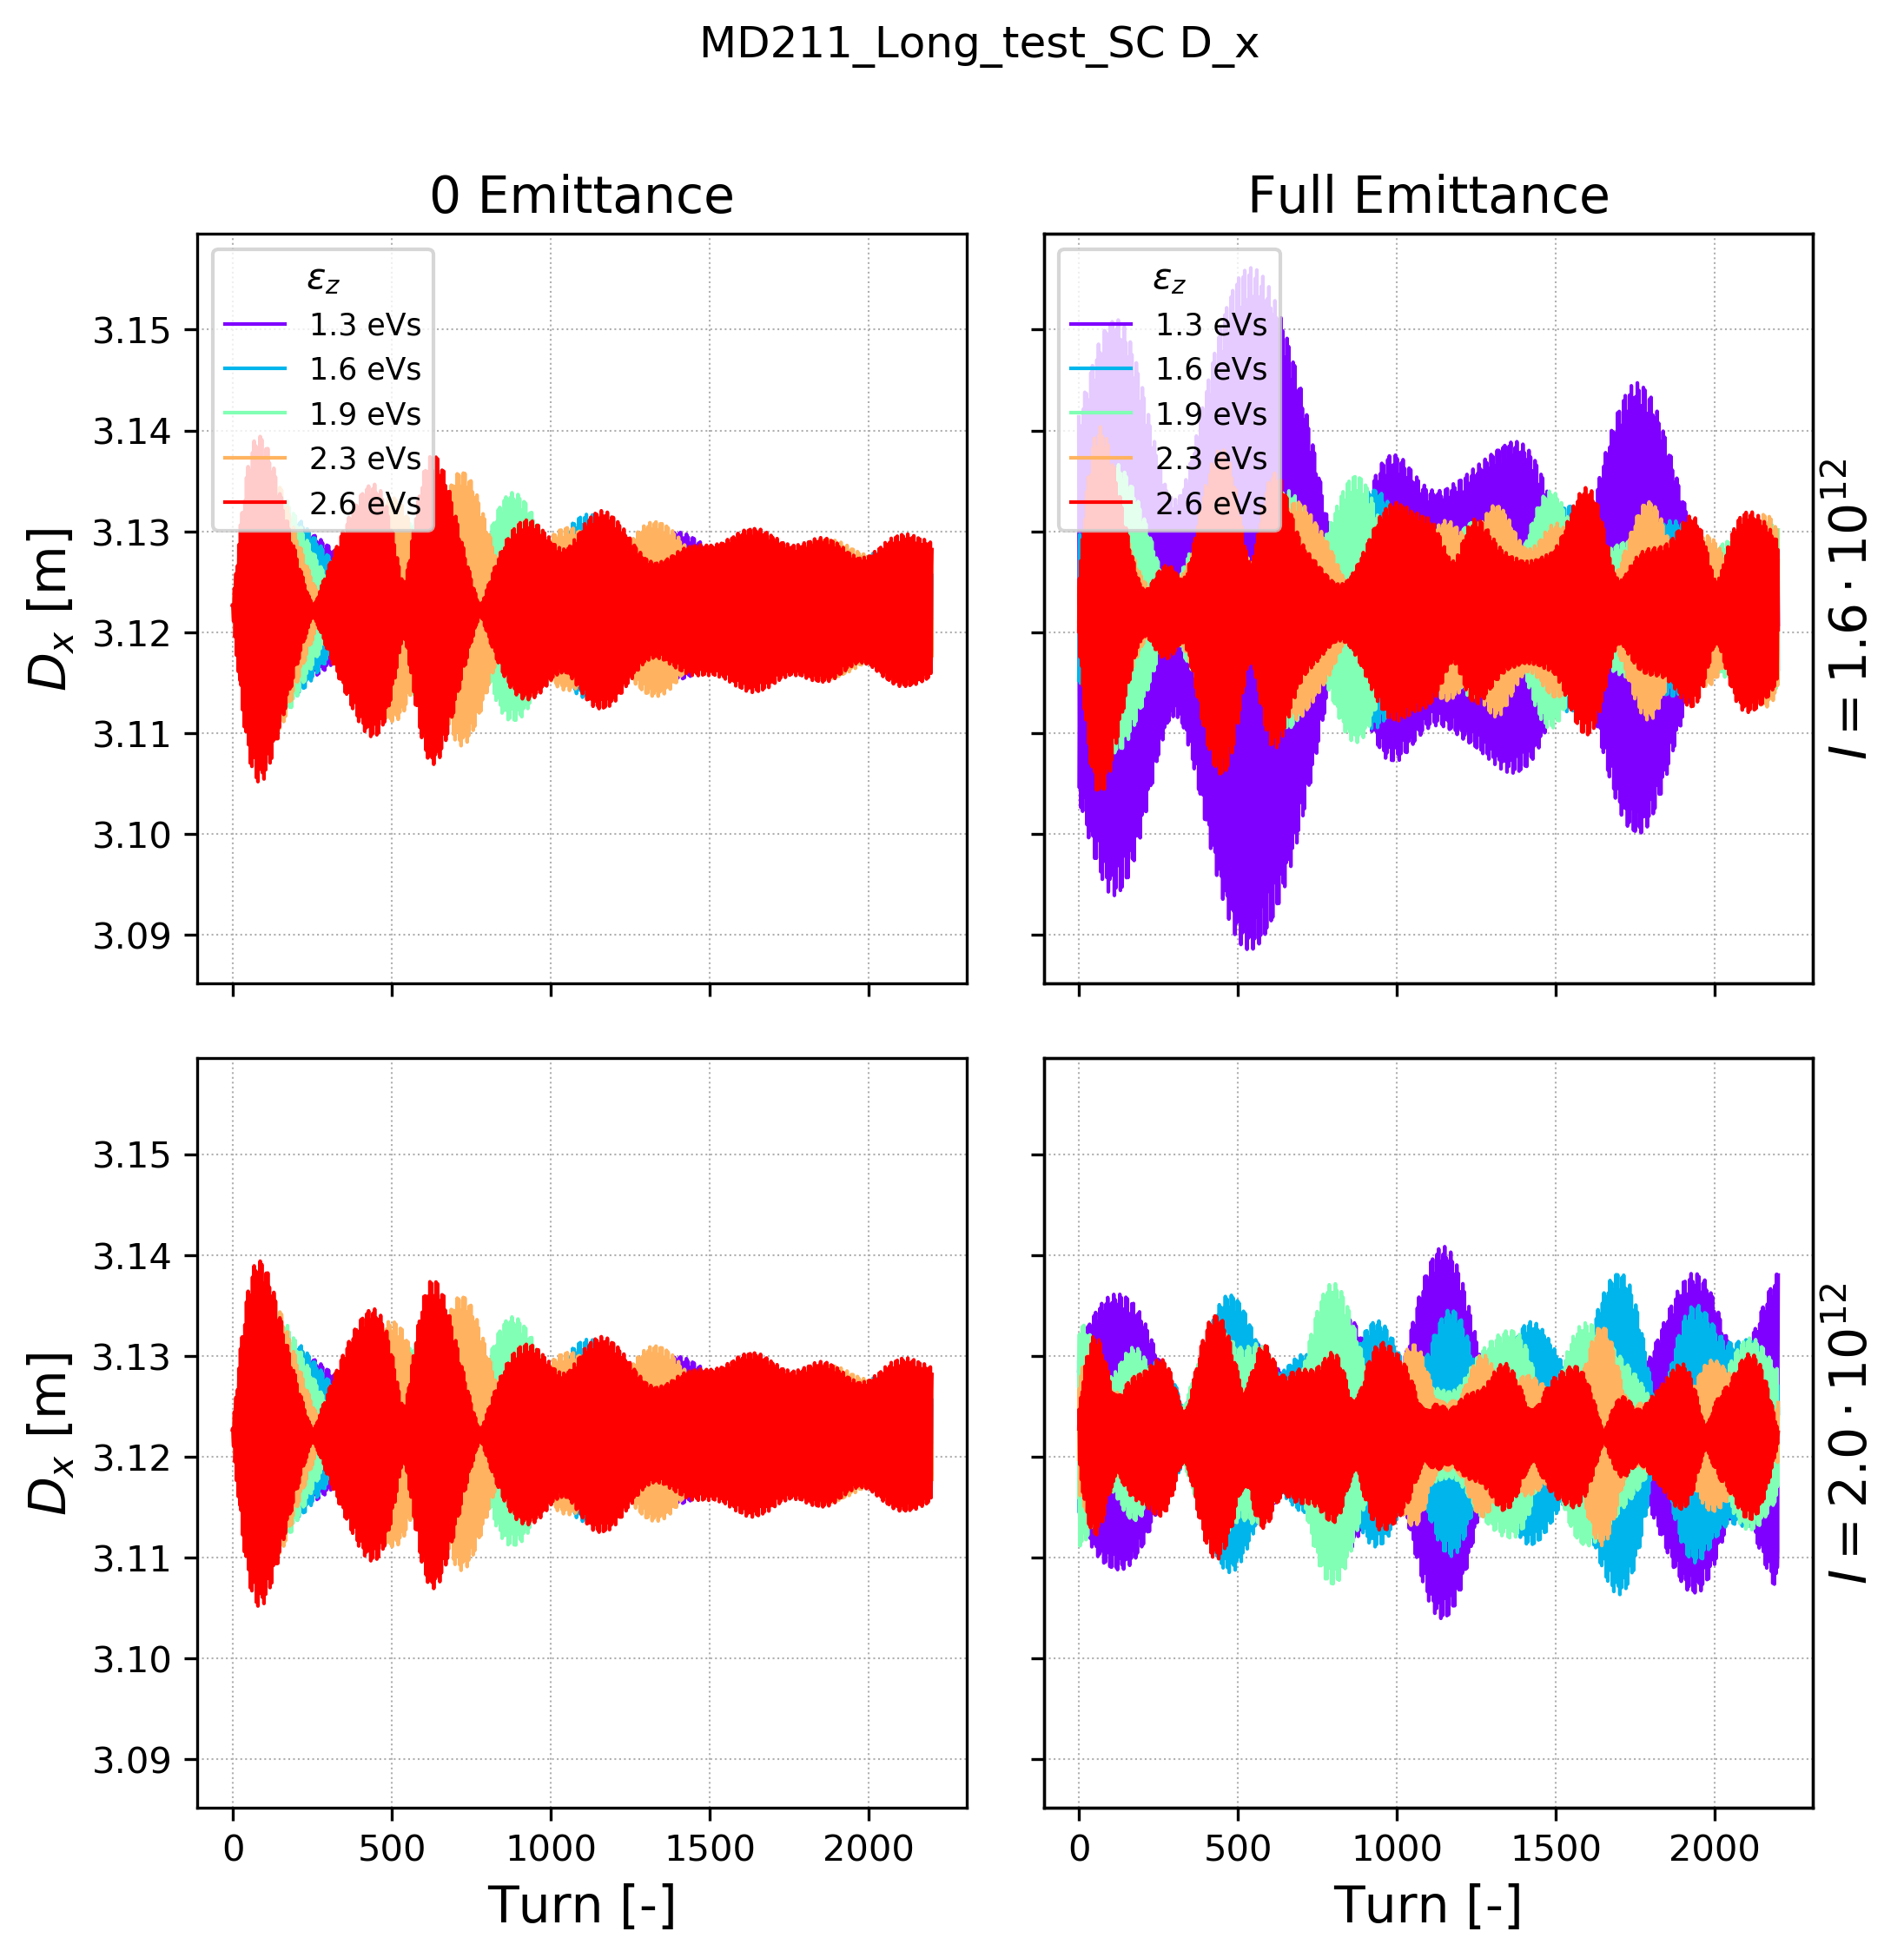

In [30]:
parameter = 'D_x'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$D_x$ [m]');
ax3.set_ylabel(r'$D_x$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

#ax1.set_xlim(0,10)
#ax2.set_xlim(0,10)

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

Full Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  D_y  =  0.00345  range =  0.023  =  667.0 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  D_y  =  0.00214  range =  0.0281  =  1310.0 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  D_y  =  -0.000302  range =  0.018  =  -5970.0 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  D_y  =  -0.00029  range =  0.0155  =  -5340.0 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  D_y  =  -0.00024  range =  0.0196  =  -8200.0 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.3 eVs Average  D_y  =  0.00717  range =  0.0318  =  444.0 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.6 eVs Average  D_y  =  0.00986  range =  0.0259  =  263.0 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.9 eVs Average  D_y  =  -0.00299  range =  0.0334  =  -1120.0 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   2.3 eVs Average  D_y  =  0.00016  range =  0.0159  =  9920.0 %
Full Emittance   $I = 2.0 \cdot 10^{12}$  

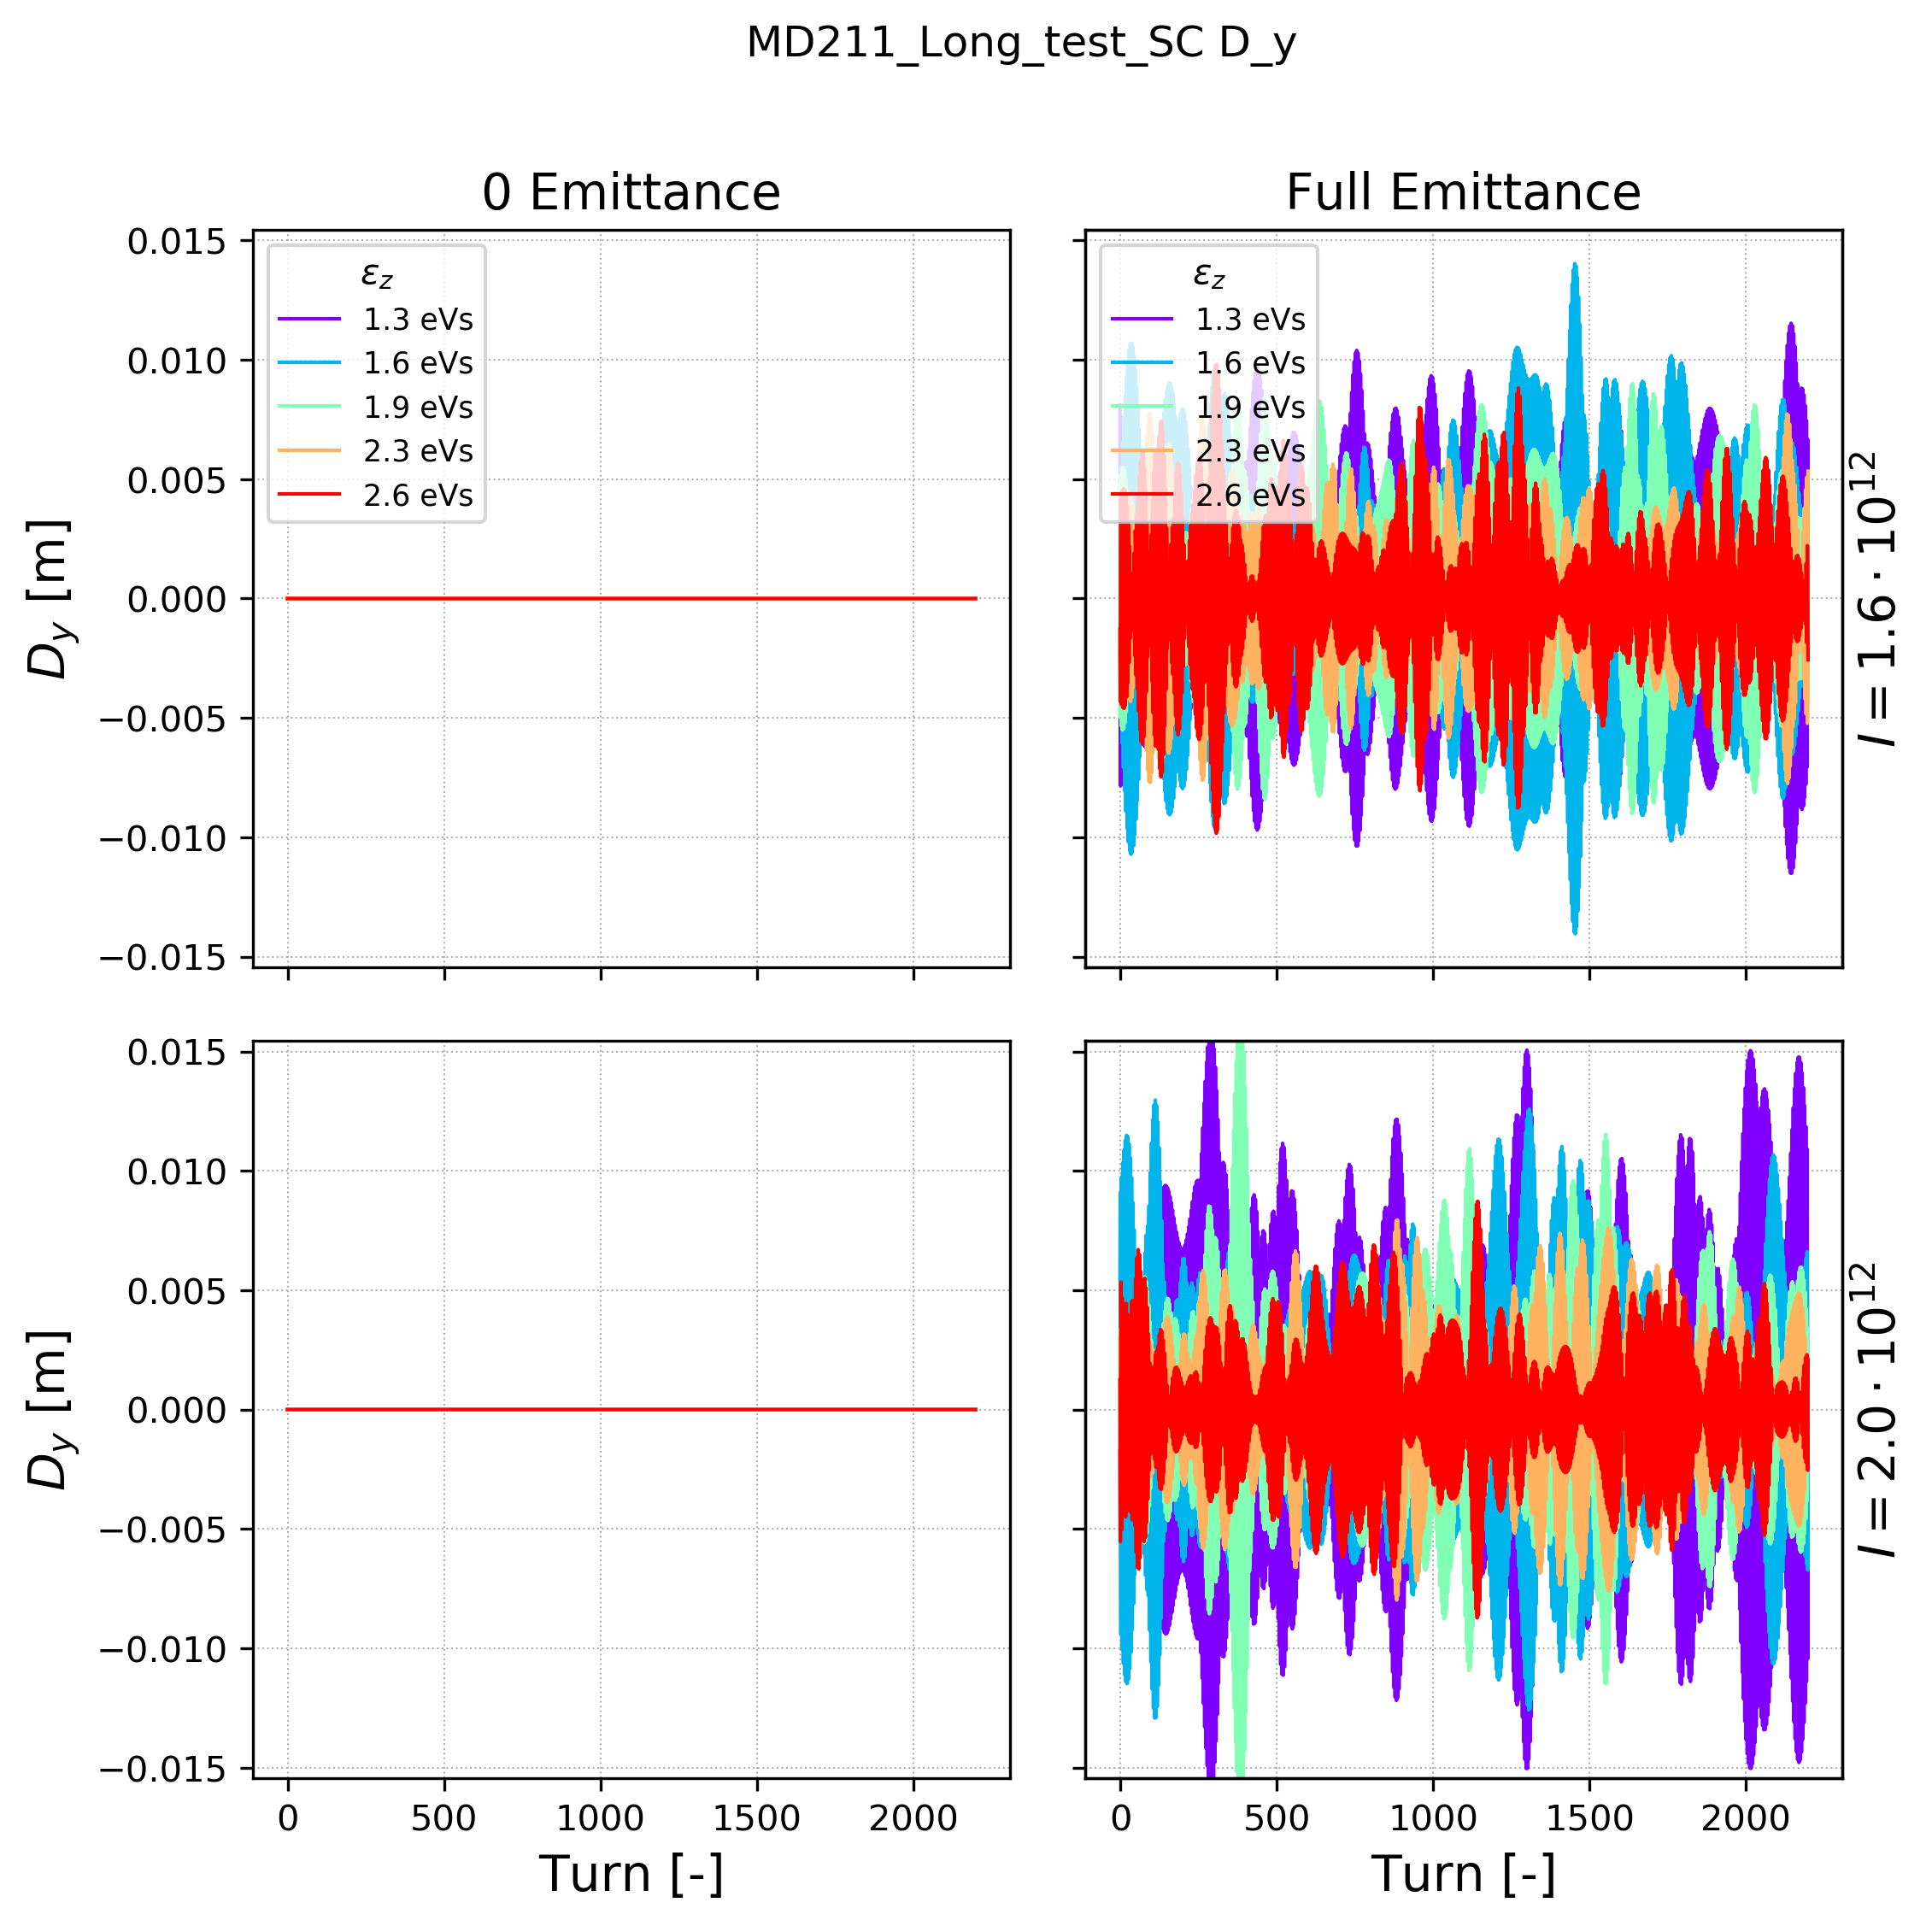

In [43]:
parameter = 'D_y'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$D_y$ [m]');
ax3.set_ylabel(r'$D_y$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        #print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        #str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        #print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        #str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

 0 Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  dpp_rms  =  0.801  range =  0.0383  =  4.78 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  dpp_rms  =  0.983  range =  0.0524  =  5.33 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  dpp_rms  =  1.25  range =  0.0584  =  4.66 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  dpp_rms  =  1.53  range =  0.0748  =  4.87 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  dpp_rms  =  1.75  range =  0.0939  =  5.37 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  dpp_rms  =  0.802  range =  0.0403  =  5.02 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  dpp_rms  =  0.984  range =  0.0521  =  5.3 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  dpp_rms  =  1.25  range =  0.0592  =  4.73 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  dpp_rms  =  1.53  range =  0.0763  =  4.97 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  dpp_rm

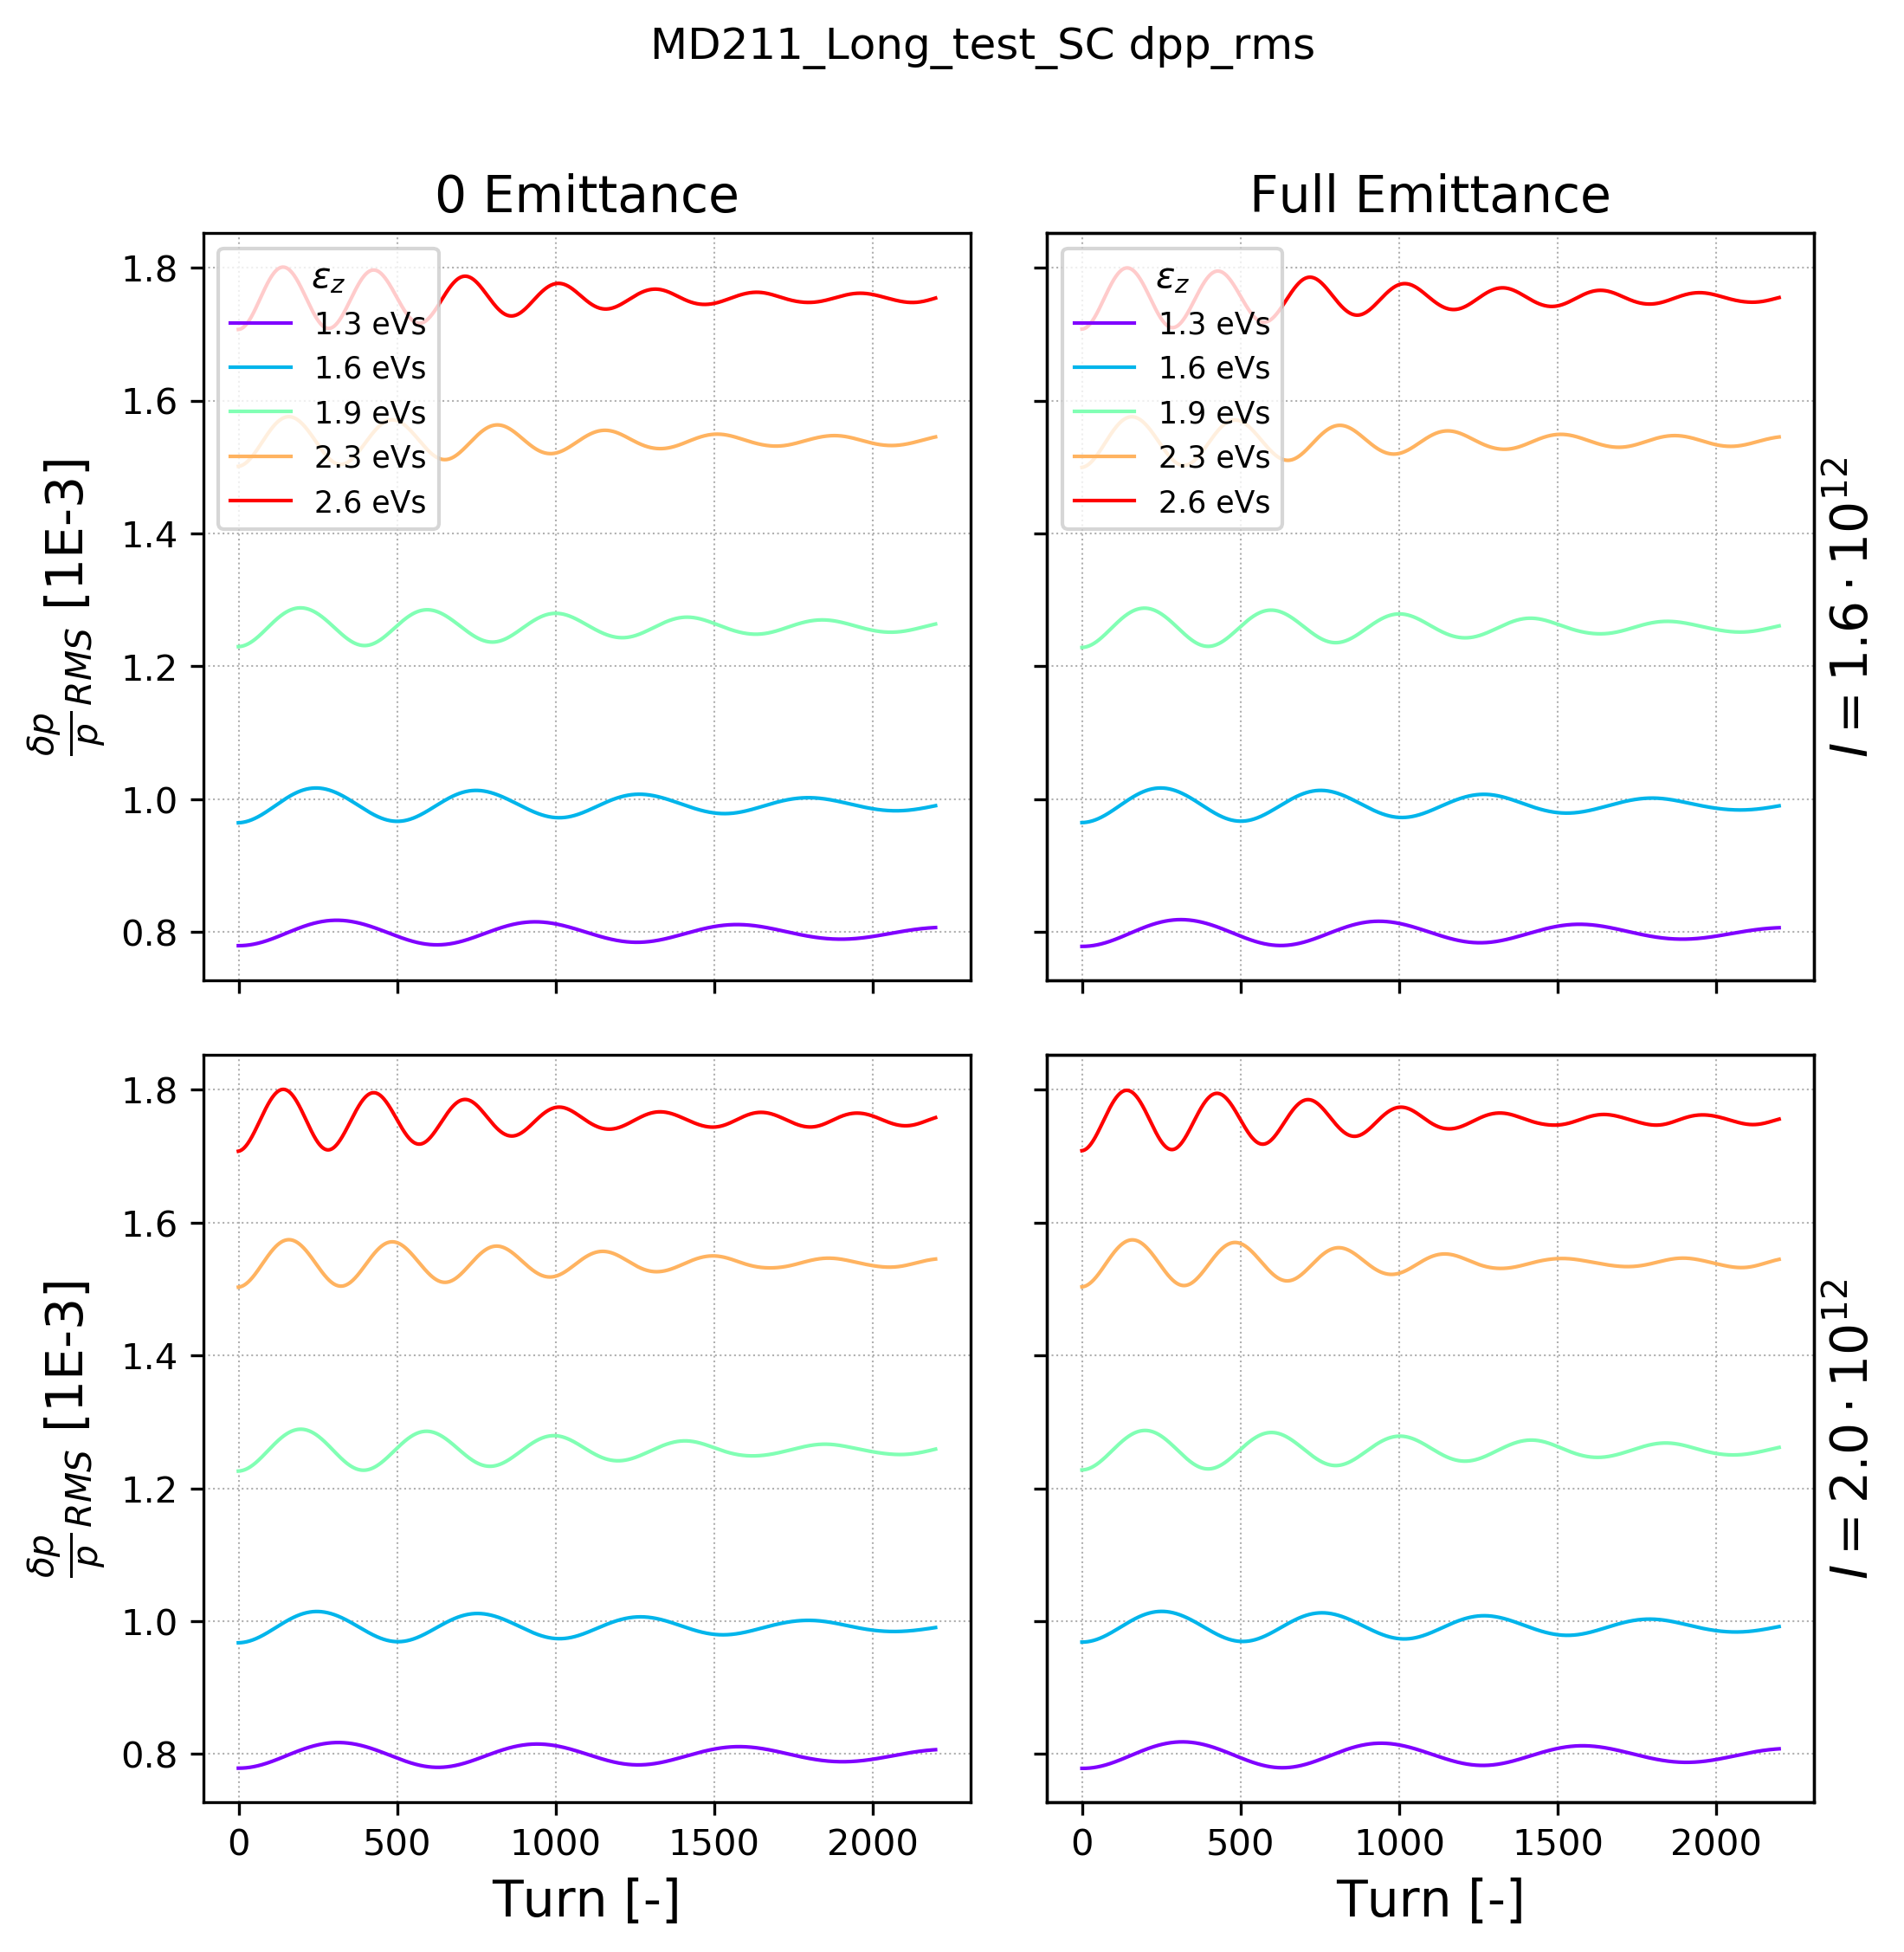

In [32]:
parameter = 'dpp_rms'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [1E-3]');
ax3.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [1E-3]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

0 Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  bunchlength  =  188.0  range =  8.58  =  4.58 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  bunchlength  =  189.0  range =  9.47  =  5.0 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  bunchlength  =  189.0  range =  8.36  =  4.42 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  bunchlength  =  189.0  range =  8.72  =  4.62 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  bunchlength  =  189.0  range =  9.61  =  5.09 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  bunchlength  =  187.0  range =  9.03  =  4.82 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  bunchlength  =  189.0  range =  9.39  =  4.96 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  bunchlength  =  189.0  range =  8.49  =  4.49 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  bunchlength  =  188.0  range =  8.87  =  4.71 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2

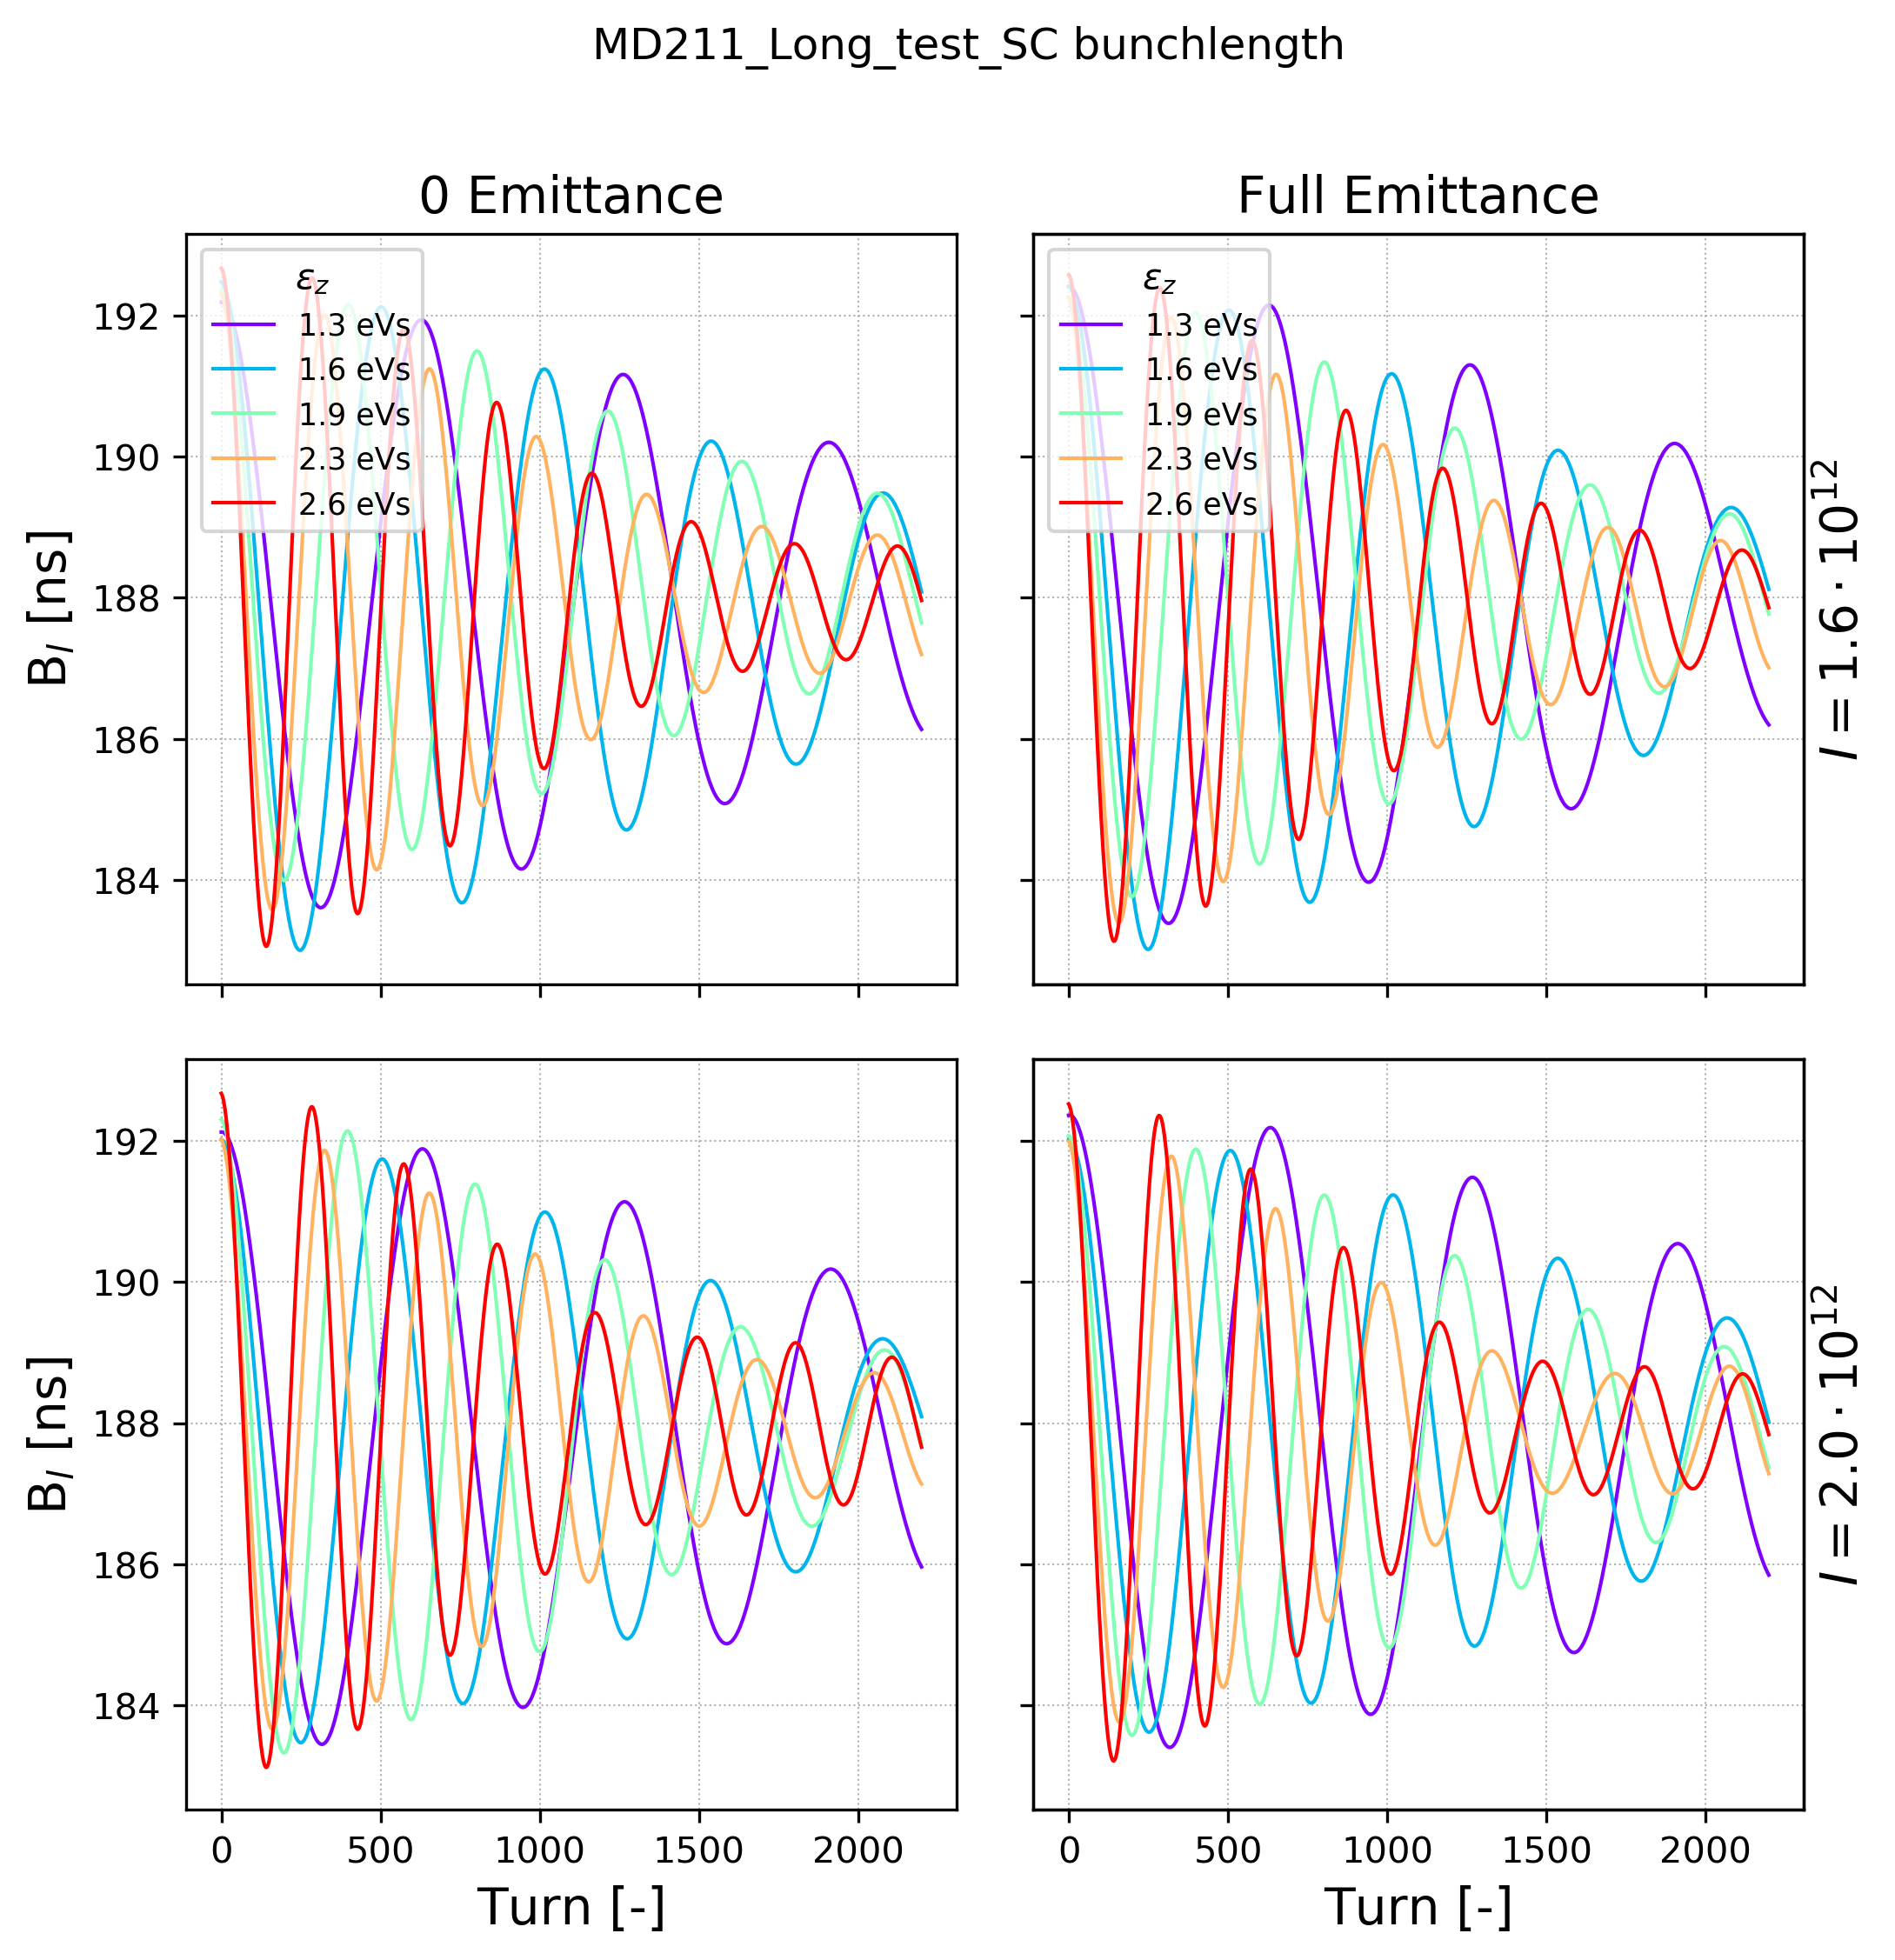

In [33]:
parameter = 'bunchlength'
multi1 = 1E9

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'B$_l$ [ns]');
ax3.set_ylabel(r'B$_l$ [ns]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))


c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

0 Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_z  =  12.9  range =  0.589  =  4.58 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_z  =  13.0  range =  0.65  =  5.0 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_z  =  13.0  range =  0.574  =  4.42 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_z  =  13.0  range =  0.599  =  4.62 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  sig_z  =  12.9  range =  0.66  =  5.09 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_z  =  12.9  range =  0.62  =  4.82 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_z  =  13.0  range =  0.645  =  4.96 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_z  =  13.0  range =  0.582  =  4.49 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_z  =  12.9  range =  0.609  =  4.71 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  sig_z  =  12.9  range =  0.648  =  5.01 %

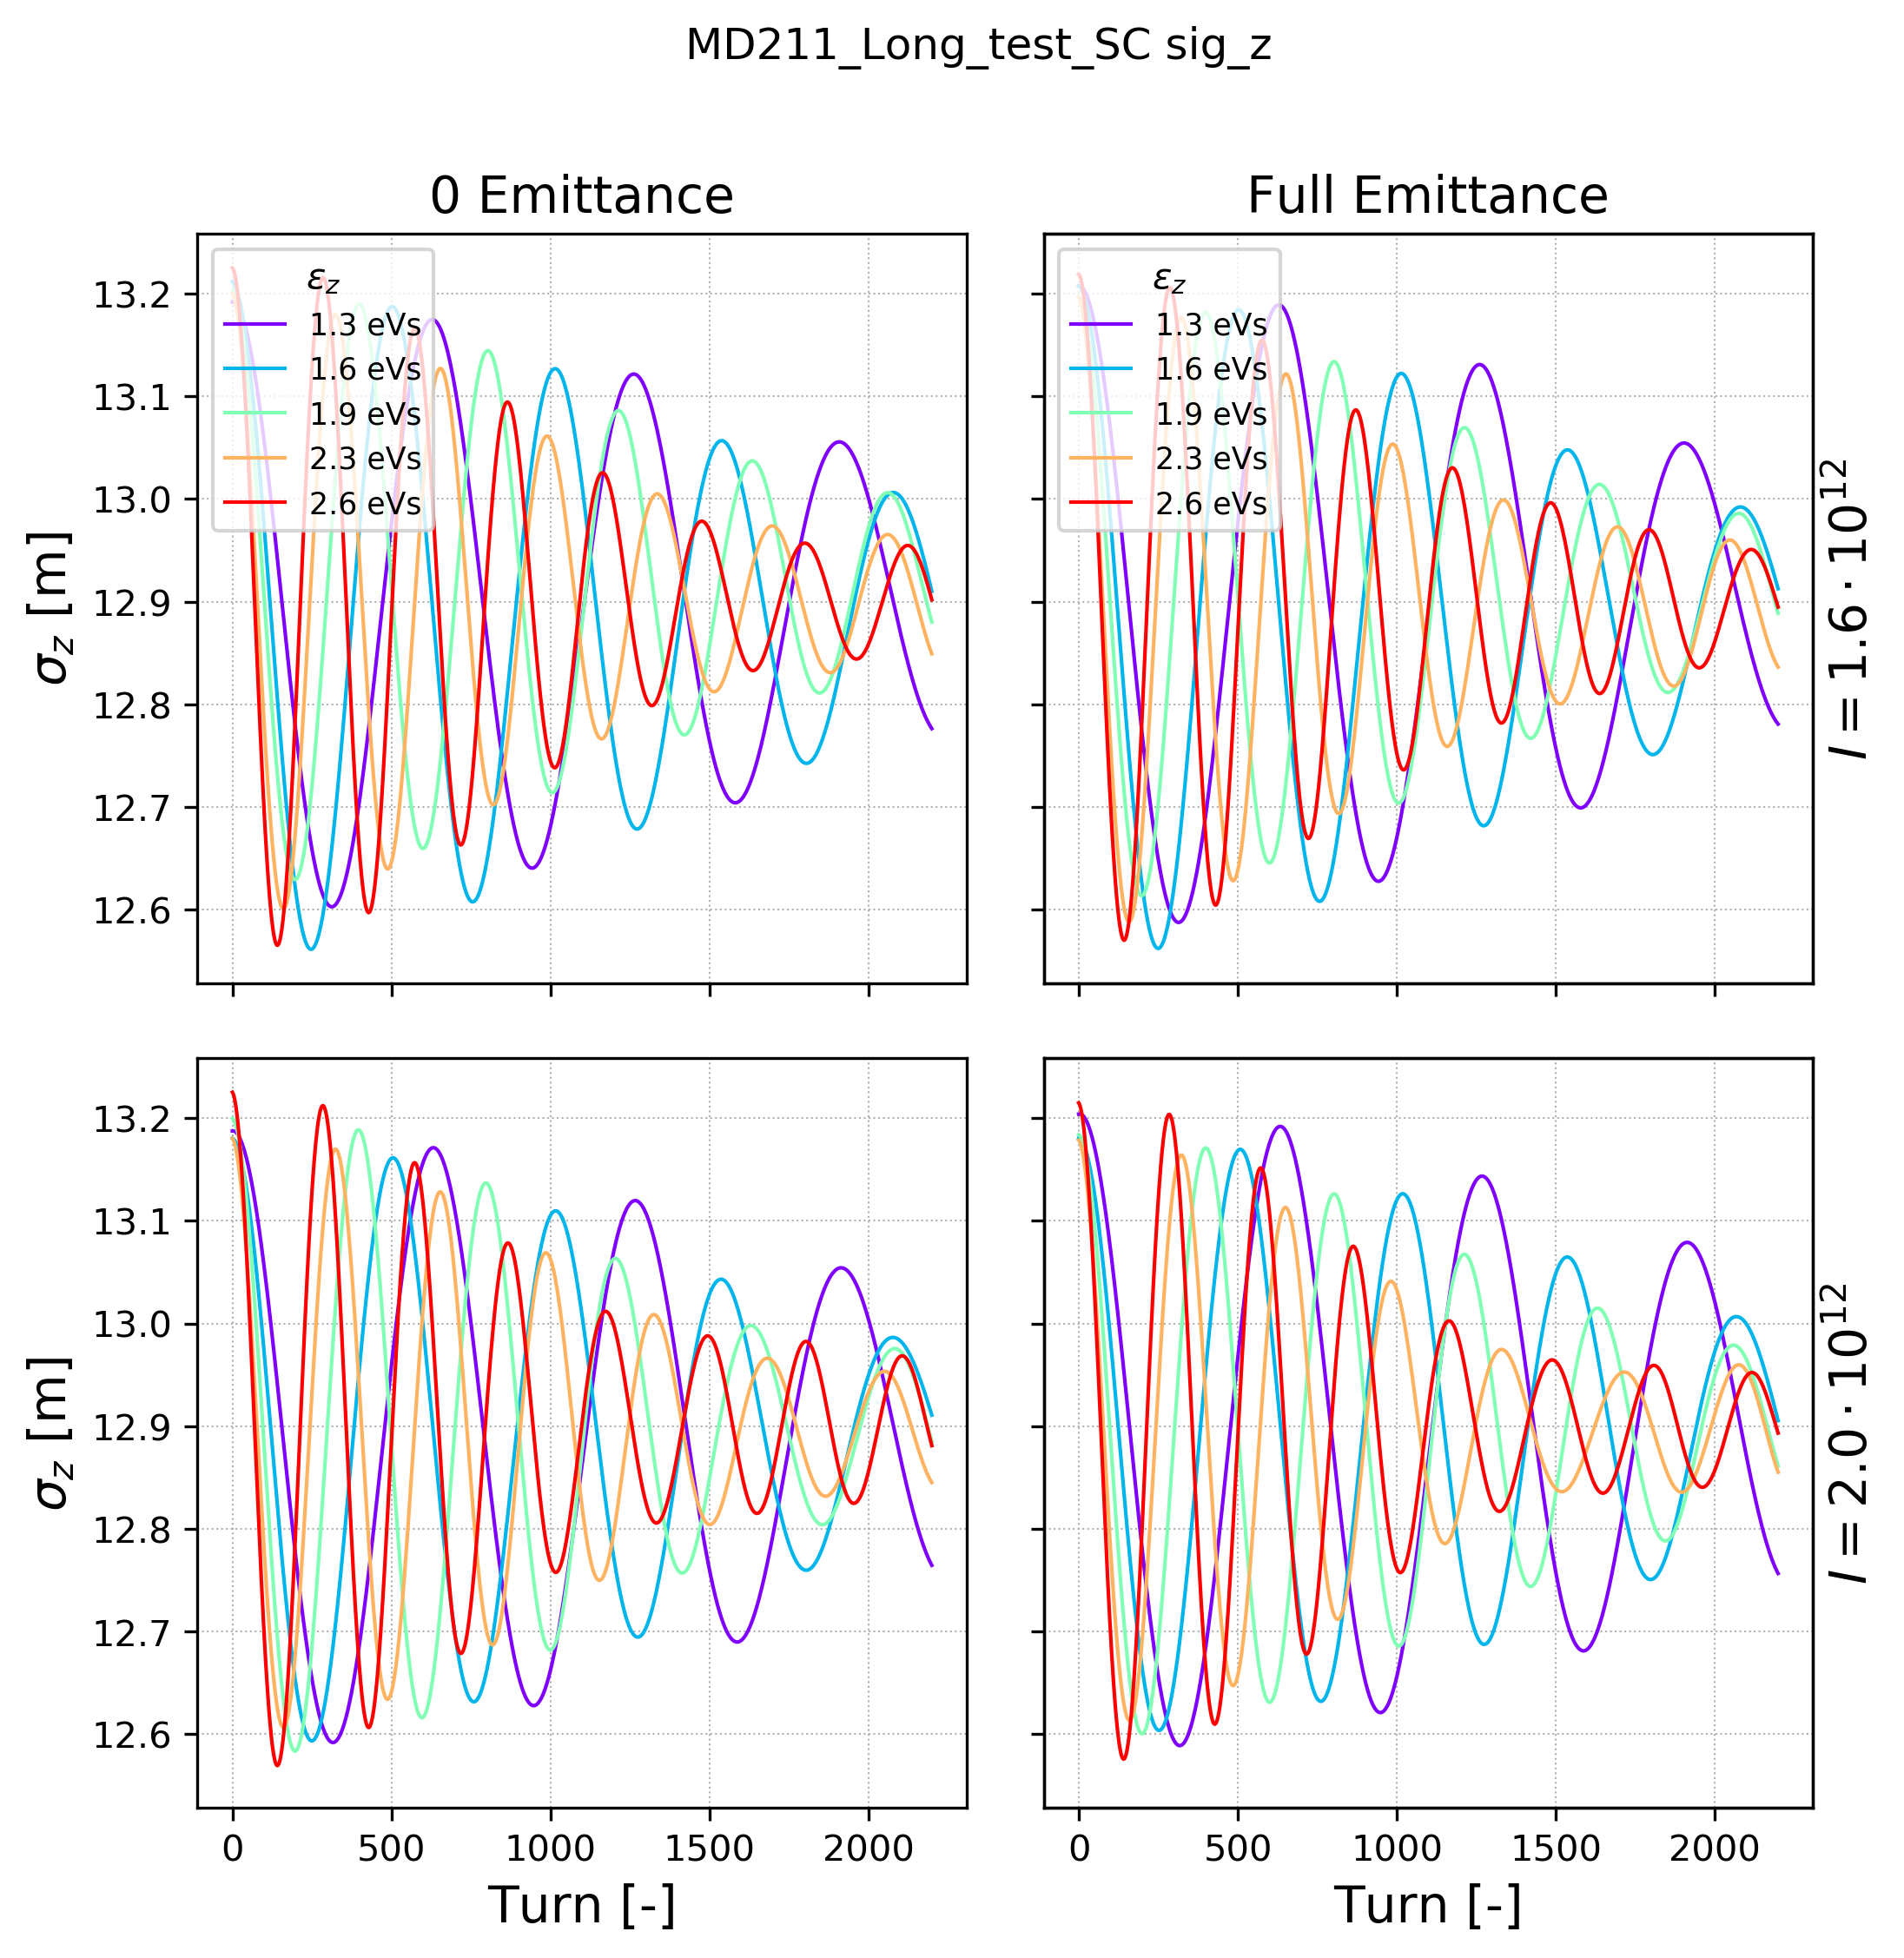

In [34]:
parameter = 'sig_z'
multi1 = 1


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_z$ [m]');
ax3.set_ylabel(r'$\sigma_z$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

0 Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_dE  =  1.57  range =  0.0751  =  4.78 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_dE  =  1.93  range =  0.103  =  5.33 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_dE  =  2.46  range =  0.115  =  4.66 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_dE  =  3.01  range =  0.147  =  4.87 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  sig_dE  =  3.43  range =  0.184  =  5.37 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_dE  =  1.57  range =  0.079  =  5.02 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_dE  =  1.93  range =  0.102  =  5.3 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_dE  =  2.45  range =  0.116  =  4.73 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_dE  =  3.01  range =  0.149  =  4.97 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  sig_dE  =  3.43  range =  0.

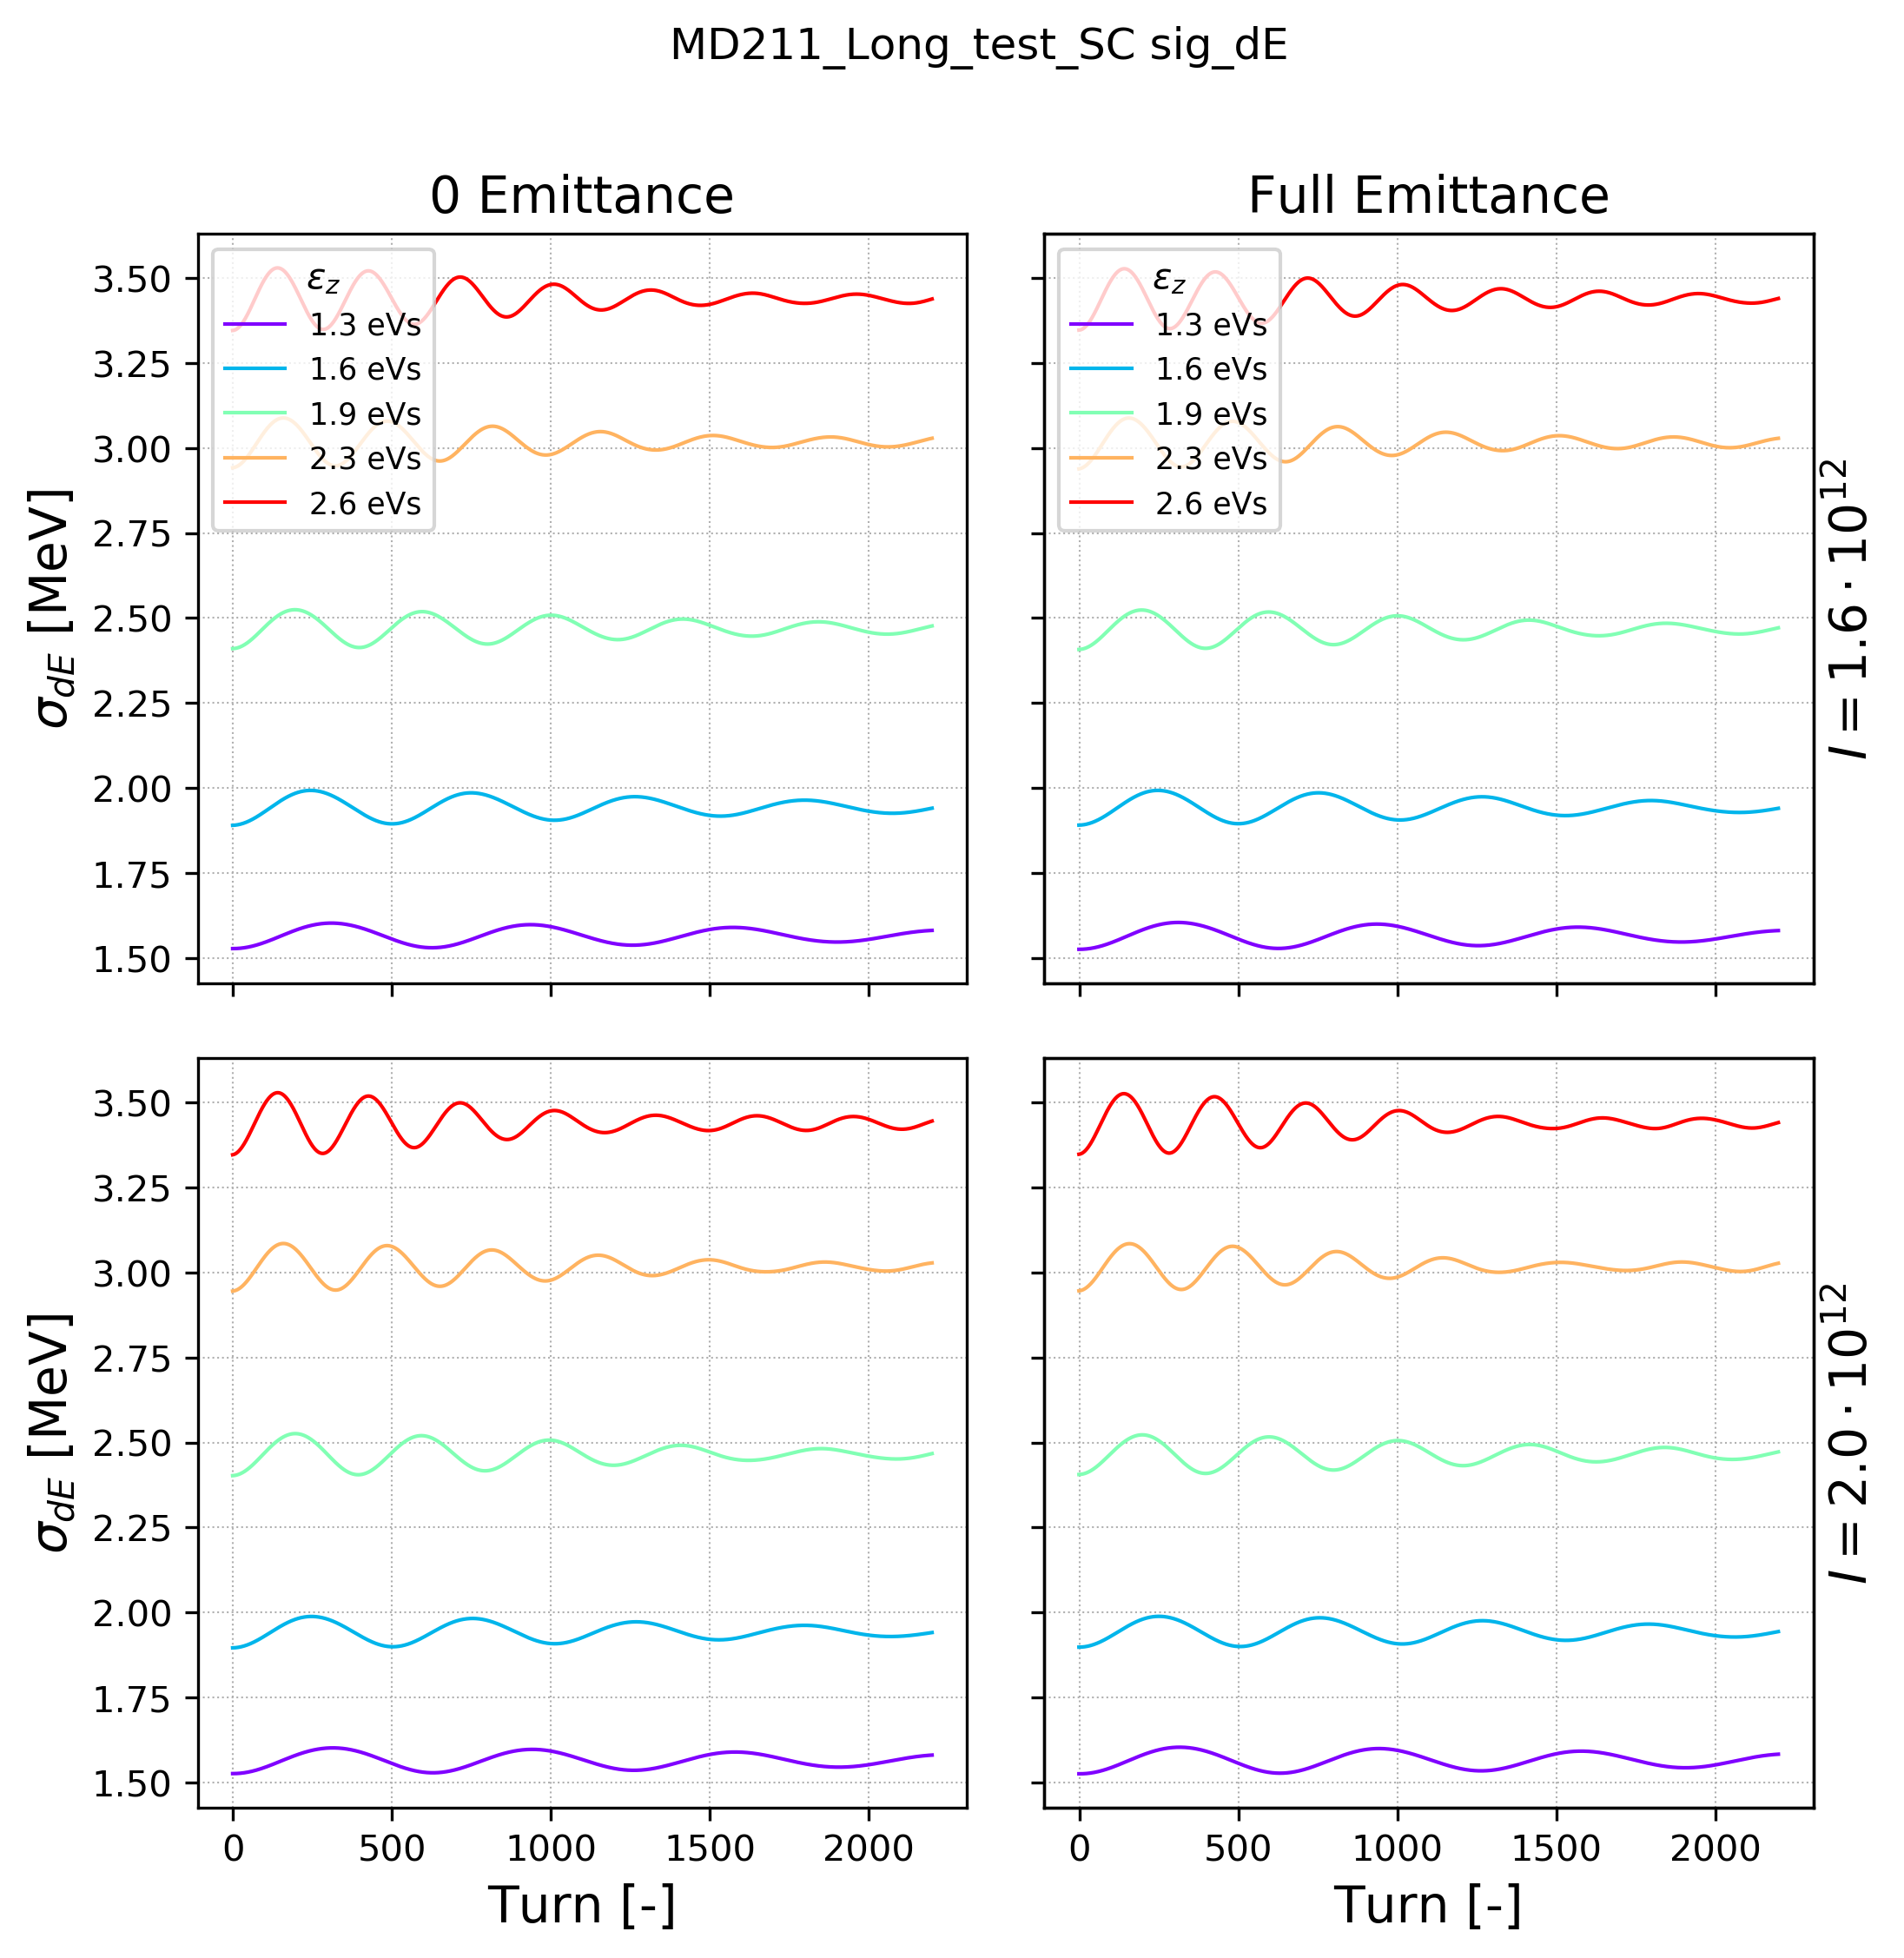

In [35]:
parameter = 'sig_dE'
multi1 = 1E3


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_{dE}$ [MeV]');
ax3.set_ylabel(r'$\sigma_{dE}$ [MeV]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

0 Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_dE  =  0.00157  range =  7.51e-05  =  4.78 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_dE  =  0.00193  range =  0.000103  =  5.33 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_dE  =  0.00246  range =  0.000115  =  4.66 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_dE  =  0.00301  range =  0.000147  =  4.87 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  sig_dE  =  0.00343  range =  0.000184  =  5.37 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  sig_dE  =  0.00157  range =  7.9e-05  =  5.02 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  sig_dE  =  0.00193  range =  0.000102  =  5.3 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  sig_dE  =  0.00245  range =  0.000116  =  4.73 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  sig_dE  =  0.00301  range =  0.000149  =  4.97 %
Full Emittance   $I = 1.6 \cdot 10^{

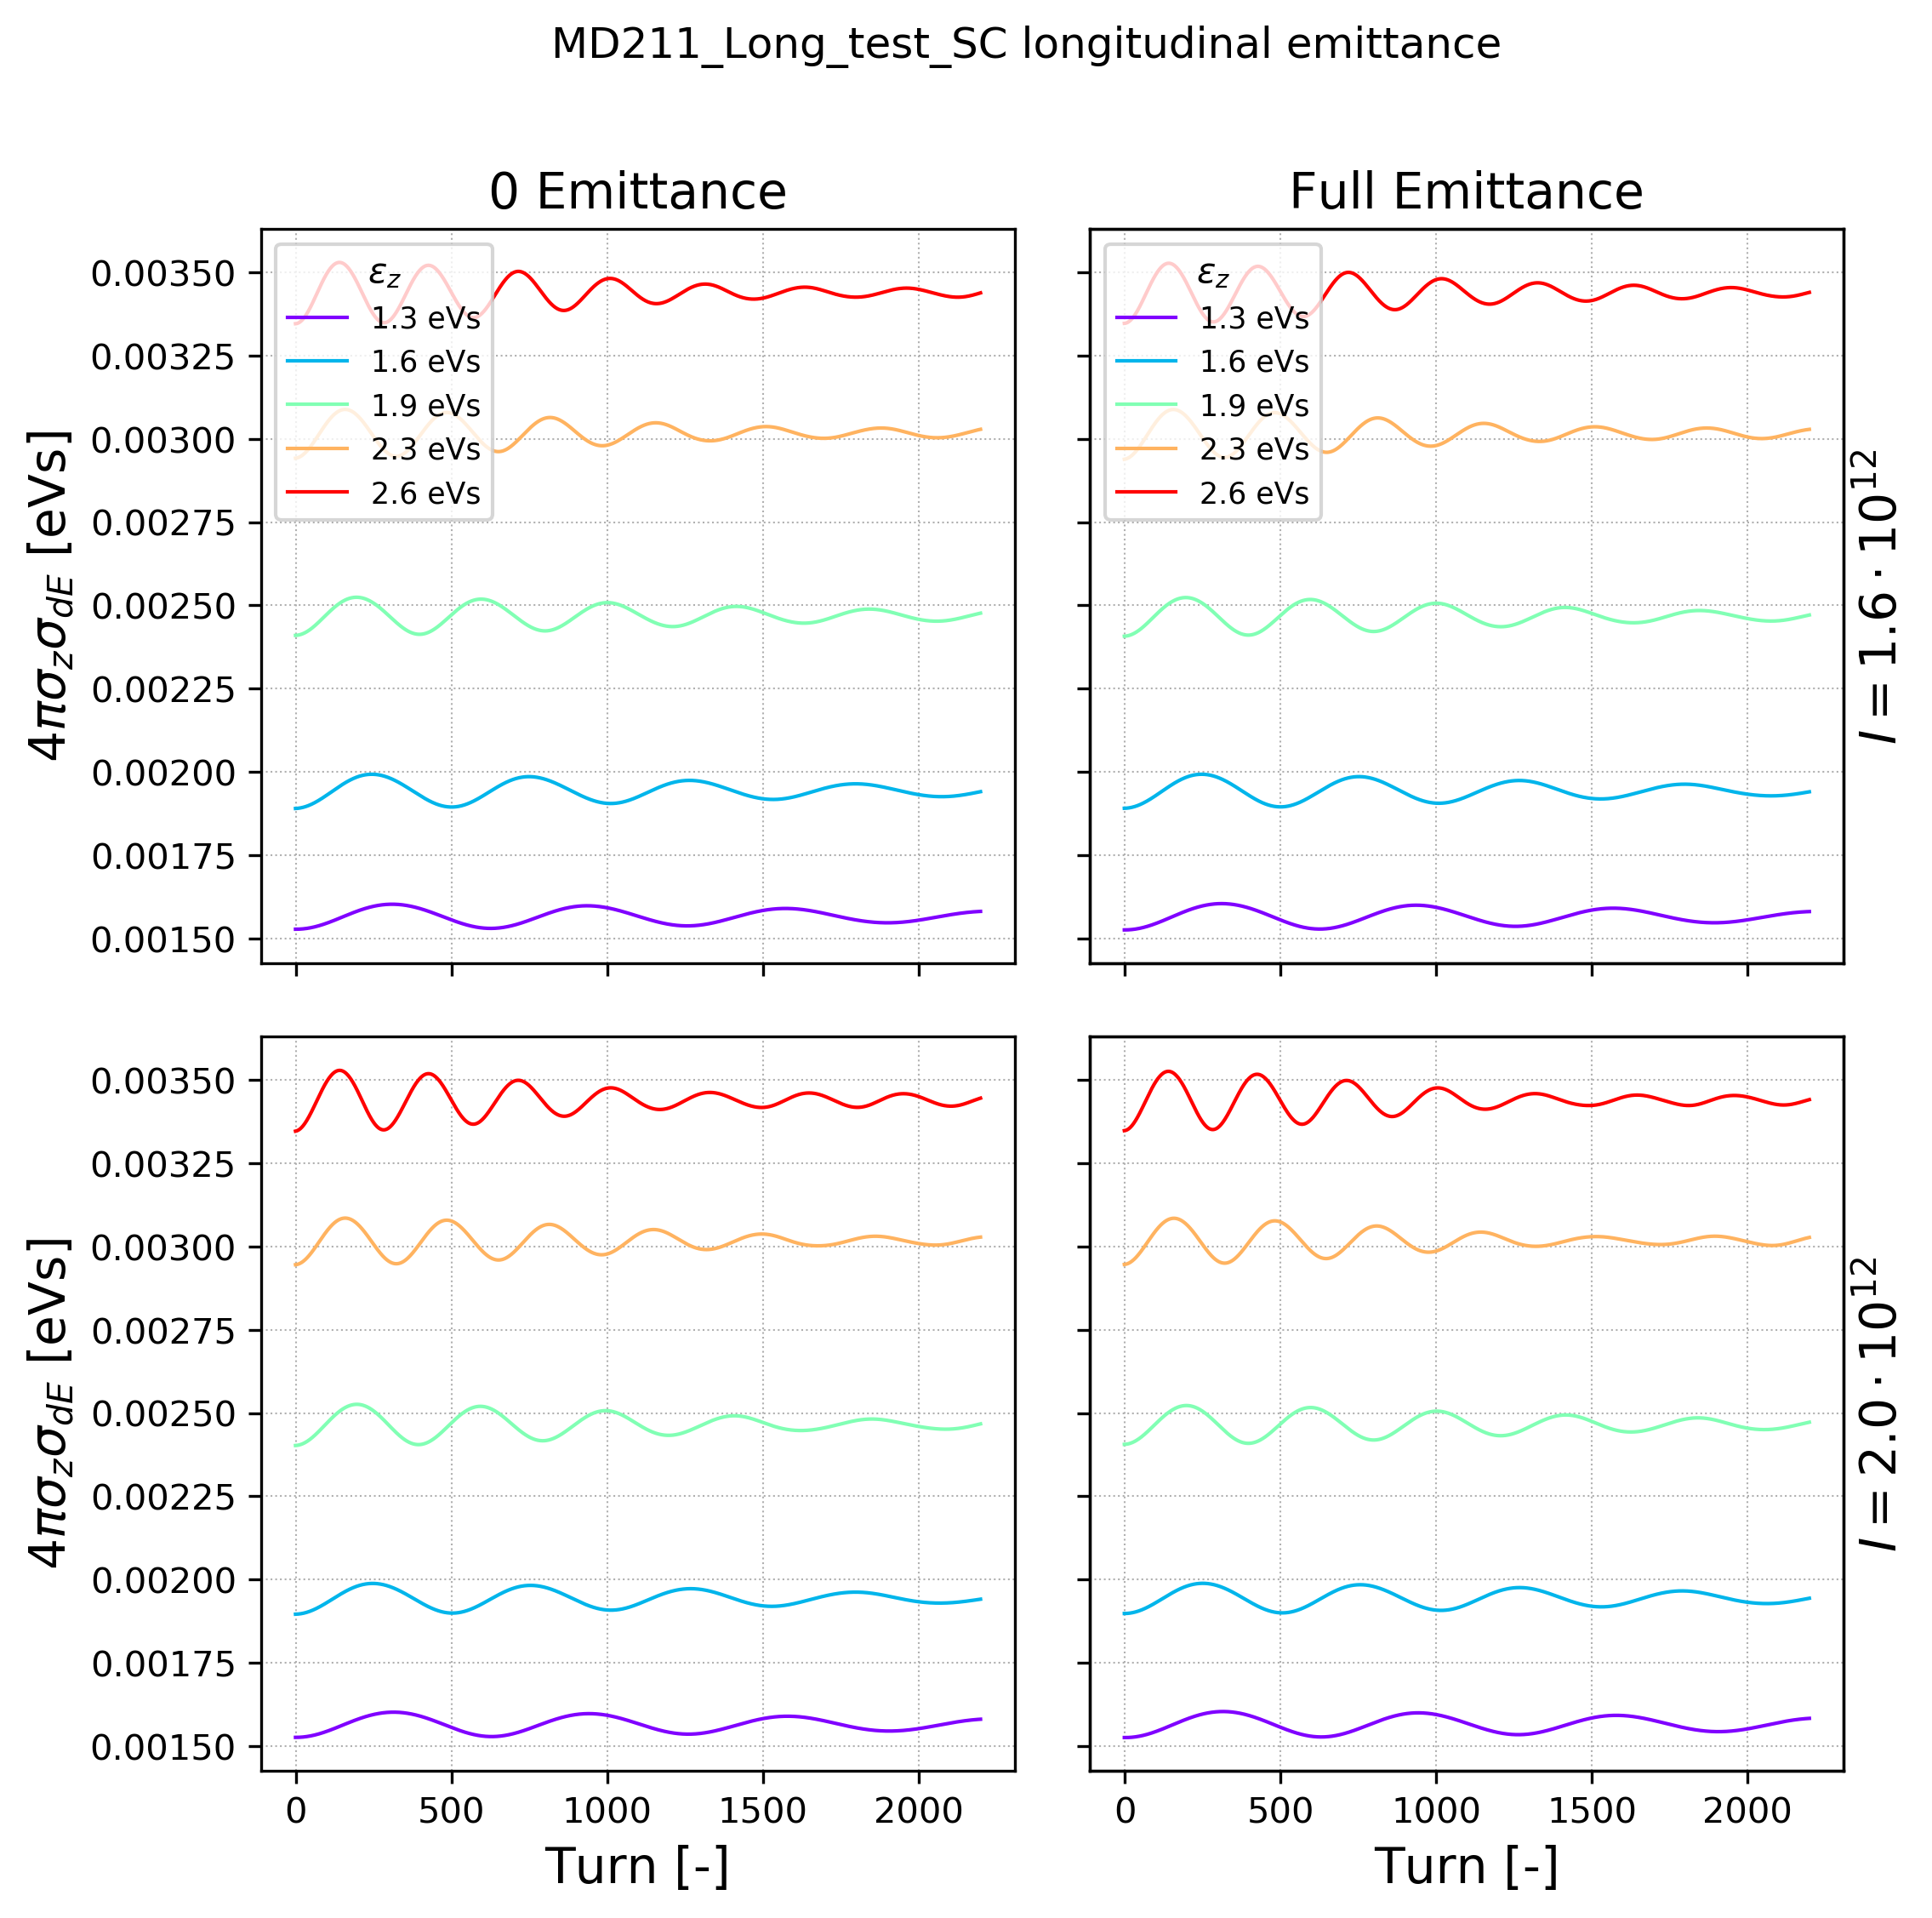

In [36]:
parameter1 = 'sig_z'
multi1 = 1
parameter2 = 'sig_dE'
multi2 = 10

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' longitudinal emittance'
fig.suptitle(tit)

ax1.set_ylabel(r'$4 \pi \sigma_{z} \sigma_{dE}$ [eVs]');
ax3.set_ylabel(r'$4 \pi \sigma_{z} \sigma_{dE}$ [eVs]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_manual_eps_z.png'
plt.savefig(savename, dpi = 800);

0 Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  eps_z  =  0.925  range =  0.00288  =  0.311 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  eps_z  =  1.15  range =  0.0041  =  0.358 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  eps_z  =  1.46  range =  0.00431  =  0.295 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  eps_z  =  1.78  range =  0.00552  =  0.309 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  eps_z  =  2.03  range =  0.00695  =  0.342 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  eps_z  =  0.925  range =  0.0032  =  0.345 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  eps_z  =  1.15  range =  0.00396  =  0.346 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  eps_z  =  1.46  range =  0.00433  =  0.297 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  eps_z  =  1.78  range =  0.00592  =  0.332 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  eps_z  =  

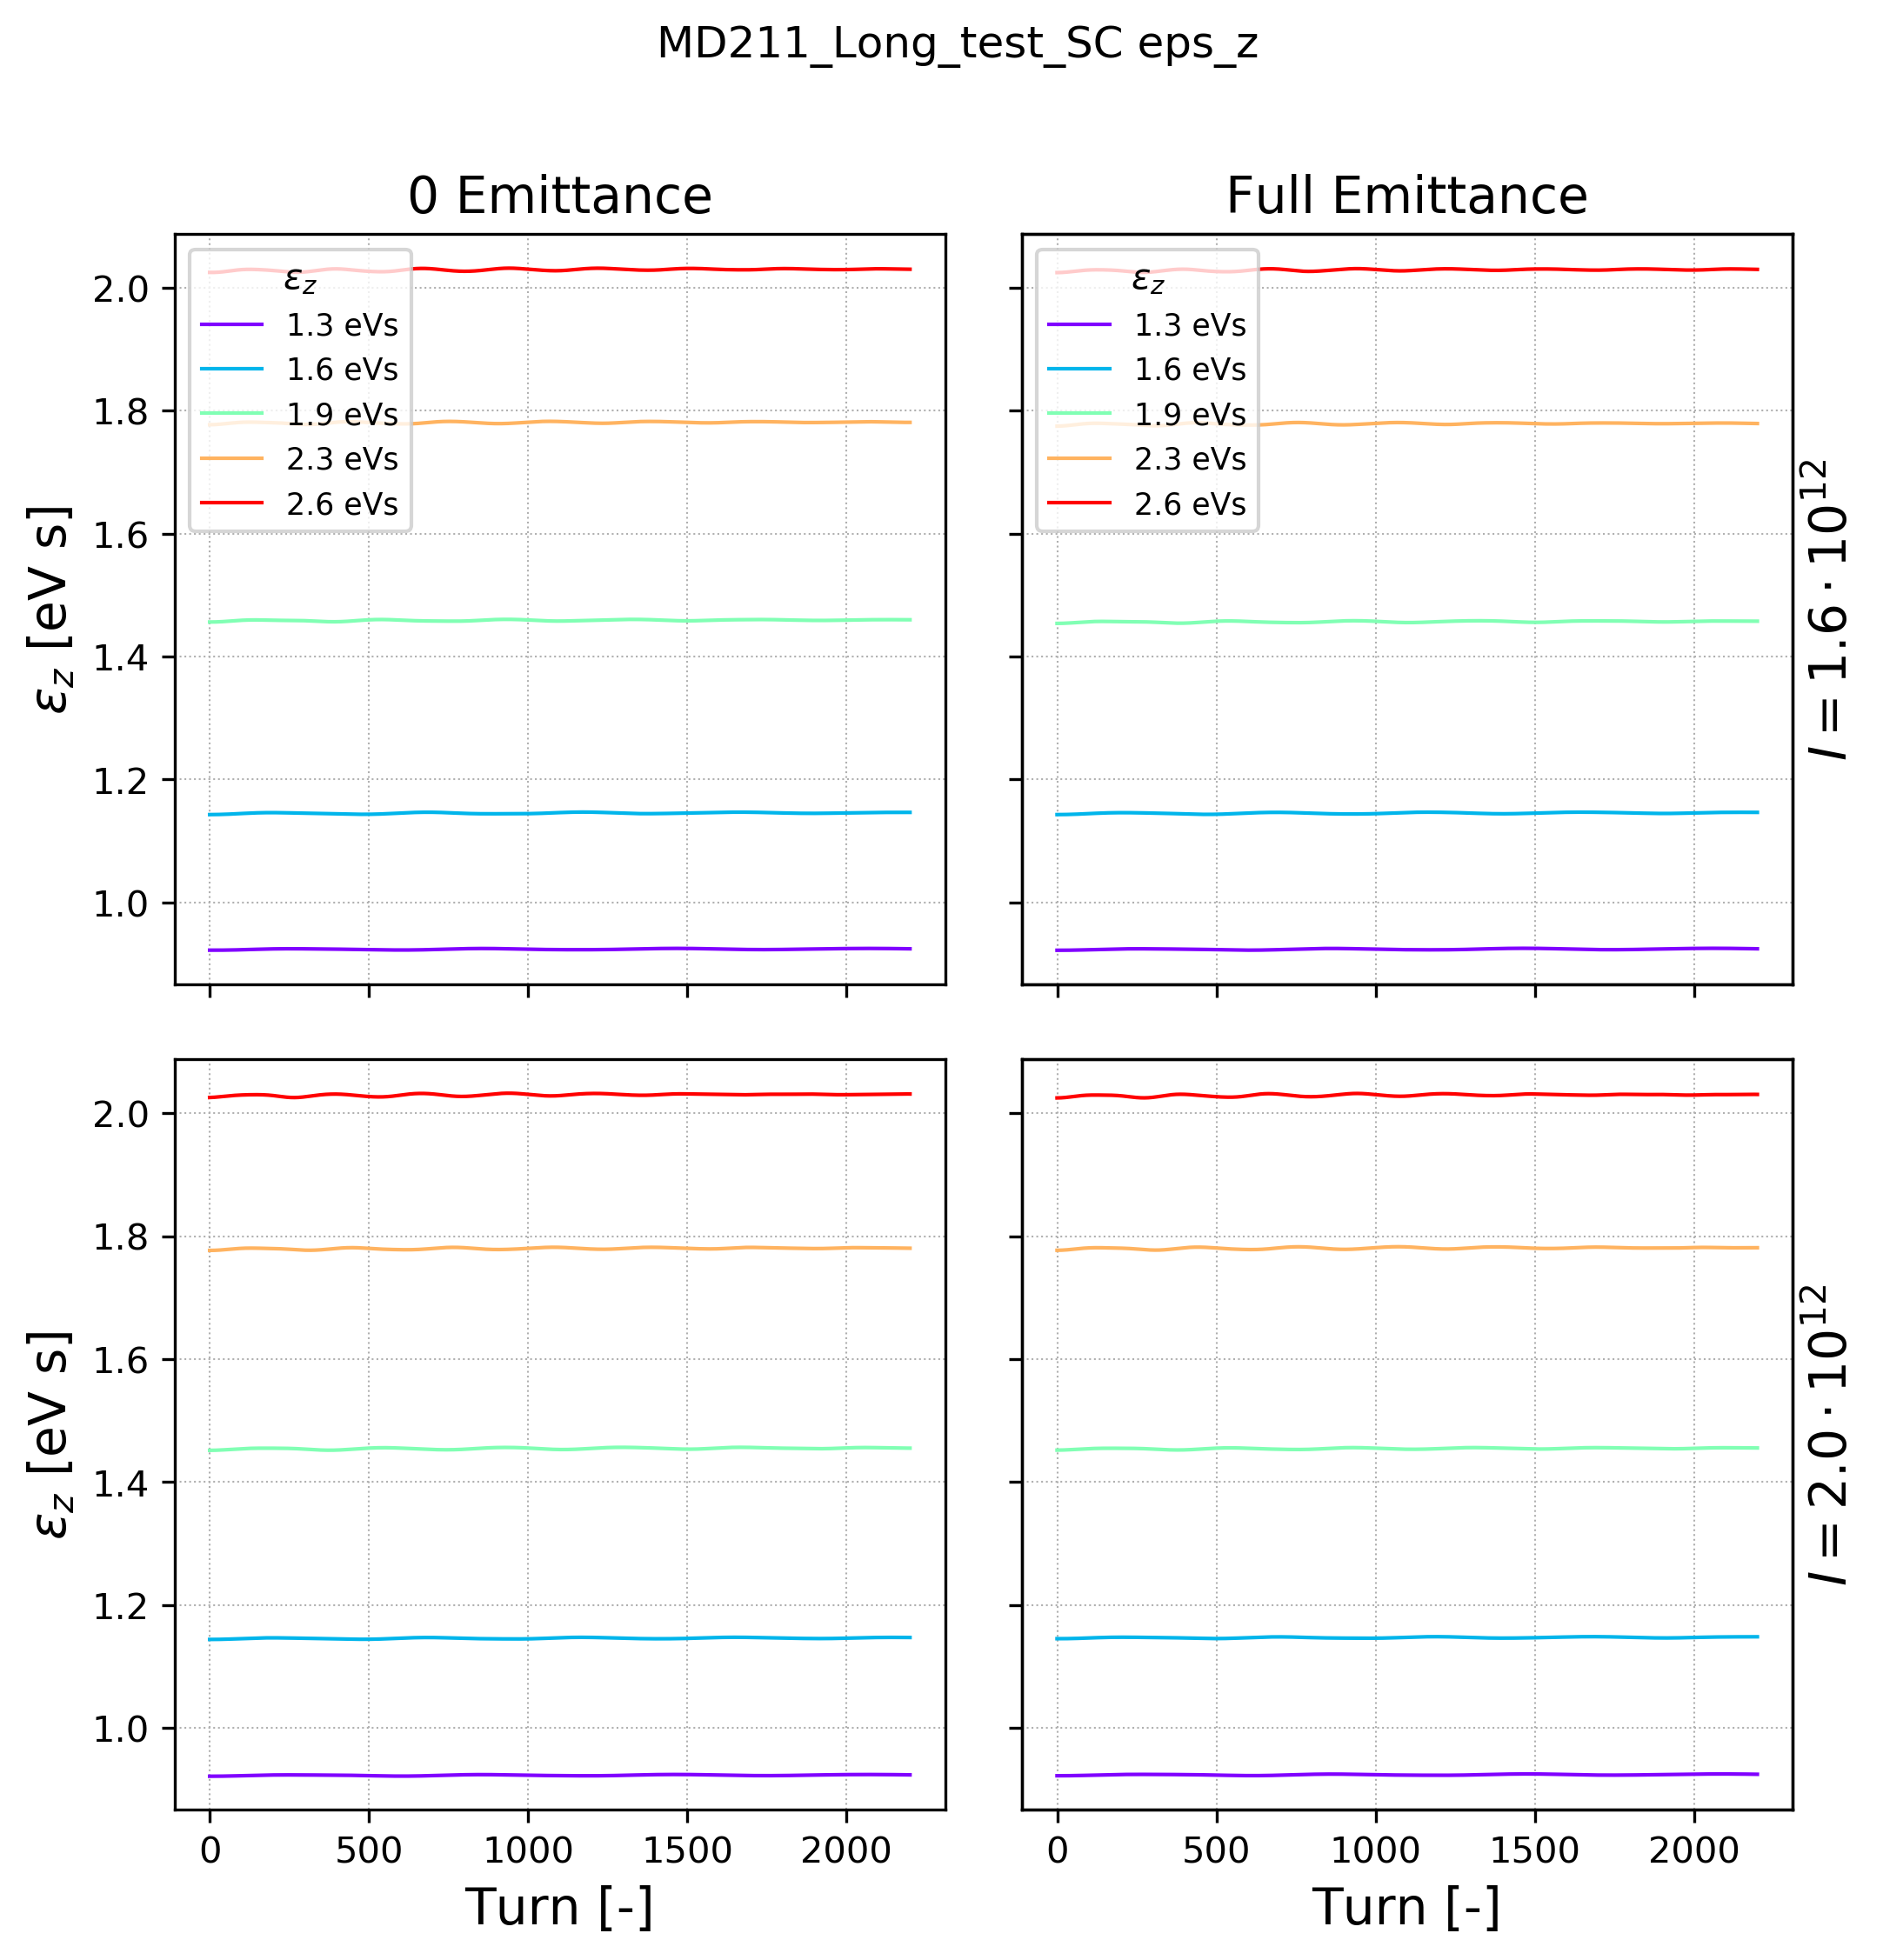

In [37]:
parameter = 'eps_z'
multi1 = 1


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_z$ [eV s]');
ax3.set_ylabel(r'$\epsilon_z$ [eV s]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

0 Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  epsn_x  =  9.18e-06  range =  1.25e-05  =  136.0 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  epsn_x  =  2.31e-05  range =  3.05e-05  =  132.0 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  epsn_x  =  8.4e-05  range =  8.43e-05  =  100.0 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  epsn_x  =  0.000137  range =  0.00019  =  139.0 %
0 Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  epsn_x  =  0.000194  range =  0.00032  =  165.0 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  epsn_x  =  1.87  range =  8.73e-05  =  0.00467 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  epsn_x  =  1.87  range =  0.000118  =  0.00634 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  epsn_x  =  1.87  range =  0.000219  =  0.0117 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  epsn_x  =  1.87  range =  0.000366  =  0.0196 %
Full Emittance   $I = 1.6 \cd

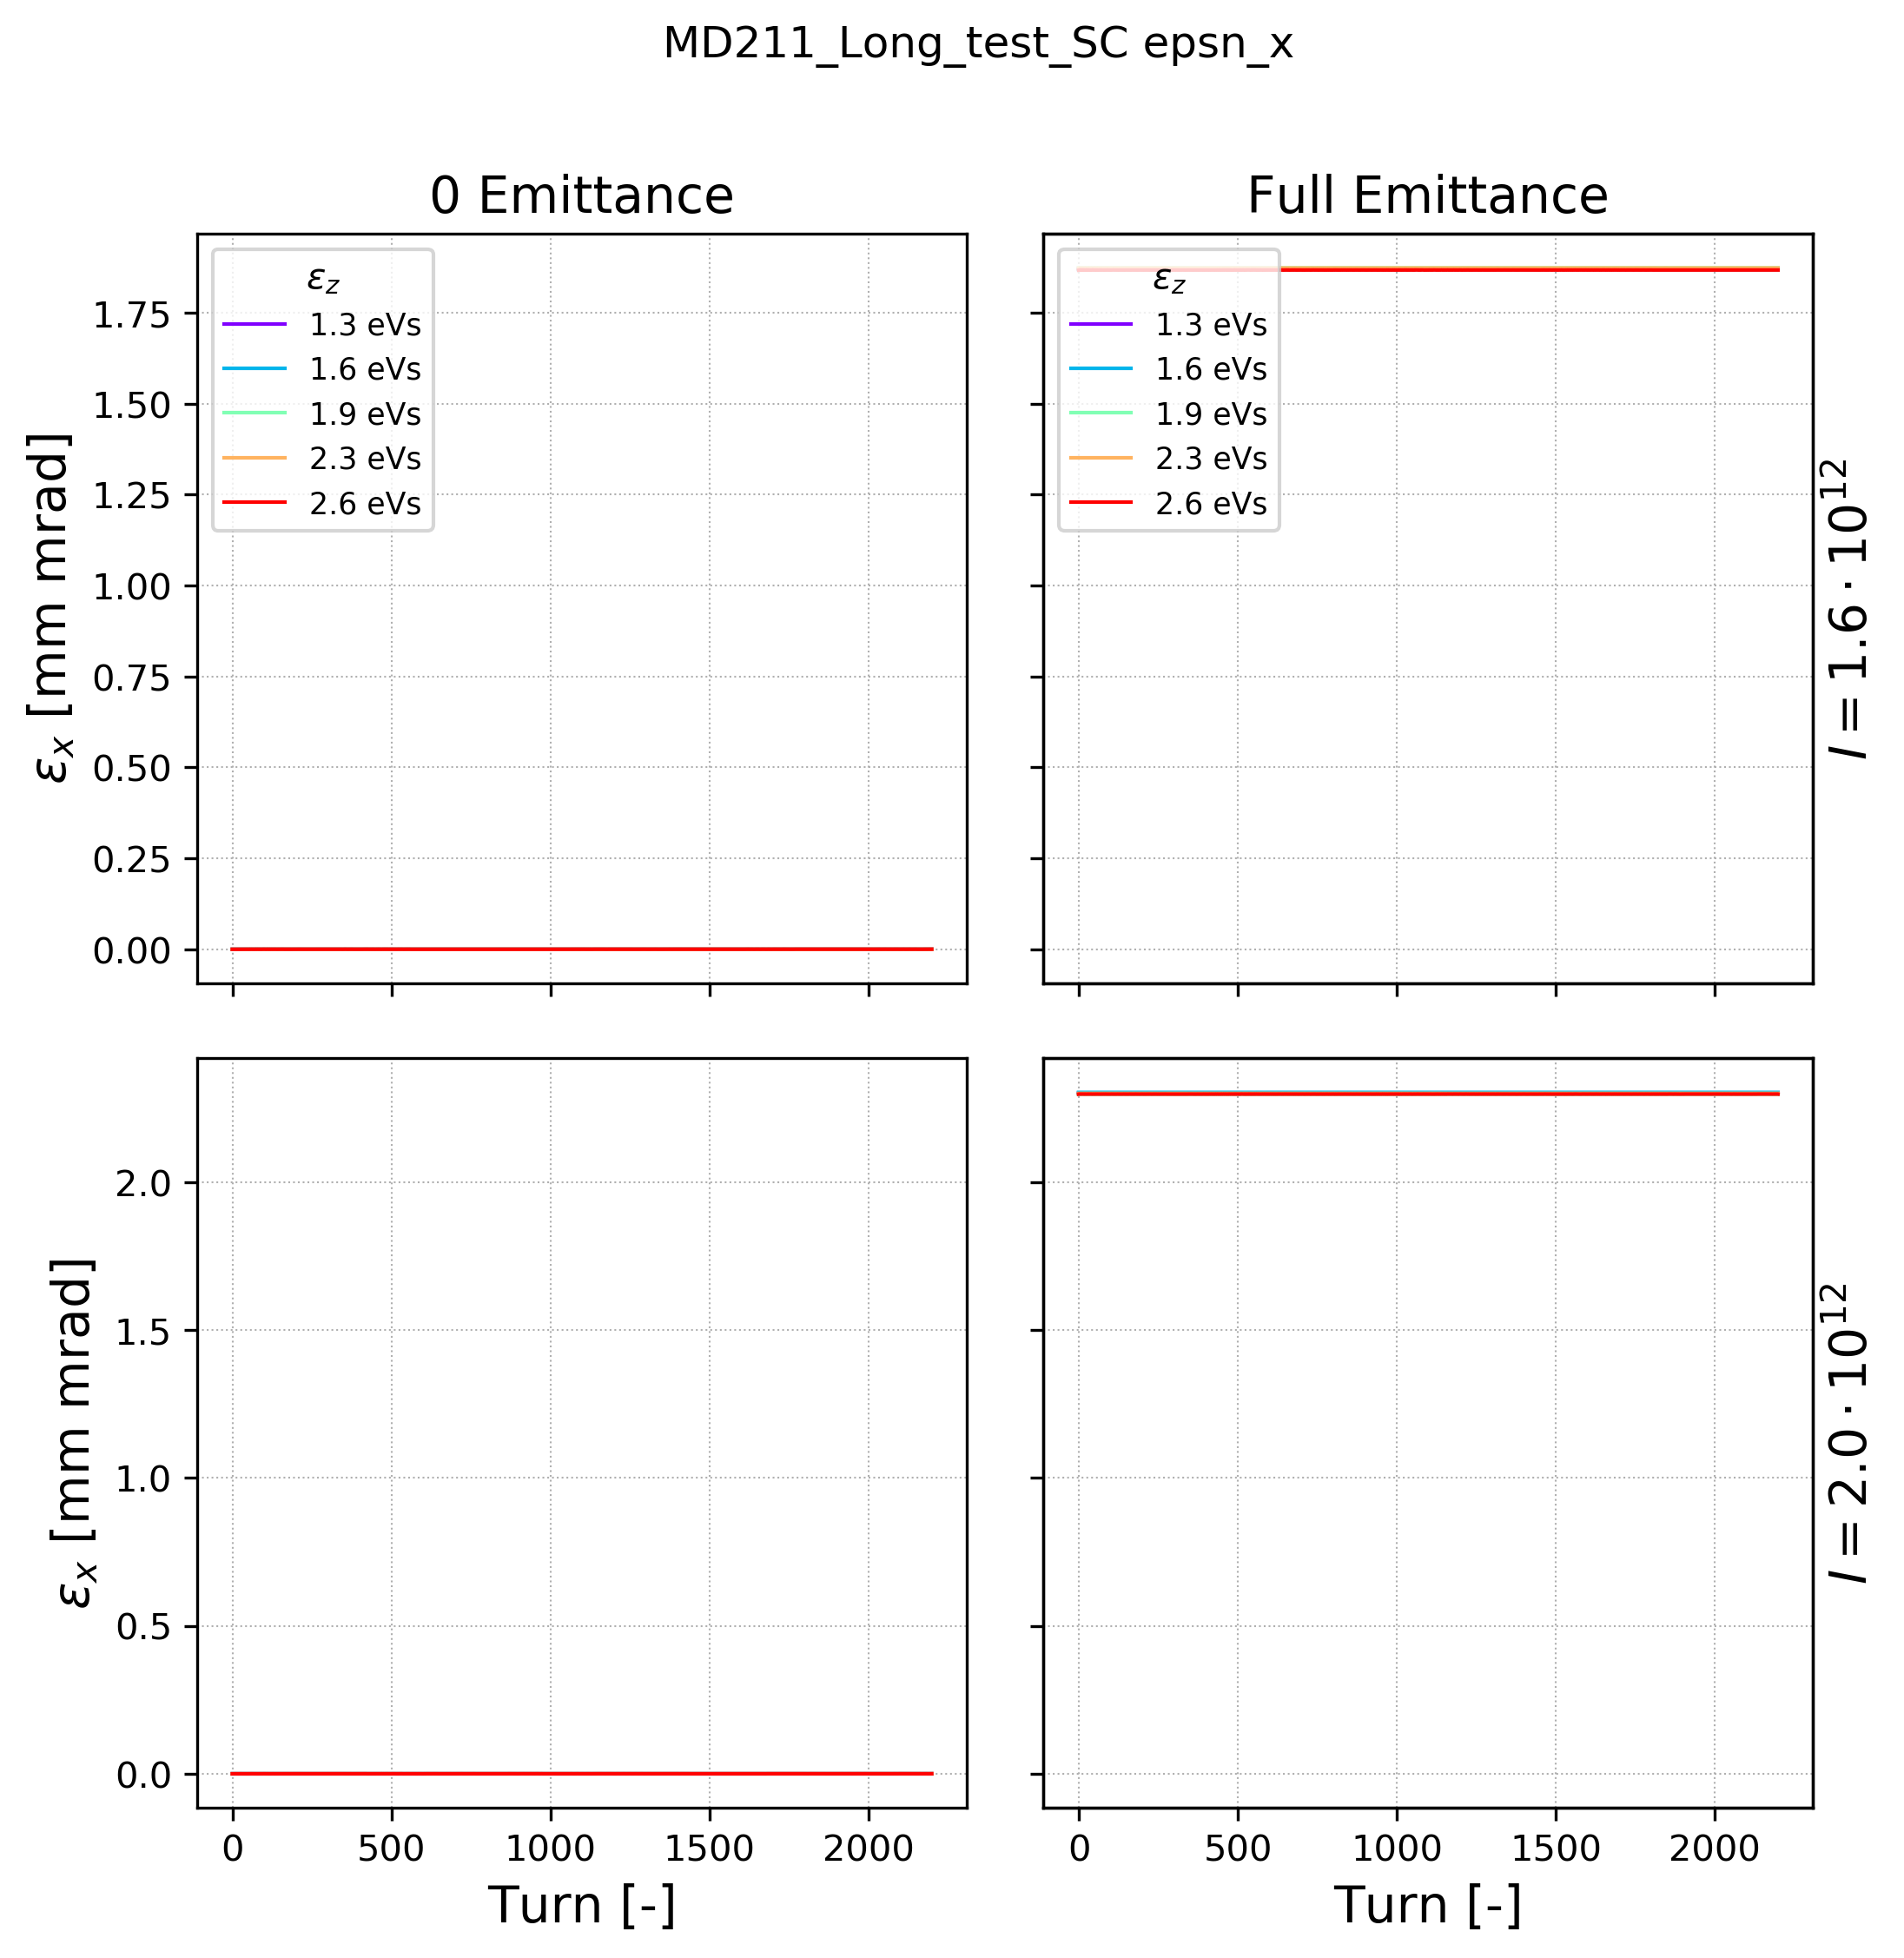

In [38]:
parameter = 'epsn_x'
multi1 = 1E6


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax3.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

#ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

 Full Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  epsn_y  =  1.83  range =  4.62e-05  =  0.00253 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  epsn_y  =  1.83  range =  4.49e-05  =  0.00245 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  epsn_y  =  1.83  range =  4.69e-05  =  0.00256 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  epsn_y  =  1.83  range =  4.48e-05  =  0.00244 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  epsn_y  =  1.83  range =  5.37e-05  =  0.00293 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.3 eVs Average  epsn_y  =  2.4  range =  4.85e-05  =  0.00202 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.6 eVs Average  epsn_y  =  2.4  range =  5.89e-05  =  0.00246 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.9 eVs Average  epsn_y  =  2.4  range =  6.97e-05  =  0.0029 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   2.3 eVs Average  epsn_y  =  2.41  range =  5.92e-05  =  0.00246 %
Full Emittance   $I = 

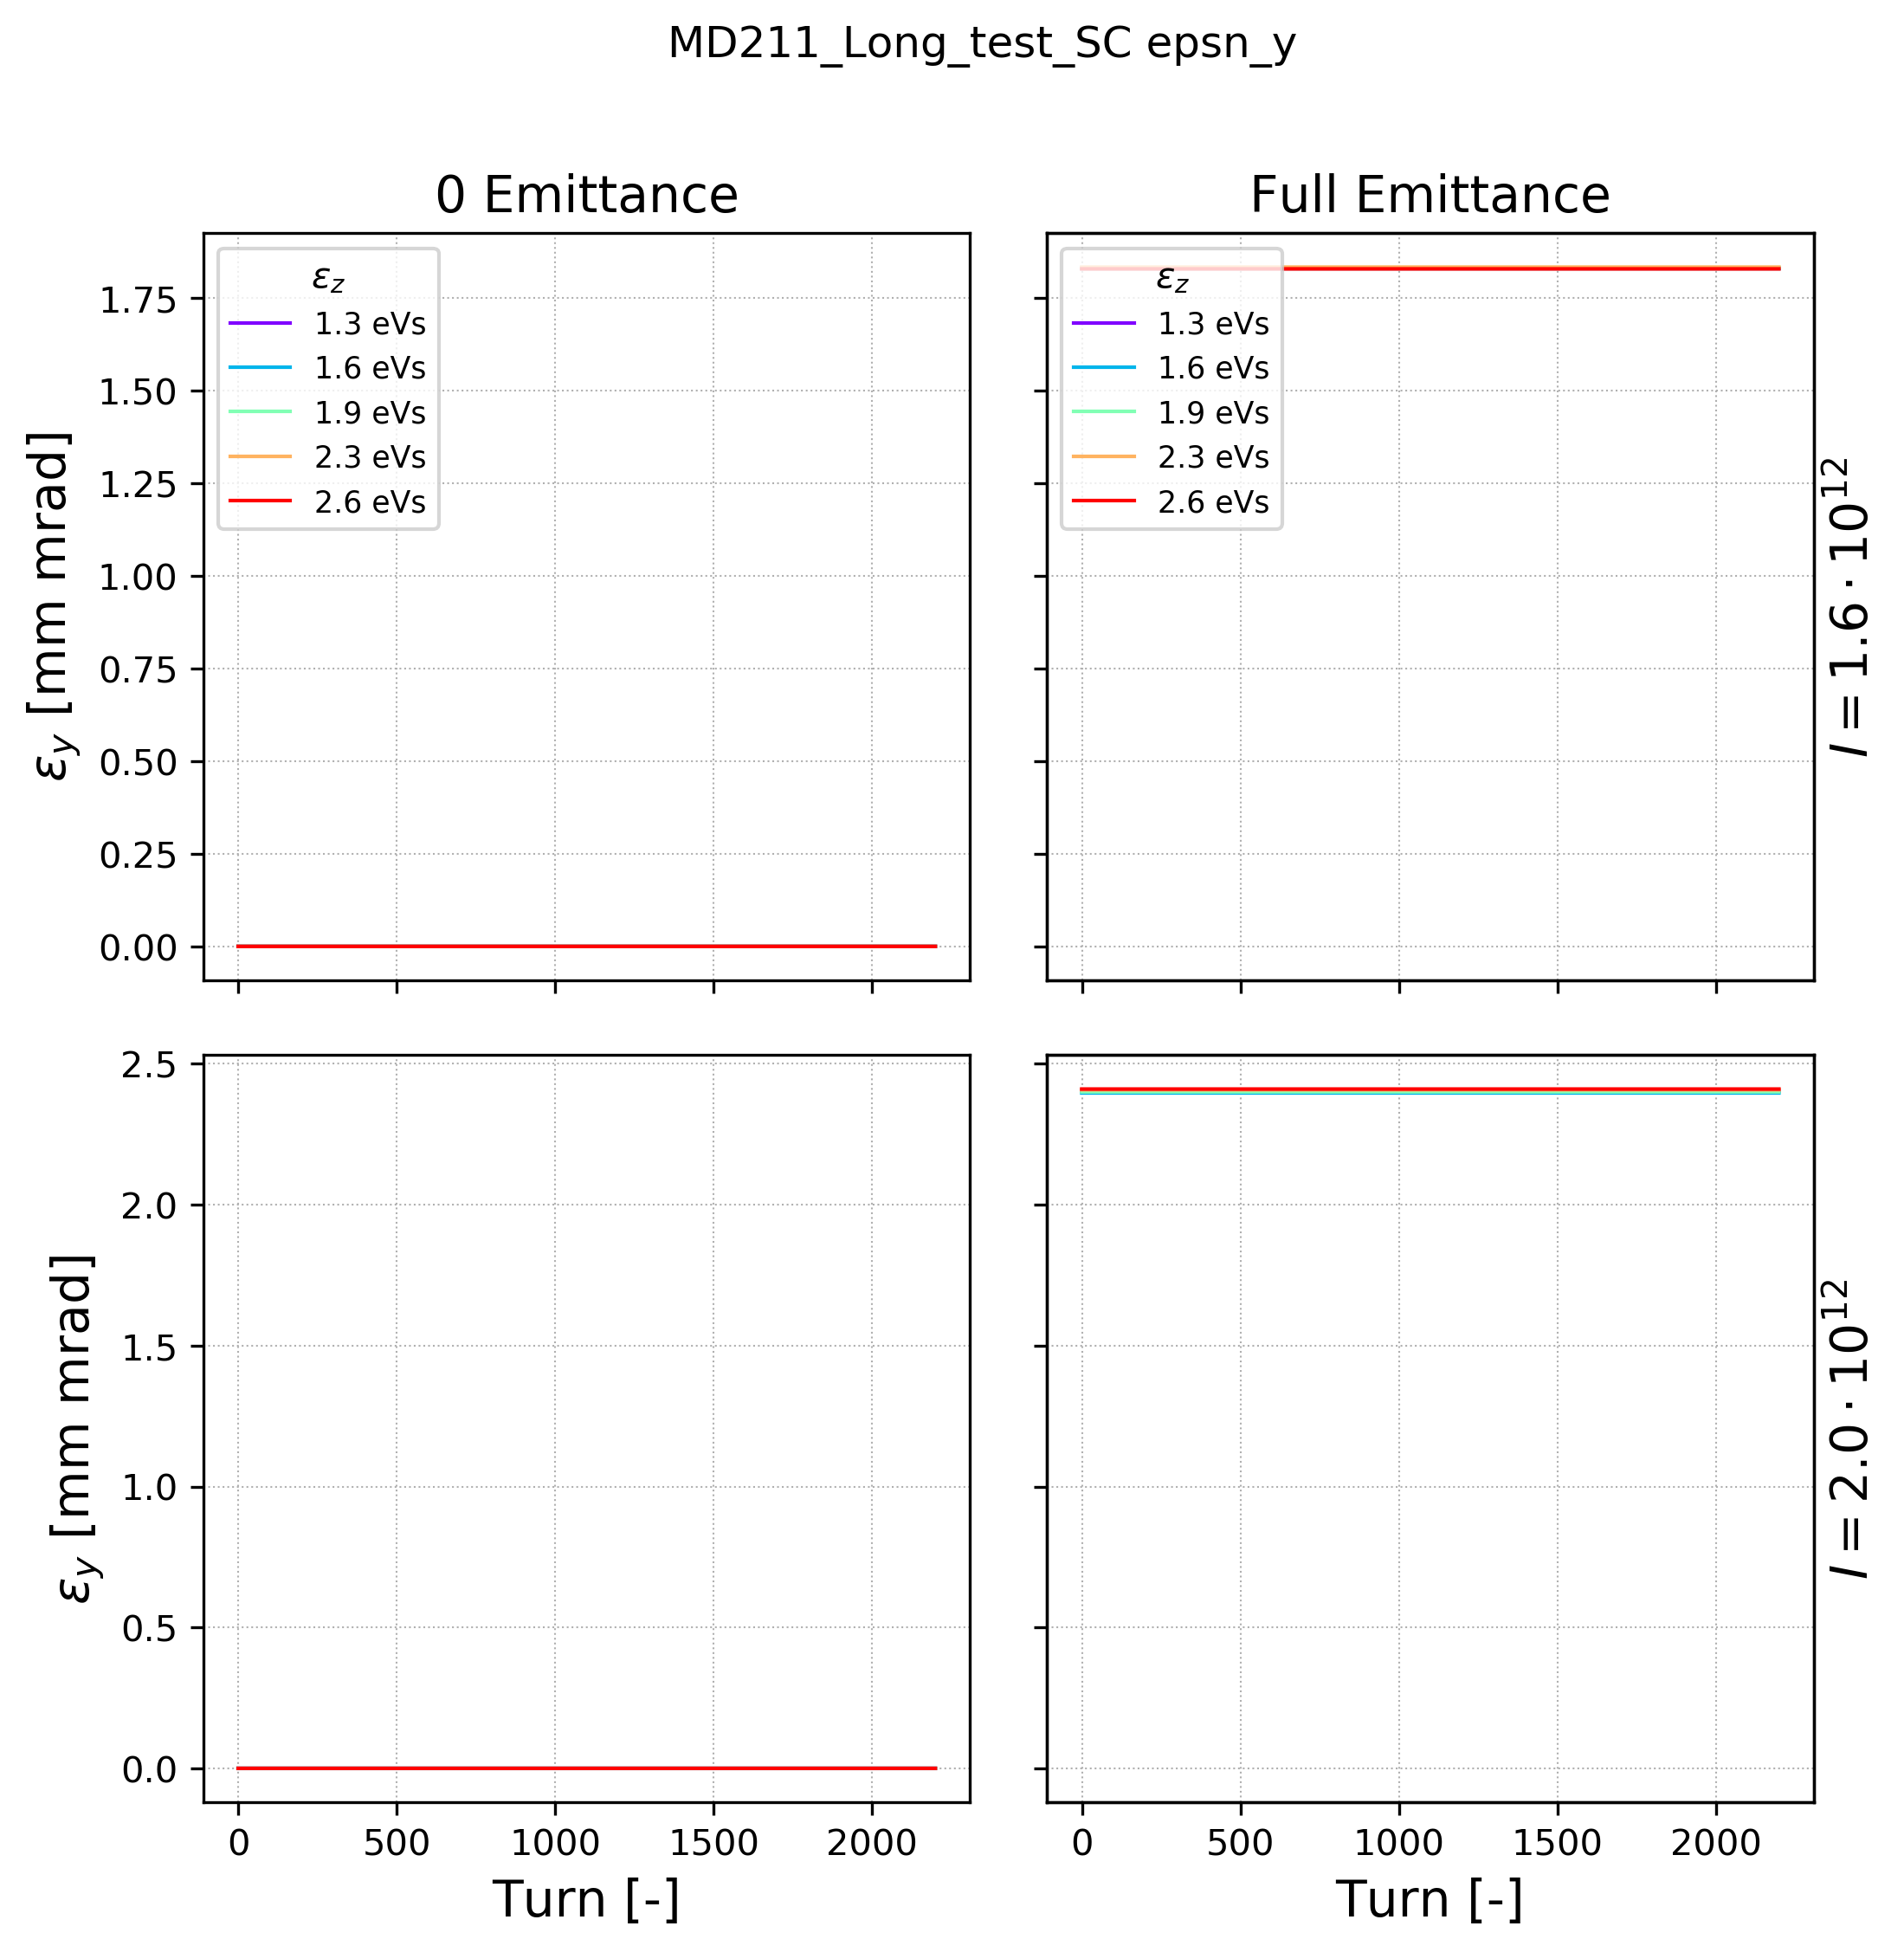

In [40]:
parameter = 'epsn_y'
multi1 = 1E6


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax3.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        #print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        #str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        #print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        #str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

#ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

 Full Emittance   $I = 1.6 \cdot 10^{12}$   1.3 eVs Average  epsn_y  =  1.83  range =  4.62e-05  =  0.00253 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.6 eVs Average  epsn_y  =  1.83  range =  4.49e-05  =  0.00245 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   1.9 eVs Average  epsn_y  =  1.83  range =  4.69e-05  =  0.00256 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.3 eVs Average  epsn_y  =  1.83  range =  4.48e-05  =  0.00244 %
Full Emittance   $I = 1.6 \cdot 10^{12}$   2.6 eVs Average  epsn_y  =  1.83  range =  5.37e-05  =  0.00293 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.3 eVs Average  epsn_y  =  2.4  range =  4.85e-05  =  0.00202 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.6 eVs Average  epsn_y  =  2.4  range =  5.89e-05  =  0.00246 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   1.9 eVs Average  epsn_y  =  2.4  range =  6.97e-05  =  0.0029 %
Full Emittance   $I = 2.0 \cdot 10^{12}$   2.3 eVs Average  epsn_y  =  2.41  range =  5.92e-05  =  0.00246 %
Full Emittance   $I = 

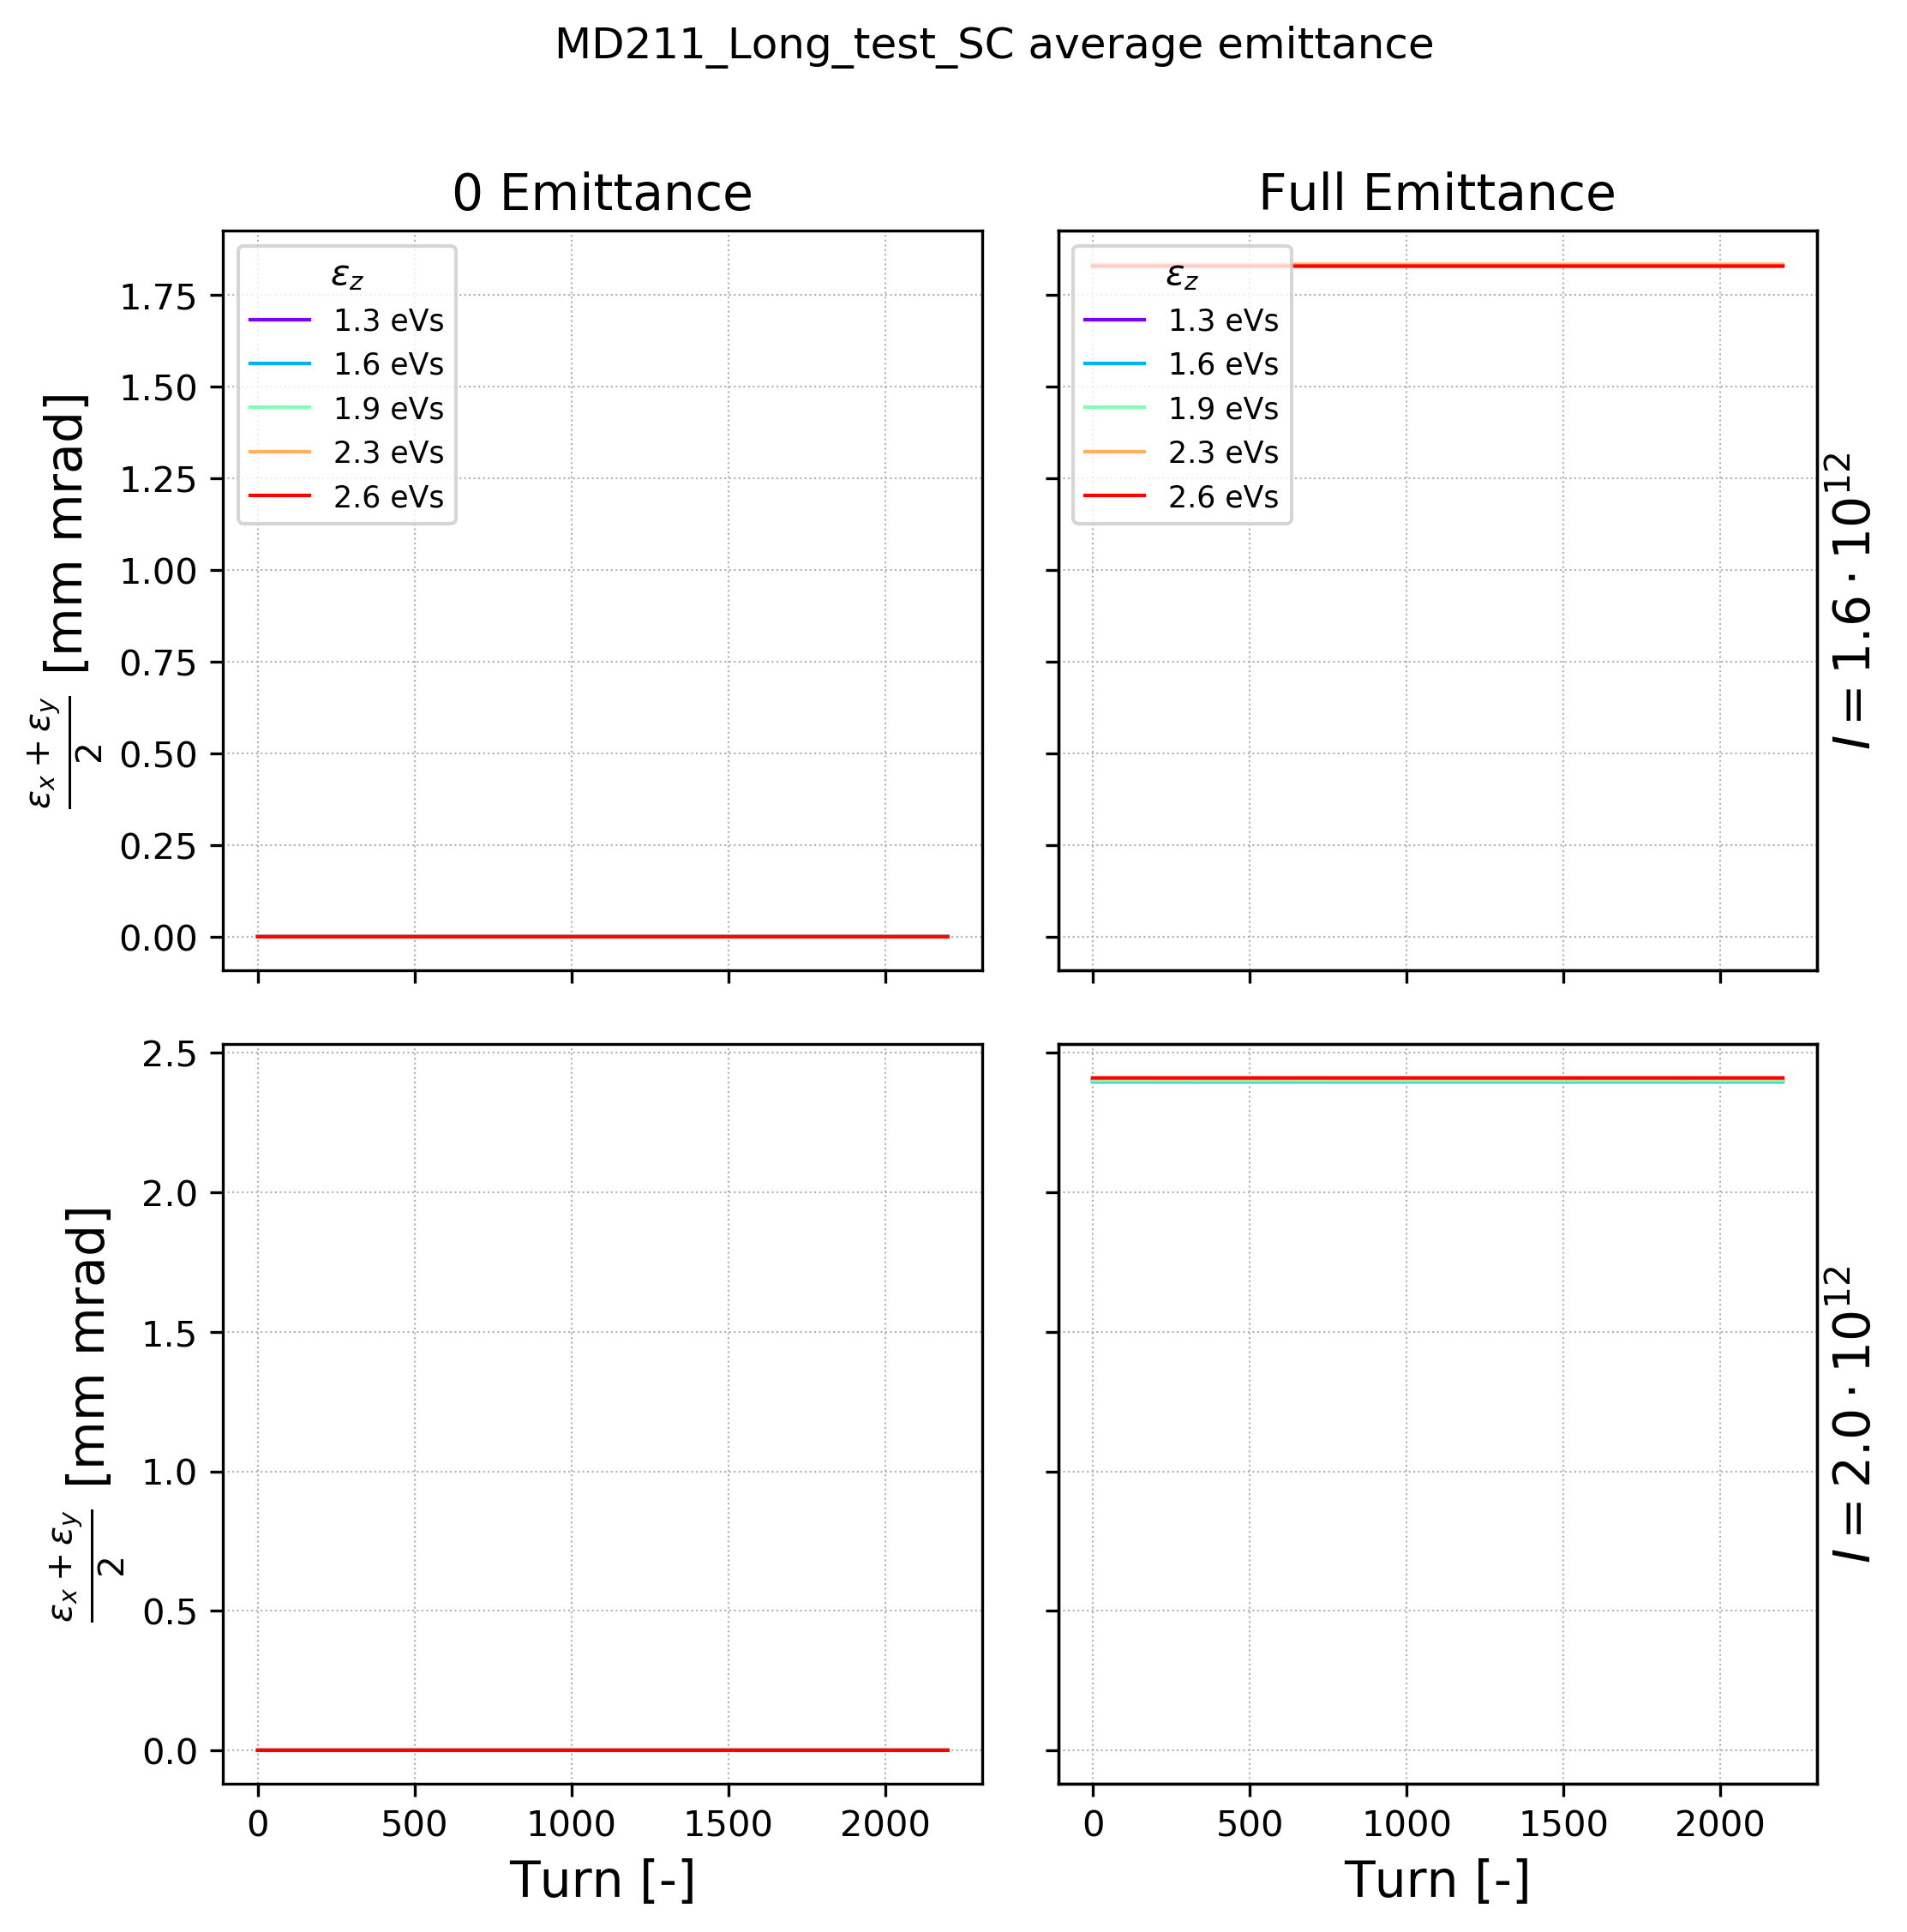

In [42]:
parameter1 = 'epsn_x'
multi1 = 1E6
parameter2 = 'epsn_y'
multi2 = 1E6

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' average emittance'
fig.suptitle(tit)

ax1.set_ylabel(r'$\frac{\epsilon_x + \epsilon_y}{2}$ [mm mrad]');
ax3.set_ylabel(r'$\frac{\epsilon_x + \epsilon_y}{2}$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))

c_it = int(0)
for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd1[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd1[key][parameter][0]*multi1) - np.min(dd1[key][parameter][0]*multi1))
        #print title_2, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        #str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
        c_it = c_it + 1;       

ax1.legend(loc=2, title=legend_label, fontsize='small');
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd2.iteritems()):
        ax2.plot(dd2[key]['turn'][0], dd2[key][parameter][0]*multi1, label=key, color=colors[c_it]);  
        av_ = np.mean(dd2[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd2[key][parameter][0]*multi1) - np.min(dd2[key][parameter][0]*multi1))
        print title_1, ' ', case_label_1, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;        
ax2.grid(lw=0.5, ls=':');
ax2.legend(loc=2, title=legend_label, fontsize='small');
ax2.set_title(title_1)

c_it = int(0)
for key, value in sorted(dd3.iteritems()):
        ax3.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        #print title_2, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        #str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title(title_2)

c_it = int(0)
for key, value in sorted(dd4.iteritems()):
        ax4.plot(dd4[key]['turn'][0], dd4[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        av_ = np.mean(dd4[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd4[key][parameter][0]*multi1) - np.min(dd4[key][parameter][0]*multi1))
        print title_1, ' ', case_label_2, ' ', key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'        
        c_it = c_it + 1;
ax4.grid(lw=0.5, ls=':');

#ax3.set_ylim(ax1.get_ylim())
ax5 = ax2.twinx()
ax5.set_ylabel(case_label_1);
ax6 = ax4.twinx()
ax6.set_ylabel(case_label_2);
ax5.set_yticklabels([]);
ax6.set_yticklabels([]);
ax5.set_yticks([]);
ax6.set_yticks([]);

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_average_emittance.png'
plt.savefig(savename, dpi = 800);